In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Data import

In [16]:
data = pd.read_csv(r'H2.csv')
data['IsRepeatedGuest'] = data['IsRepeatedGuest'].astype(bool)
#data.drop_duplicates(inplace=True)

#### Dataset information and statistical description

Important variables Paper: Adults, Children, StaysInWeekendNights, StaysInWeekNights, Country, Meal, AssignedRoomType

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [295]:
data.describe().T

count         mean         std     min     25%  \
IsCanceled                   79330.0     0.417270    0.493111     0.0     0.0   
LeadTime                     79330.0   109.735724  110.948526     0.0    23.0   
ArrivalDateYear              79330.0  2016.174285    0.699181  2015.0  2016.0   
ArrivalDateWeekNumber        79330.0    27.177449   13.398523     1.0    17.0   
ArrivalDateDayOfMonth        79330.0    15.786625    8.728451     1.0     8.0   
StaysInWeekendNights         79330.0     0.795185    0.885026     0.0     0.0   
StaysInWeekNights            79330.0     2.182957    1.456416     0.0     1.0   
Adults                       79330.0     1.850977    0.509292     0.0     2.0   
Children                     79326.0     0.091370    0.372177     0.0     0.0   
Babies                       79330.0     0.004941    0.084323     0.0     0.0   
IsRepeatedGuest              79330.0     0.025615    0.157983     0.0     0.0   
PreviousCancellations        79330.0     0.079743    0.415472     0.0     0.0   
PreviousBookingsNotCanceled  79330.0     0.132371    1.693411     0.0     0.0   
BookingChanges               79330.0     0.187369    0.608620     0.0     0.0   
DaysInWaitingList            79330.0     3.226774   20.870890     0.0     0.0   
ADR                          79330.0   105.304465   43.602954     0.0    79.2   
RequiredCarParkingSpaces     79330.0     0.024367    0.154919     0.0     0.0   
TotalOfSpecialRequests       79330.0     0.546918    0.780776     0.0     0.0   

                                50%     75%     max  
IsCanceled                      0.0     1.0     1.0  
LeadTime                       74.0   163.0   629.0  
ArrivalDateYear              2016.0  2017.0  2017.0  
ArrivalDateWeekNumber          27.0    38.0    53.0  
ArrivalDateDayOfMonth          16.0    23.0    31.0  
StaysInWeekendNights            1.0     2.0    16.0  
StaysInWeekNights               2.0     3.0    41.0  
Adults                          2.0     2.0     4.0  
Children                        0.0     0.0     3.0  
Babies                          0.0     0.0    10.0  
IsRepeatedGuest                 0.0     0.0     1.0  
PreviousCancellations           0.0     0.0    21.0  
PreviousBookingsNotCanceled     0.0     0.0    72.0  
BookingChanges                  0.0     0.0    21.0  
DaysInWaitingList               0.0     0.0   391.0  
ADR                            99.9   126.0  5400.0  
RequiredCarParkingSpaces        0.0     0.0     3.0  
TotalOfSpecialRequests          0.0     1.0     5.0

#### Duplicated Checking

In [3]:
data.drop(columns=['IsCanceled','ReservationStatus']).loc[data.duplicated(subset=None,)].copy()

LeadTime  ArrivalDateYear ArrivalDateMonth  ArrivalDateWeekNumber  \
9            62             2015             July                     27   
12           43             2015             July                     27   
17           43             2015             July                     27   
18           43             2015             July                     27   
22           43             2015             July                     27   
...         ...              ...              ...                    ...   
79289       186             2017           August                     35   
79292        63             2017           August                     35   
79293        63             2017           August                     35   
79294        63             2017           August                     35   
79313       175             2017           August                     35   

       ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  \
9                          2                     2                  3       2   
12                         3                     0                  2       2   
17                         3                     0                  2       2   
18                         3                     0                  2       2   
22                         3                     0                  2       2   
...                      ...                   ...                ...     ...   
79289                     31                     0                  3       2   
79292                     31                     0                  3       3   
79293                     31                     0                  3       3   
79294                     31                     0                  3       3   
79313                     31                     1                  3       1   

       Children  Babies  ... BookingChanges      DepositType        Agent  \
9           0.0       0  ...              0  No Deposit                 8   
12          0.0       0  ...              0  No Deposit                 1   
17          0.0       0  ...              0  No Deposit                 1   
18          0.0       0  ...              0  No Deposit                 1   
22          0.0       0  ...              0  No Deposit                 1   
...         ...     ...  ...            ...              ...          ...   
79289       0.0       0  ...              0  No Deposit                 9   
79292       0.0       0  ...              0  No Deposit                 9   
79293       0.0       0  ...              0  No Deposit                 9   
79294       0.0       0  ...              0  No Deposit                 9   
79313       0.0       0  ...              0  No Deposit                42   

           Company  DaysInWaitingList     CustomerType     ADR  \
9             NULL                  0        Transient   76.50   
12            NULL                  0  Transient-Party   86.00   
17            NULL                  0  Transient-Party   86.00   
18            NULL                  0  Transient-Party   86.00   
22            NULL                  0  Transient-Party   86.00   
...            ...                ...              ...     ...   
79289         NULL                  0        Transient  126.00   
79292         NULL                  0  Transient-Party  195.33   
79293         NULL                  0  Transient-Party  195.33   
79294         NULL                  0  Transient-Party  195.33   
79313         NULL                  0        Transient   82.35   

      RequiredCarParkingSpaces TotalOfSpecialRequests  ReservationStatusDate  
9                            0                      1             2015-07-02  
12                           0                      0             2015-07-05  
17                           0                      0             2015-07-05  
18                           0                      0             2015-07-05  
22      

In [296]:
duplicated = data.loc[data.duplicated(subset=None,)].copy()

for i in duplicated.columns:
    print(f'Columns {i}')
    print(duplicated.drop_duplicates()[i].value_counts())
    print('-'*125)

Columns IsCanceled
0    3432
1    2414
Name: IsCanceled, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
Columns LeadTime
0      124
1       87
6       65
2       60
4       59
      ... 
490      1
493      1
331      1
507      1
293      1
Name: LeadTime, Length: 442, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
Columns ArrivalDateYear
2016    2679
2017    1929
2015    1238
Name: ArrivalDateYear, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
Columns ArrivalDateMonth
October      671
May          650
September    621
August       611
April        571
July         563
June         553
March        402
November     344
December     334
February     271
January      255
Name: ArrivalDateMonth, dtype: int64
-------

In [297]:
duplicated['ReservationStatusDate'] = pd.to_datetime(duplicated['ReservationStatusDate'])
duplicated['WeekDay'] = duplicated['ReservationStatusDate'].dt.dayofweek
duplicated.drop_duplicates()['WeekDay'].value_counts()

2    926
4    916
0    886
3    878
6    836
1    815
5    589
Name: WeekDay, dtype: int64

#### Eliminate duplicate rows (keeping the 1st)

In [6]:
data = data.loc[~data.duplicated(keep='first')].copy()

### Data Exploration

In [9]:
3392/(3392+6194+6730+1817)

0.187062262173937

In [7]:
data.groupby('ArrivalDateYear')['IsCanceled'].mean()

ArrivalDateYear
2015    0.216947
2016    0.291080
2017    0.339927
Name: IsCanceled, dtype: float64

#### Target Distribution per year

<AxesSubplot:xlabel='ArrivalDateYear'>

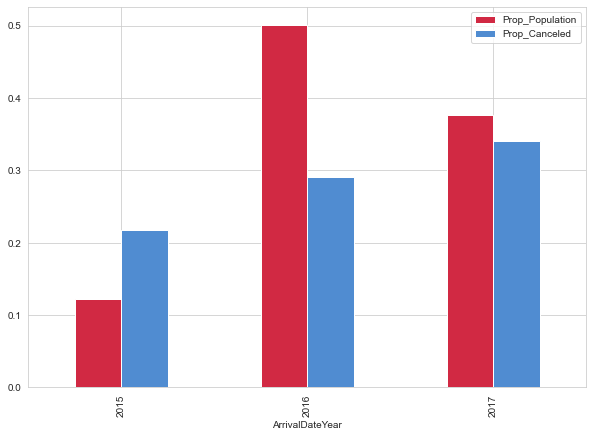

In [112]:
year_dist = pd.DataFrame(index = data.groupby('ArrivalDateYear')['IsCanceled'].count().index)
year_dist['Prop_Population'] = (data.groupby('ArrivalDateYear')['IsCanceled'].count())/np.sum(data.groupby('ArrivalDateYear')['IsCanceled'].count())
year_dist['Prop_Canceled'] = data.groupby('ArrivalDateYear')['IsCanceled'].mean()
year_dist.plot.bar(figsize=(10,7),color =['#d12943ff','#508cd1ff'])

In [22]:
year_dist

Total_Arrived
ArrivalDateMonth               
April                  0.310402
August                 0.323153
December               0.381143
February               0.226370
January                0.207767
July                   0.272618
June                   0.267834
March                  0.273226
May                    0.274434
November               0.283916
October                0.316346
September              0.293224

<AxesSubplot:xlabel='ArrivalDateYear'>

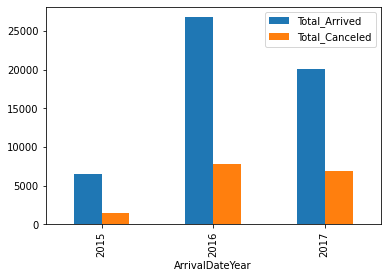

In [18]:
year_dist = pd.DataFrame(index = data.loc[data['IsCanceled']==0].groupby('ArrivalDateYear')['IsCanceled'].count().index)
year_dist['Total_Arrived'] = data.groupby('ArrivalDateYear')['IsCanceled'].count()
year_dist['Total_Canceled'] = data.loc[data['IsCanceled']==1].groupby('ArrivalDateYear')['IsCanceled'].count()

year_dist.plot.bar()

Text(0.5, 1.0, 'Hotel Demand distribution over 2016')

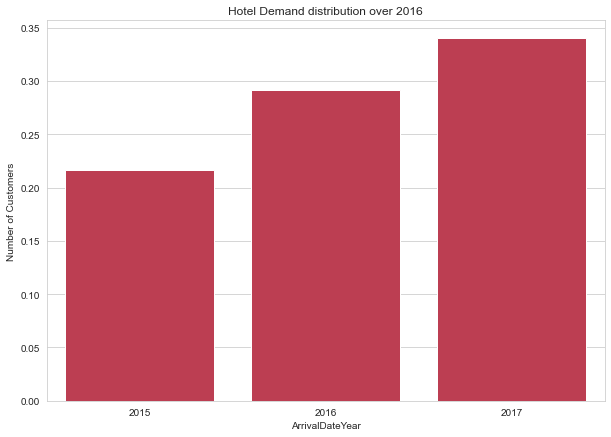

In [108]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(x = year_dist.index,y =year_dist['Prop_Canceled'] ,palette=['#d12943ff'] )
plt.ylabel('Number of Customers')
plt.title('Hotel Demand distribution over 2016')

In [300]:
data.groupby(['ArrivalDateYear','ArrivalDateMonth'])['IsCanceled'].mean()

ArrivalDateYear  ArrivalDateMonth
2015             August              0.206865
                 December            0.215686
                 July                0.587342
                 November            0.171895
                 October             0.185375
                 September           0.187799
2016             April               0.310402
                 August              0.323153
                 December            0.381143
                 February            0.226370
                 January             0.207767
                 July                0.272618
                 June                0.267834
                 March               0.273226
                 May                 0.274434
                 November            0.283916
                 October             0.316346
                 September           0.293224
2017             April               0.375328
                 August              0.363943
                 February            0.308128


In [301]:
data.groupby(['ArrivalDateYear','ArrivalDateMonth'])['IsCanceled'].count()

ArrivalDateYear  ArrivalDateMonth
2015             August              1107
                 December            1020
                 July                 395
                 November             797
                 October             1559
                 September           1672
2016             April               2413
                 August              2816
                 December            1994
                 February            1661
                 January             1030
                 July                2487
                 June                2285
                 March               2368
                 May                 2343
                 November            2145
                 October             2649
                 September           2568
2017             April               2667
                 August              2668
                 February            1944
                 January             1700
                 July                2862


<AxesSubplot:xlabel='ArrivalDateYear'>

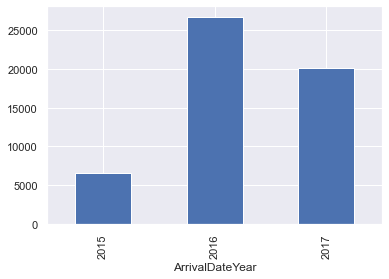

In [302]:
data.groupby('ArrivalDateYear')['IsCanceled'].count().plot.bar()

<AxesSubplot:xlabel='ArrivalDateYear'>

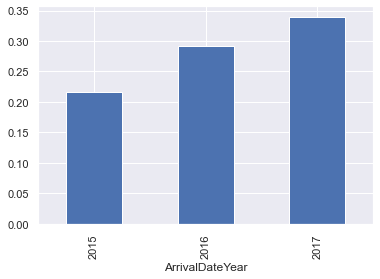

In [303]:
data.groupby('ArrivalDateYear')['IsCanceled'].mean().plot.bar()

#### Revenue and Client Distribution

#### Average ADR per month

- __In 2015 :__

<AxesSubplot:xlabel='ArrivalDateMonth'>

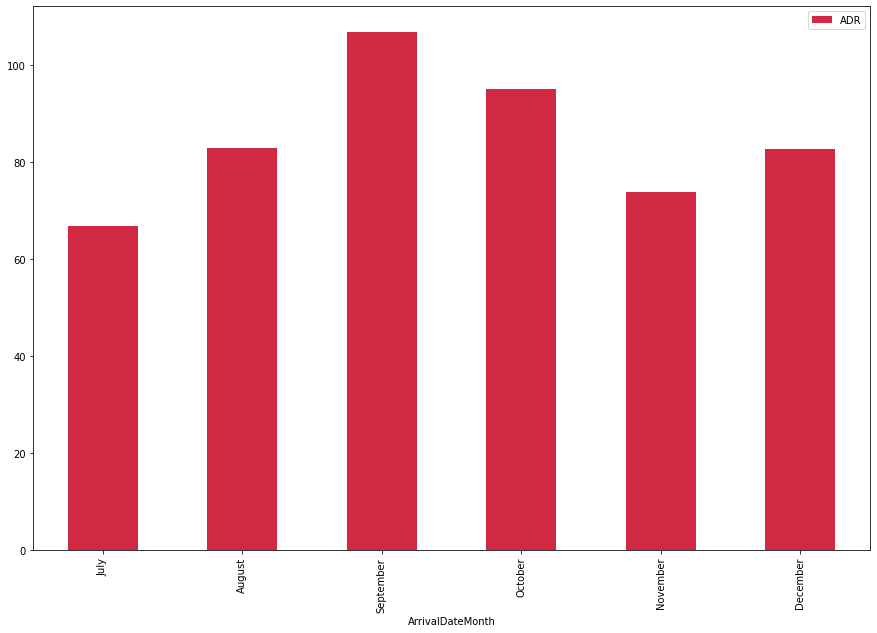

In [20]:
# !pip install sort-dataframeby-monthorweek

# !pip install sorted-months-weekdays

import sort_dataframeby_monthorweek as sd

month_val = data.loc[data['ArrivalDateYear']==2015].groupby('ArrivalDateMonth').mean()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')
month_val.set_index('ArrivalDateMonth').plot.bar(figsize=(15,10),color ='#d12943ff')

<AxesSubplot:xlabel='ArrivalDateMonth', ylabel='ADR'>

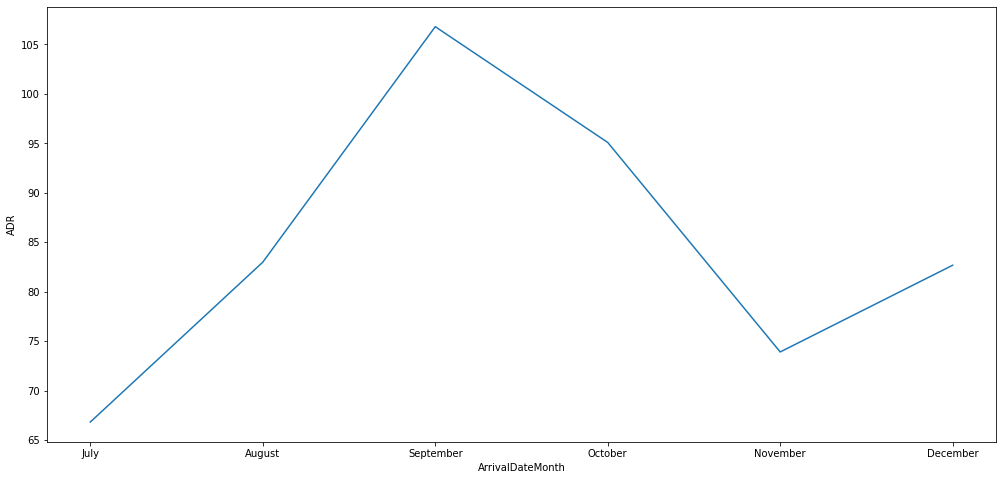

In [153]:
plt.figure(figsize = (17,8))
sns.lineplot(x = month_val['ArrivalDateMonth'], y=month_val['ADR'])

- __In 2016 :__

Text(0.5, 1.0, 'Average ADR per month in 2016')

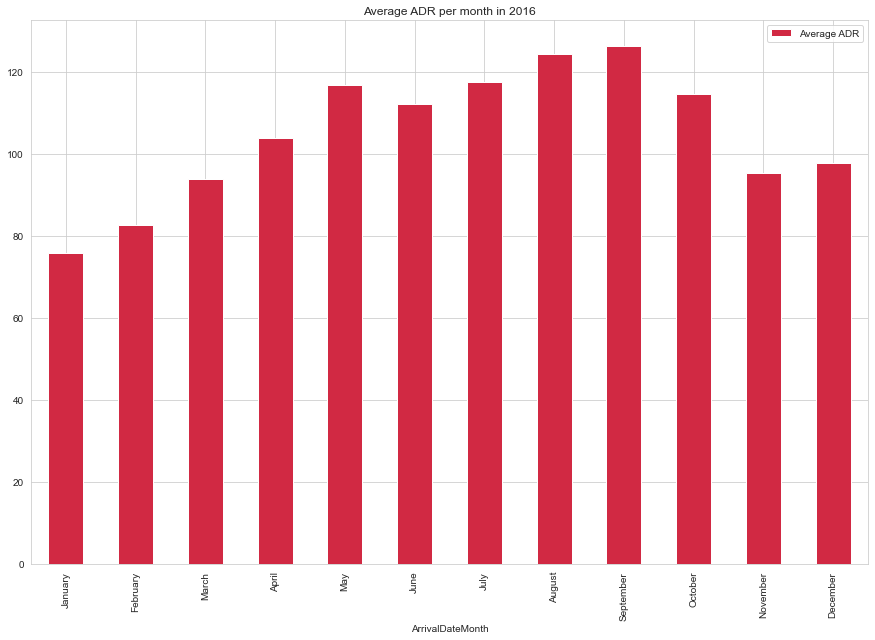

In [95]:
month_val = data.loc[data['ArrivalDateYear']==2016].groupby('ArrivalDateMonth').mean()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')

month_val.set_index('ArrivalDateMonth').plot.bar(figsize=(15,10),color ='#d12943ff')
plt.legend('Average ADR')
plt.title('Average ADR per month in 2016')

- __In 2017 :__

Text(0.5, 1.0, 'Average ADR per month in 2017')

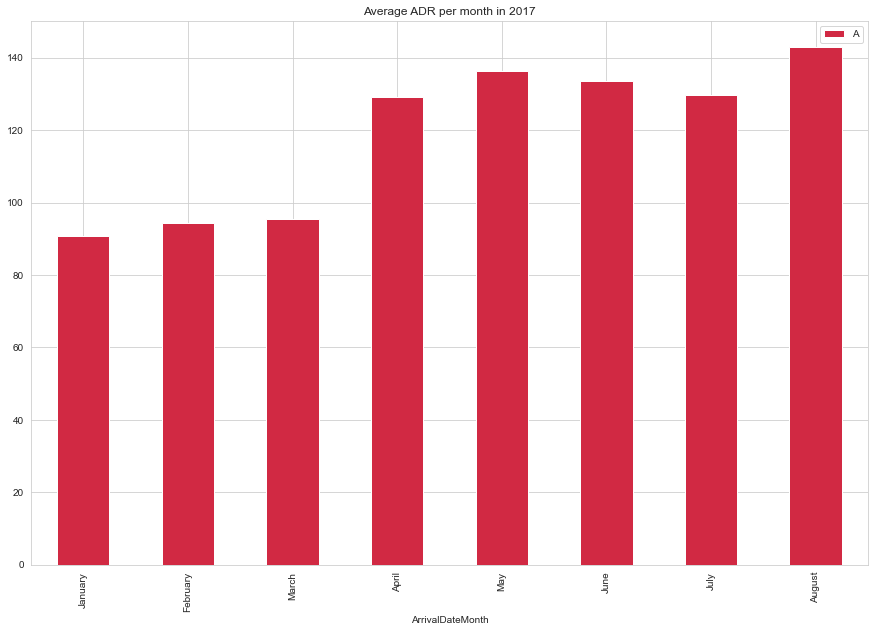

In [99]:
month_val = data.loc[data['ArrivalDateYear']==2017].groupby('ArrivalDateMonth').mean()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')

month_val.set_index('ArrivalDateMonth').plot.bar(figsize=(15,10),color ='#d12943ff')
plt.legend('Average ADR')
plt.title('Average ADR per month in 2017')

<AxesSubplot:xlabel='MarketSegment'>

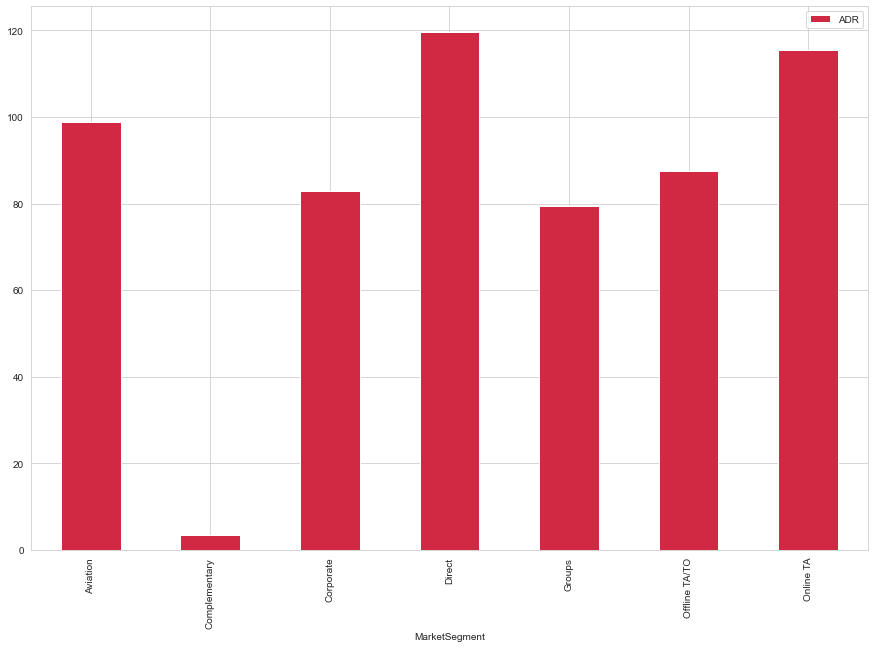

In [141]:
month_val = data.loc[data['ArrivalDateYear']==2016].groupby('MarketSegment').mean()['ADR'].reset_index()
#month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')
month_val.set_index('MarketSegment').plot.bar(figsize=(15,10),color ='#d12943ff')

### Nr of clients per month

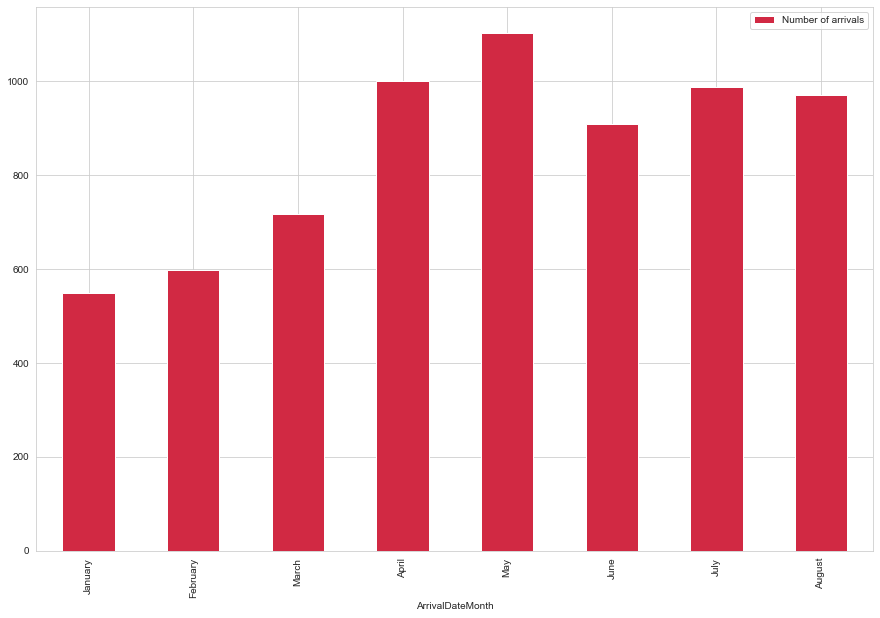

In [70]:
month_val = data.loc[(data['IsCanceled']==1) & (data['ArrivalDateYear']==2017)].groupby('ArrivalDateMonth').count()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')
month_val.set_index('ArrivalDateMonth').plot.bar(figsize=(15,10),color ='#d12943ff')
plt.legend(['Number of arrivals'])

#### 2016

Text(0.5, 1.0, 'Number of Cancelations per month in 2016')

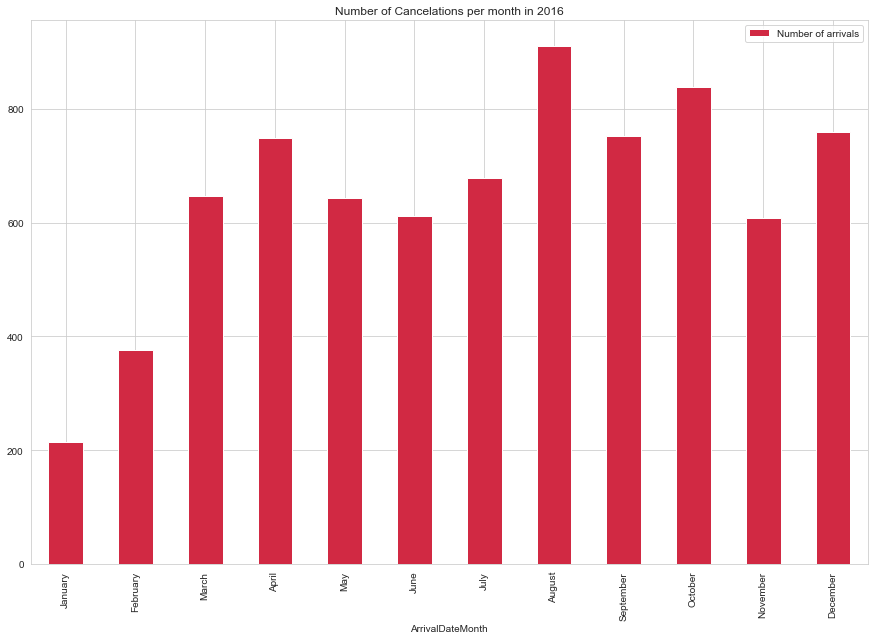

In [72]:
month_val = data.loc[(data['IsCanceled']==1) & (data['ArrivalDateYear']==2016)].groupby('ArrivalDateMonth').count()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')
month_val.set_index('ArrivalDateMonth').plot.bar(figsize=(15,10),color ='#d12943ff')
plt.legend(['Number of arrivals'])
plt.title('Number of Cancelations per month in 2016')

Text(0.5, 1.0, 'Number of arrivals per month in 2016')

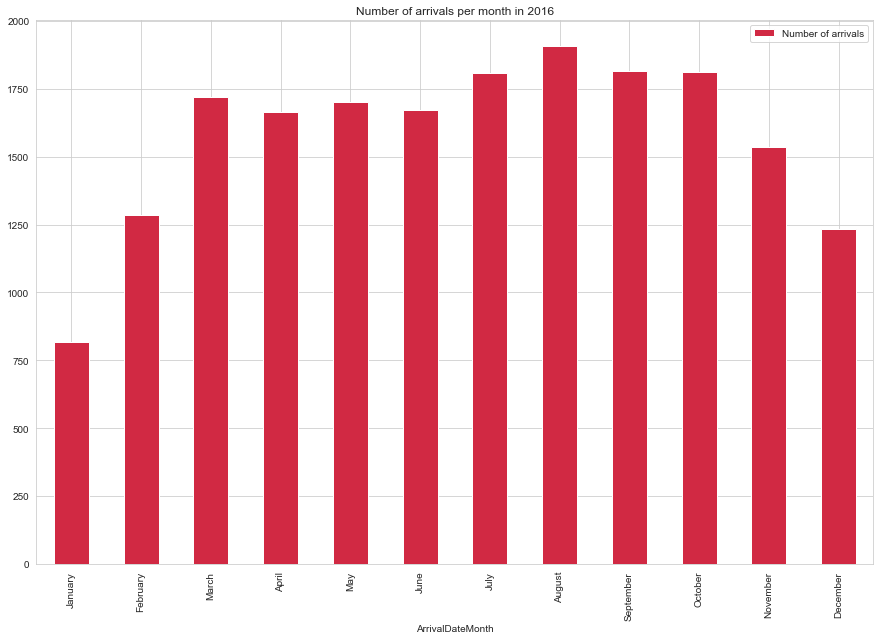

In [73]:
month_val = data.loc[(data['IsCanceled']==0) & (data['ArrivalDateYear']==2016)].groupby('ArrivalDateMonth').count()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')
month_val.set_index('ArrivalDateMonth').plot.bar(figsize=(15,10),color ='#d12943ff')


plt.legend(['Number of arrivals'])
plt.title('Number of arrivals per month in 2016')

Text(0.5, 1.0, 'Hotel Demand distribution over 2016')

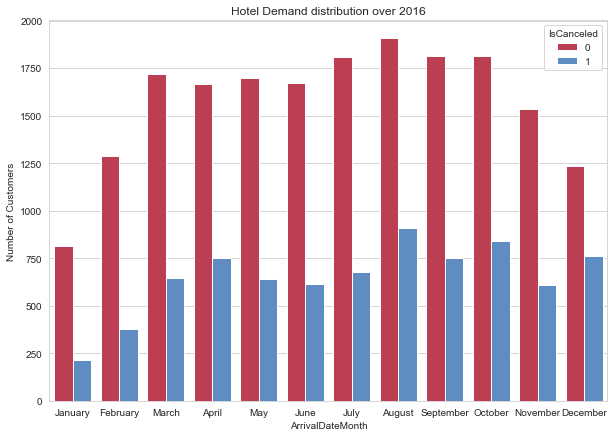

In [87]:
month_val = data.loc[ (data['ArrivalDateYear']==2016)].groupby(['IsCanceled','ArrivalDateMonth']).count()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(month_val['ArrivalDateMonth'],y =month_val['ADR'],hue = month_val['IsCanceled'],palette=['#d12943ff','#508cd1ff'] )
plt.ylabel('Number of Customers')
plt.title('Hotel Demand distribution over 2016')

Text(0.5, 1.0, 'Hotel Demand distribution over 2016')

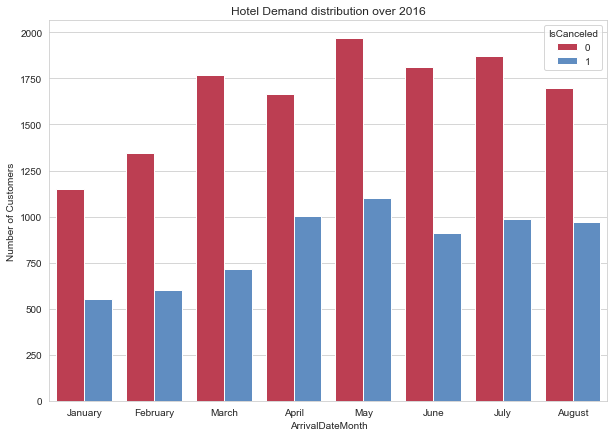

In [89]:
month_val = data.loc[ (data['ArrivalDateYear']==2017)].groupby(['IsCanceled','ArrivalDateMonth']).count()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(month_val['ArrivalDateMonth'],y =month_val['ADR'],hue = month_val['IsCanceled'],palette=['#d12943ff','#508cd1ff'] )
plt.ylabel('Number of Customers')
plt.title('Hotel Demand distribution over 2016')

#### Demand vs avg ADR

Text(0.5, 1.0, 'Hotel demand and price distribution over 2016')

<Figure size 720x504 with 0 Axes>

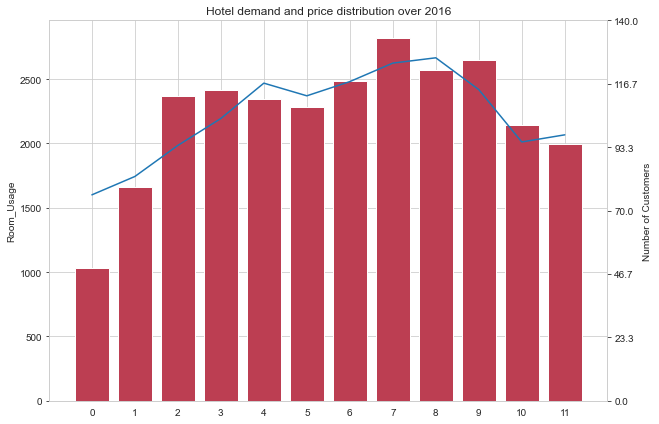

In [202]:
month_val = pd.DataFrame()
month_val['Room_Usage'] = (data.loc[ (data['ArrivalDateYear']==2016)].groupby(['ArrivalDateMonth']).count()['IsCanceled'])
month_val['Room_price'] = (data.loc[ (data['ArrivalDateYear']==2016)].groupby(['ArrivalDateMonth']).mean()['ADR'])
month_val.sort_values(ascending=False,by='Room_Usage',inplace=True)

month_val = sd.Sort_Dataframeby_Month(month_val.reset_index(),'ArrivalDateMonth')
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
fig, ax1 = plt.subplots(figsize=(10,7))
sns.barplot(month_val.index,y =month_val['Room_Usage'],palette=['#d12943ff'] )
ax2 = ax1.twinx()
ax2.plot(month_val['Room_price'],color=)
plt.ylabel('Number of Customers')
ax2.set_ylim(0,month_val['Room_price'].max())
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax2.grid(False)
ax1.grid(True)
plt.title('Hotel demand and price distribution over 2016')

Text(0.5, 1.0, 'Hotel demand and price distribution over 2016')

<Figure size 720x504 with 0 Axes>

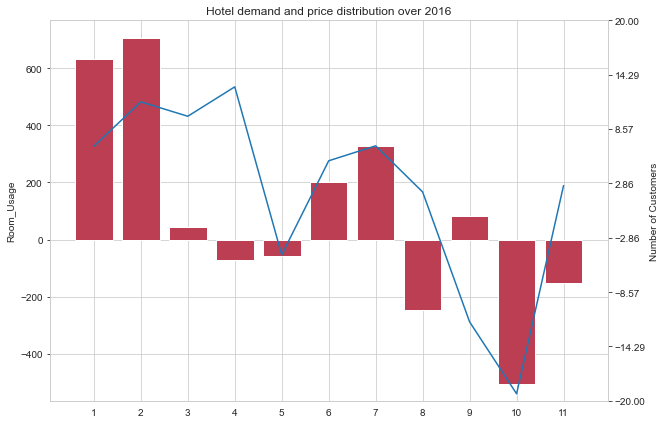

In [201]:
month_val = pd.DataFrame()
month_val['Room_Usage'] = (data.loc[ (data['ArrivalDateYear']==2016)].groupby(['ArrivalDateMonth']).count()['IsCanceled'])
month_val['Room_price'] = (data.loc[ (data['ArrivalDateYear']==2016)].groupby(['ArrivalDateMonth']).mean()['ADR'])
month_val.sort_values(ascending=False,by='Room_Usage',inplace=True)

month_val = sd.Sort_Dataframeby_Month(month_val.reset_index(),'ArrivalDateMonth')
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
fig, ax1 = plt.subplots(figsize=(10,7))
sns.barplot(month_val.index,y =month_val['Room_Usage'].diff(),palette=['#d12943ff'] )
ax2 = ax1.twinx()
ax2.plot(month_val['Room_price'].diff())
plt.ylabel('Number of Customers')
ax2.set_ylim(-20,20)
ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax2.grid(False)
ax1.grid(True)
plt.title('Hotel demand and price distribution over 2016')

#### Nr of clients per month of year

Text(0.5, 1.0, 'Number of arrivals per month')

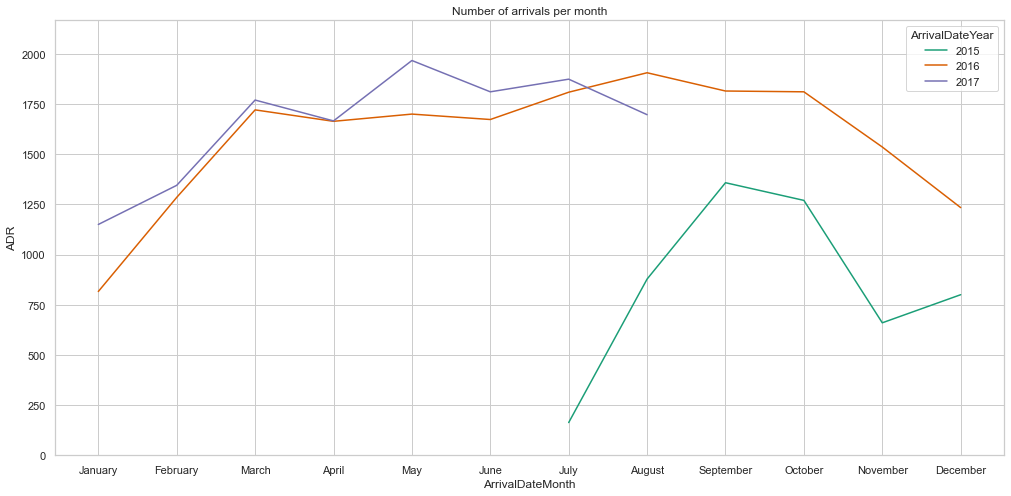

In [213]:
month_val = data.loc[data['IsCanceled']==0].groupby(['ArrivalDateYear','ArrivalDateMonth']).count()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')

plt.figure(figsize = (17,8))
sns.lineplot(x = month_val['ArrivalDateMonth'], y=month_val['ADR'],hue = month_val['ArrivalDateYear'],palette='Dark2')
plt.ylim([0,month_val['ADR'].max()+200])
plt.title('Number of arrivals per month')

#### Average ADR of clients per month of year

In [ ]:
month_val = data.loc[data['IsCanceled']==0].groupby(['ArrivalDateYear','ArrivalDateMonth']).mean()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')
sns.set_style('Whitegrid')
plt.figure(figsize = (17,8))
sns.d(x = month_val['ArrivalDateMonth'], y=month_val['ADR'],hue = month_val['ArrivalDateYear'],palette='Dark2',)
plt.ylim([0,month_val['ADR'].max()+10])
plt.ylabel('Average ADR per Month')

<AxesSubplot:xlabel='ArrivalDateMonth', ylabel='ADR'>

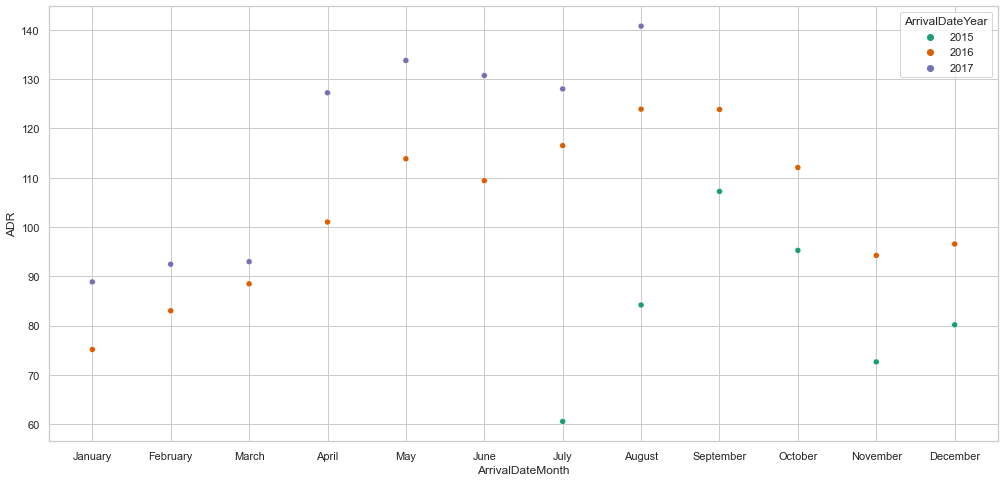

In [175]:
month_val = data.loc[data['IsCanceled']==0].groupby(['ArrivalDateYear','ArrivalDateMonth']).mean()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')
sns.set_style('whitegrid')
plt.figure(figsize = (17,8))
sns.scatterplot(x = month_val['ArrivalDateMonth'], y=month_val['ADR'],hue = month_val['ArrivalDateYear'],palette='Dark2')
# plt.ylim([0,month_val['ADR'].max()+10])
# plt.ylabel('Average ADR per Month')

Text(0, 0.5, 'Average ADR per Month')

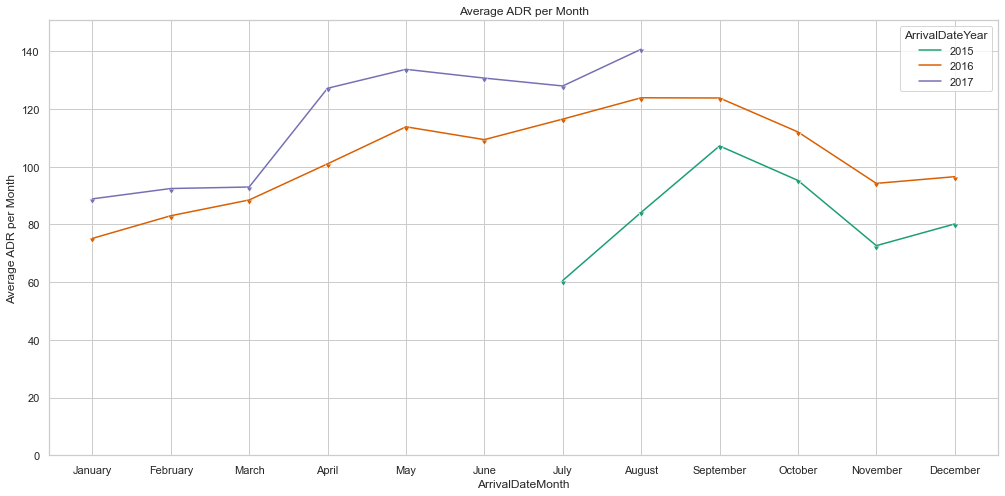

In [176]:
month_val = data.loc[data['IsCanceled']==0].groupby(['ArrivalDateYear','ArrivalDateMonth']).mean()['ADR'].reset_index()
month_val = sd.Sort_Dataframeby_Month(month_val,'ArrivalDateMonth')
sns.set_style('whitegrid')
plt.figure(figsize = (17,8))
sns.lineplot(x = month_val['ArrivalDateMonth'], y=month_val['ADR'],hue = month_val['ArrivalDateYear'],palette='Dark2',marker=11)
plt.title('Average ADR per Month')
plt.ylim([0,month_val['ADR'].max()+10])
plt.ylabel('Average ADR per Month')

#### Revenue Pre Analysis

In [178]:
data_rev = data.copy()
data_rev['Total_Cost'] = data_rev['ADR'] * (data_rev['StaysInWeekNights']+ data_rev['StaysInWeekendNights'])

In [179]:
revenue = data_rev.groupby(['ArrivalDateYear','ArrivalDateMonth','IsCanceled']).sum()['Total_Cost'].reset_index()
revenue = sd.Sort_Dataframeby_Month(revenue,'ArrivalDateMonth')

tot_rev = revenue.groupby(['ArrivalDateMonth', 'ArrivalDateYear'])['Total_Cost'].sum()
for i, ii  in zip(tot_rev.index, tot_rev.values):
    values = revenue.loc[(revenue['ArrivalDateMonth']==i[0]) & (revenue['ArrivalDateYear']==i[1]),'Total_Cost']
    revenue.loc[(revenue['ArrivalDateMonth']==i[0]) & (revenue['ArrivalDateYear']==i[1]),'Rev_PCT_Month'] = values / ii

Text(0.5, 1.0, 'Money Lost by the hotel throught cancelations')

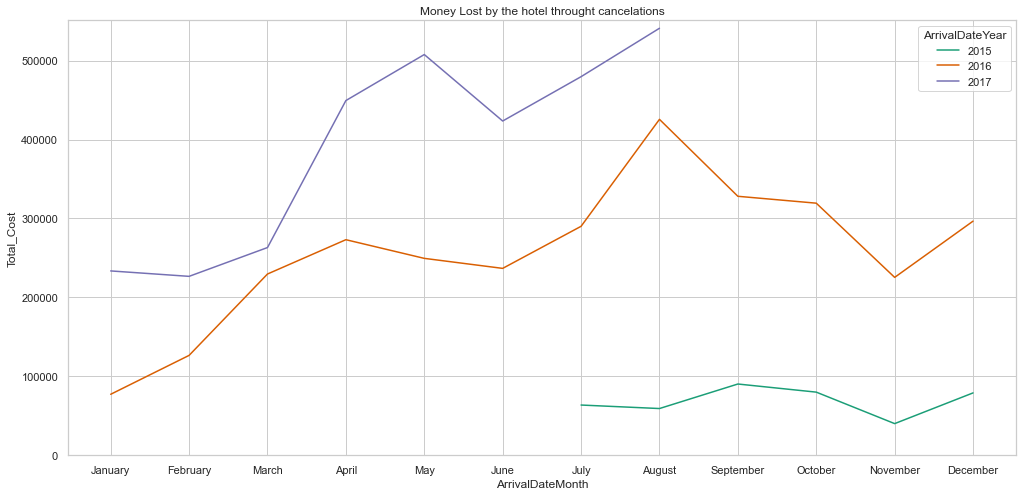

In [180]:
money_lost = revenue.loc[revenue['IsCanceled']==1, ['ArrivalDateYear','ArrivalDateMonth','Total_Cost']]

plt.figure(figsize = (17,8))
sns.lineplot(x = money_lost['ArrivalDateMonth'], y=money_lost['Total_Cost'],hue = money_lost['ArrivalDateYear'],palette='Dark2')
plt.ylim([0,money_lost['Total_Cost'].max()+10000])
#plt.axhline(money_lost['Total_Cost'].mean(),color='lightcoral')
plt.title('Money Lost by the hotel throught cancelations')

Text(0.5, 1.0, 'Money Lost by the hotel throught cancelations')

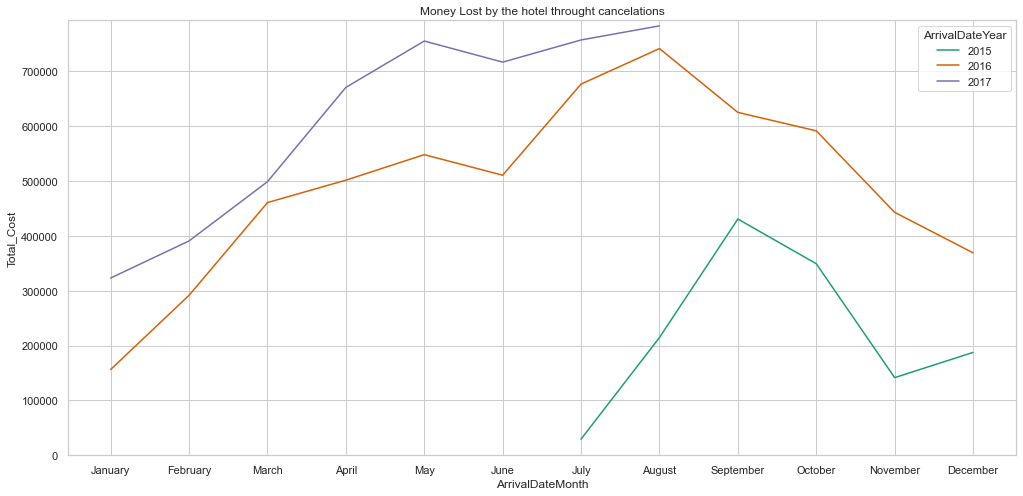

In [209]:
money_lost = revenue.loc[revenue['IsCanceled']==0, ['ArrivalDateYear','ArrivalDateMonth','Total_Cost']]


plt.figure(figsize = (17,8))
sns.lineplot(x = money_lost['ArrivalDateMonth'], y=money_lost['Total_Cost'],hue = money_lost['ArrivalDateYear'],palette='Dark2')
plt.ylim([0,money_lost['Total_Cost'].max()+10000])
#plt.axhline(money_lost['Total_Cost'].mean(),color='lightcoral')
plt.title('Money Lost by the hotel throught cancelations')

Text(0.5, 1.0, 'Average Revenue loss per year in %')

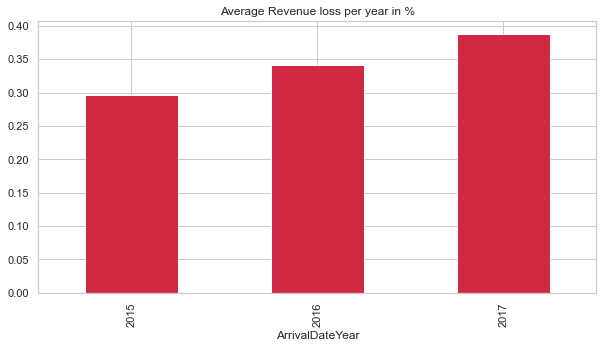

In [207]:
money_lost_pct.groupby(['ArrivalDateYear'])['Rev_PCT_Month'].mean().plot.bar(figsize=(10,5),color ='#d12943ff')
plt.title('Average Revenue loss per year in %')

Text(0.5, 1.0, 'Monthly average of money lost by year')

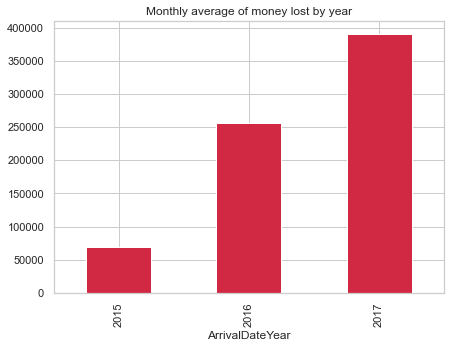

In [208]:
yearly_lost = money_lost.groupby('ArrivalDateYear')['Total_Cost'].sum().reset_index()
for i,ii in zip(yearly_lost['ArrivalDateYear'],[6,12,8]):
    value = yearly_lost.loc[yearly_lost['ArrivalDateYear']==i,'Total_Cost'] 
    yearly_lost.loc[yearly_lost['ArrivalDateYear']==i,'Cost_Month'] = value/ii
    
yearly_lost.set_index('ArrivalDateYear')['Cost_Month'].plot.bar(figsize=(7,5),color = '#d12943ff')
plt.title('Monthly average of money lost by year')

In [3]:
explor = data.copy()
explor['Total_Stay'] = explor['StaysInWeekNights'] + explor['StaysInWeekendNights']

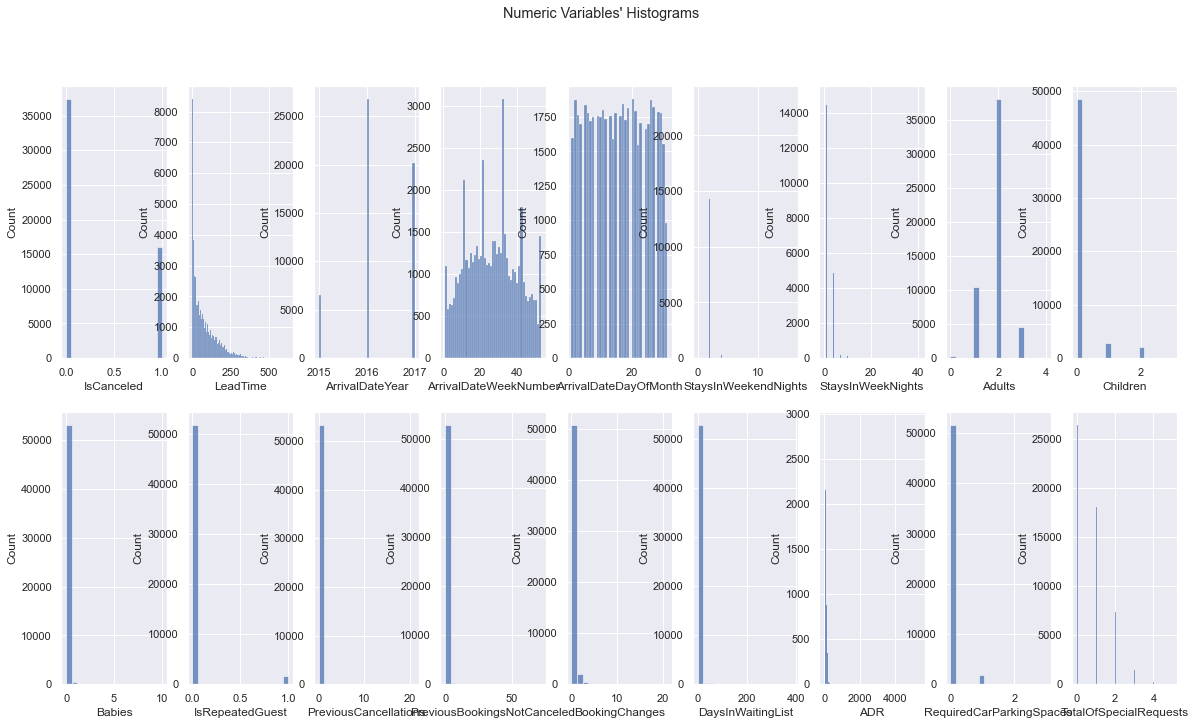

In [304]:
def histogram(data):
    from math import ceil
    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set()
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

    
    for ax, feat in zip(axes.flatten(), metric_features): 

        sns.histplot(data[feat], ax = ax)
        #plt.title(feat)

    
    title = "Numeric Variables' Histograms"

    plt.suptitle(title)

    plt.show()
    
histogram(data)

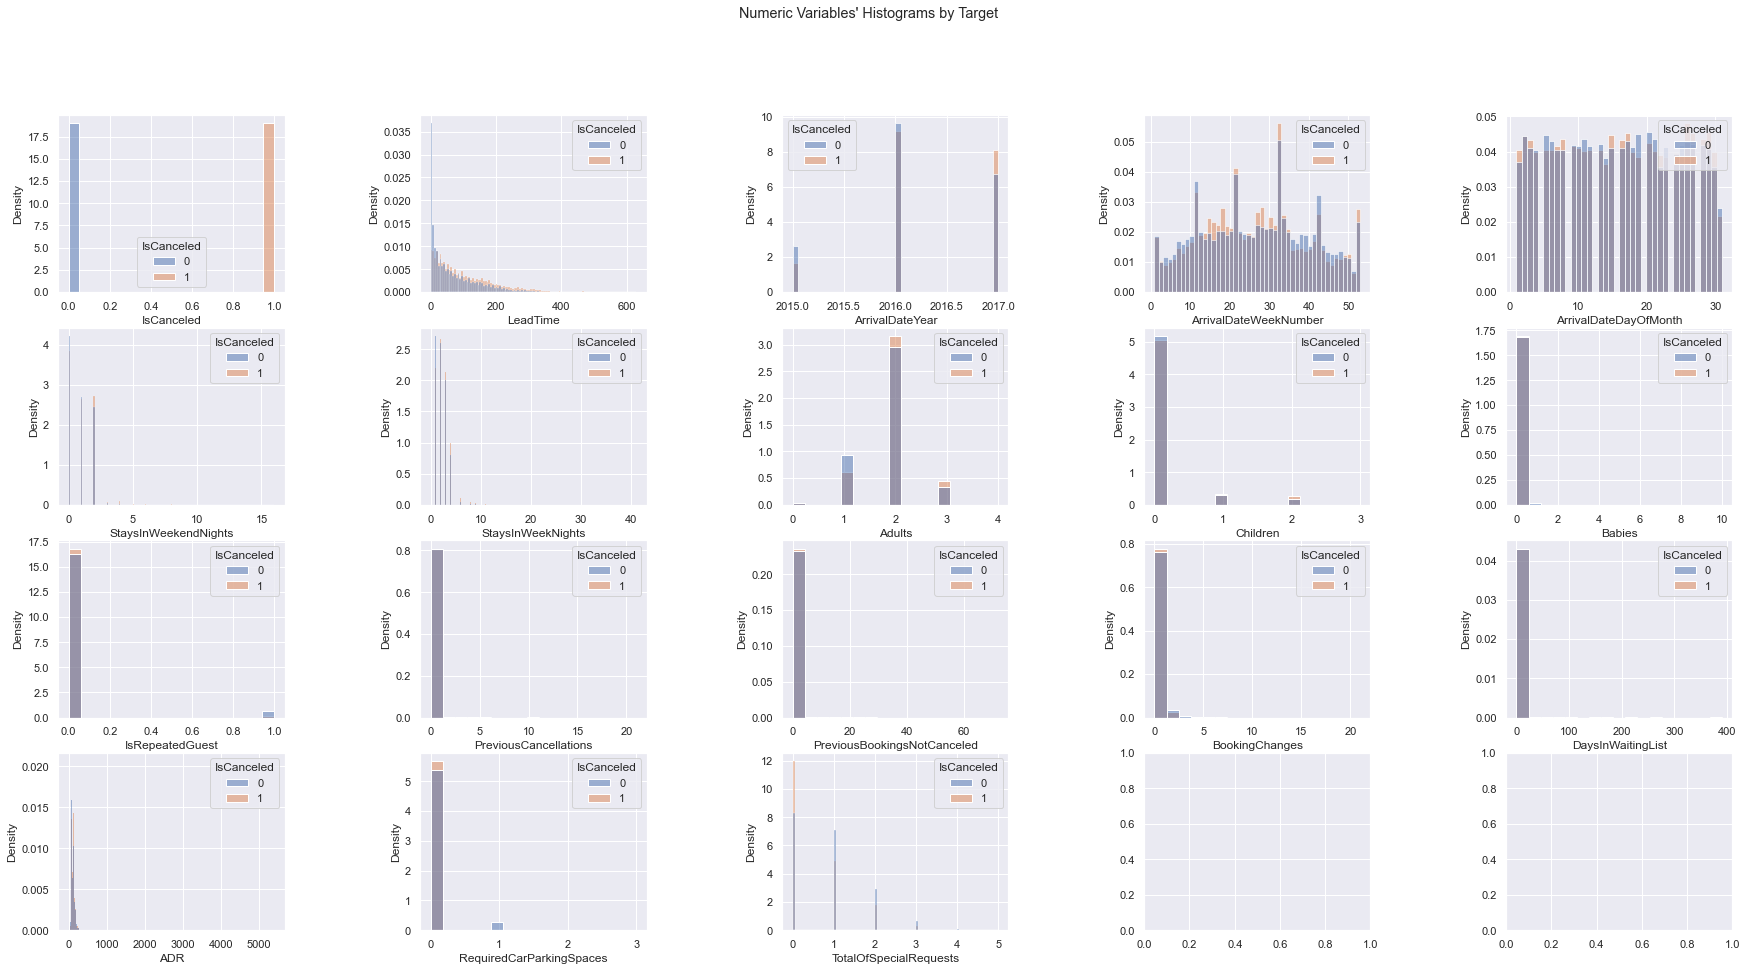

In [305]:
def histogram_target (df, target):
    from math import ceil
    metric_features = df.select_dtypes(include=np.number).columns
    # All Numeric Variables' Box Plots in one figure
    sns.set()

    # Prepare figure. Create individual axes where each box plot will be placed
    fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(30, 15))

    # Plot data
    # Iterate across axes objects and associate each box plot:
    for ax, feat in zip(axes.flatten(), metric_features):
        sns.histplot(x=df[feat], hue=df[f'{target}'], stat='density',common_norm=False, ax=ax)

    # Layout
    # Add a centered title to the figure:
    title = "Numeric Variables' Histograms by Target"
    plt.suptitle(title)
    plt.subplots_adjust(wspace=0.6)

    plt.show()
    
    
histogram_target(data, 'IsCanceled')

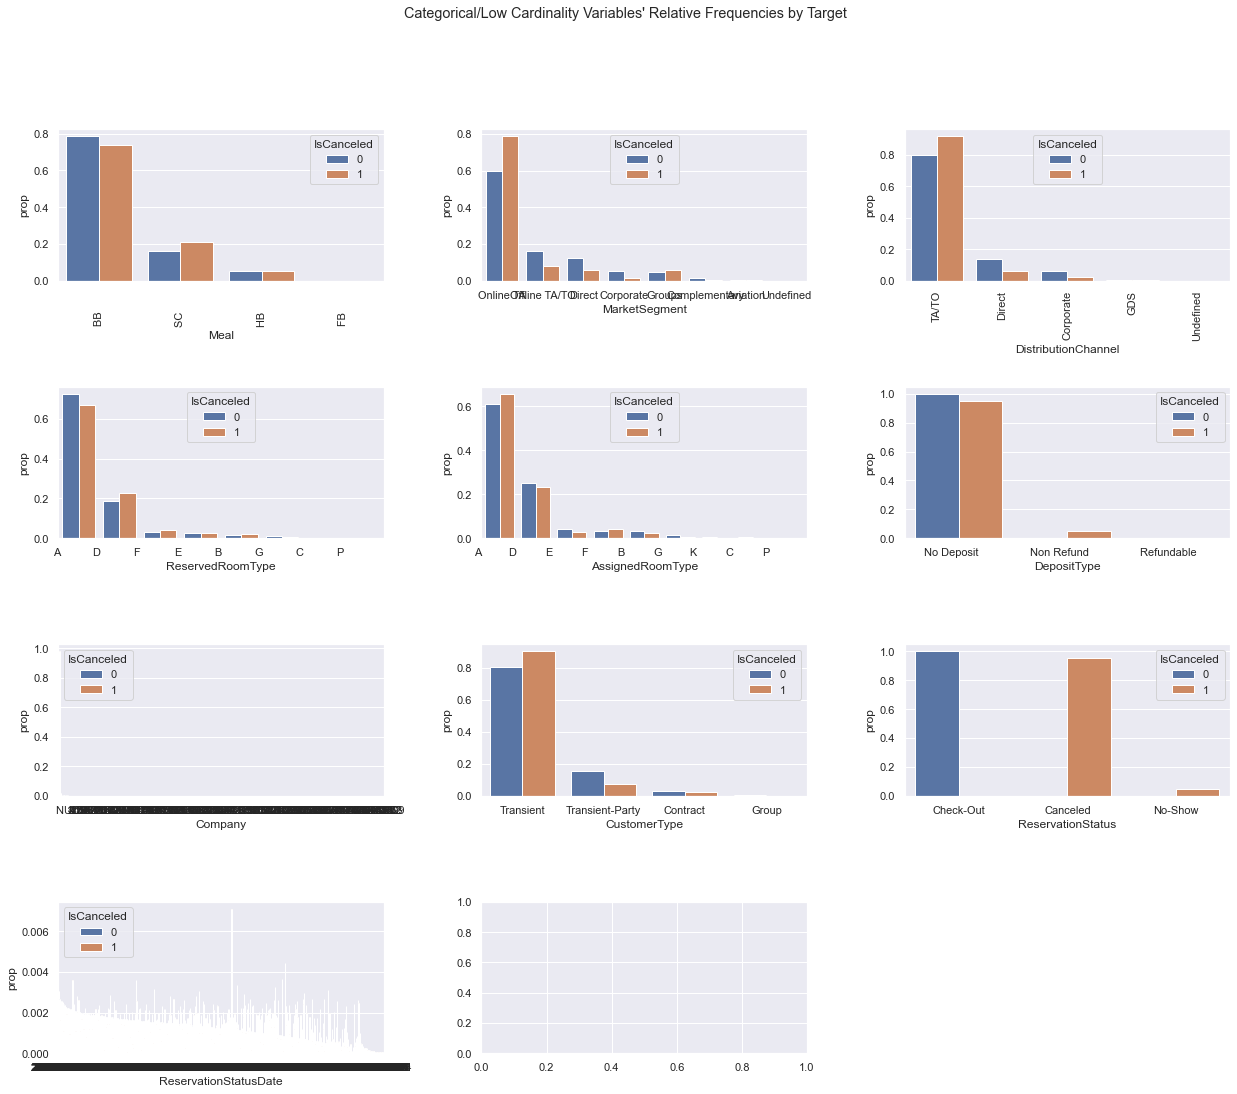

In [306]:
def target_categorical_analysis(df,target):
    from math import ceil
    non_metric_features = df.select_dtypes(exclude=np.number).columns
    fig, axes = plt.subplots(4, ceil(len(non_metric_features) / 4), figsize=(21, 17))

    # Plot data
    # Iterate across axes objects and associate each bar plot:
    for ax, feat in zip(axes.flatten(), non_metric_features):
        data = df.groupby([target])[feat].value_counts(normalize=True).rename('prop').reset_index()
        sns.barplot(data=data, x=feat, y='prop', hue=f'{target}', ax=ax)

    title = "Categorical/Low Cardinality Variables' Relative Frequencies by Target"
    plt.suptitle(title)
    # Rotating X-axis labels
    axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
    axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
    axes.flatten()[-1].remove()
    plt.subplots_adjust(wspace=0.3, hspace=0.7)

    plt.show()
    
    
target_categorical_analysis(data.drop(columns=['ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth','Country','Agent']),'IsCanceled')

In [307]:
for i in data.columns:
    print(f'Columns {i}')
    print(data.groupby(i)['IsCanceled'].mean().sort_values(ascending=False))
    print('-'*125)

Columns IsCanceled
IsCanceled
1    1.0
0    0.0
Name: IsCanceled, dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Columns LeadTime
LeadTime
629    1.000000
412    1.000000
389    1.000000
391    1.000000
393    1.000000
         ...   
377    0.111111
2      0.104247
1      0.083137
0      0.075147
463    0.000000
Name: IsCanceled, Length: 453, dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Columns ArrivalDateYear
ArrivalDateYear
2017    0.339927
2016    0.291080
2015    0.216947
Name: IsCanceled, dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
Columns ArrivalDateMonth
ArrivalDateMonth
April        0.344488
July         0.330432
December     0.325149
May          0.322557
August       0.320134
June         0.30

In [308]:
refund = pd.DataFrame(index = data.groupby('DepositType')['IsCanceled'].mean().index)
refund['values'] = data.groupby('DepositType')['IsCanceled'].mean().values
refund['count'] = data.groupby('DepositType')['IsCanceled'].count().values
refund['count'] = refund['count']/sum(refund['count'])

<AxesSubplot:ylabel='DepositType'>

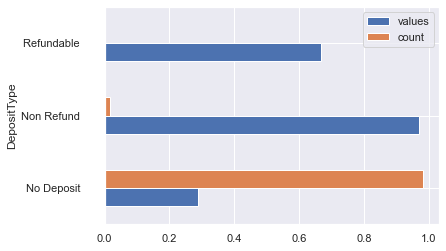

In [309]:
refund.plot.barh()

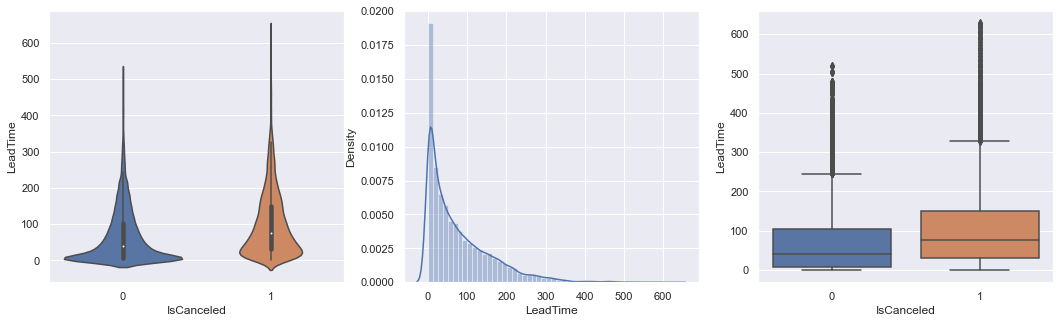

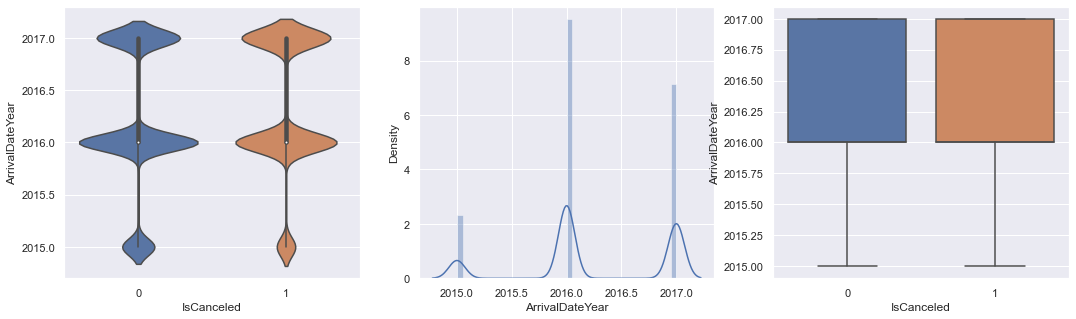

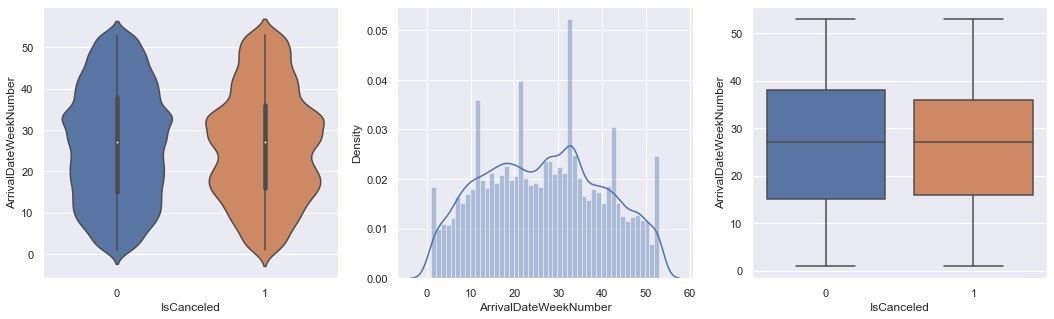

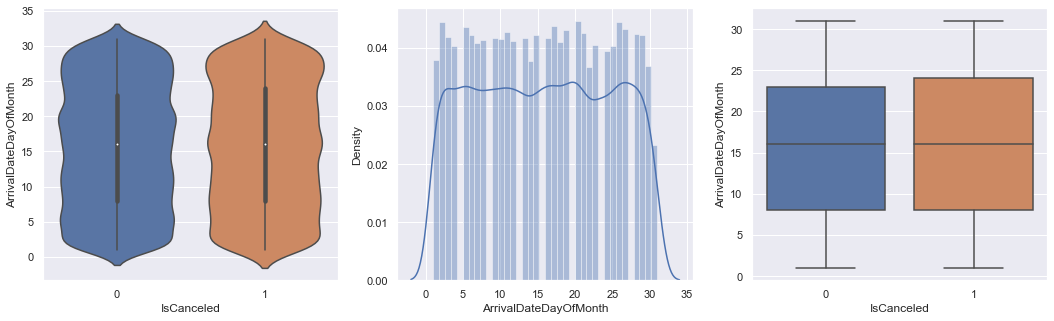

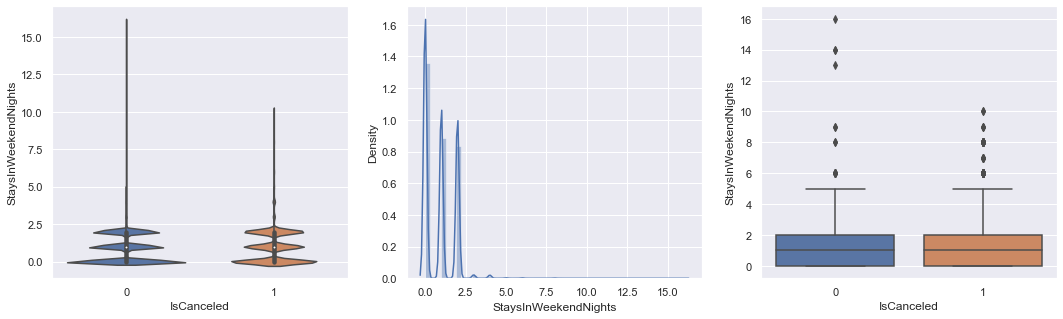

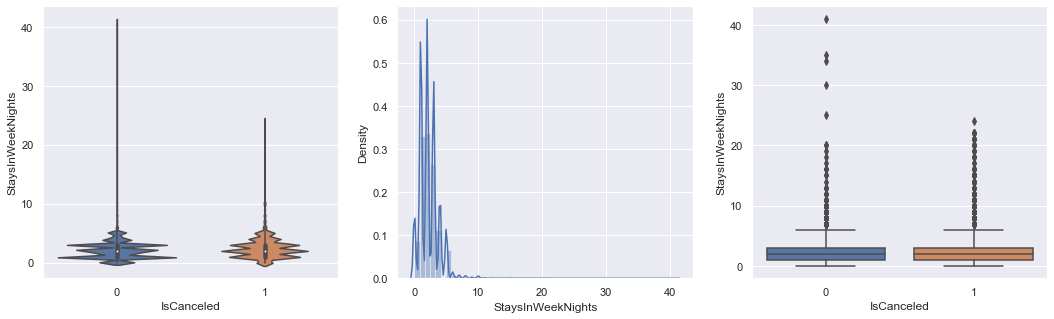

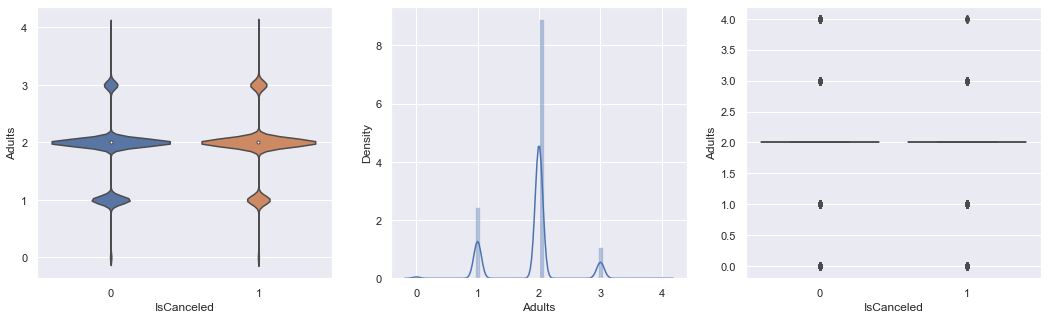

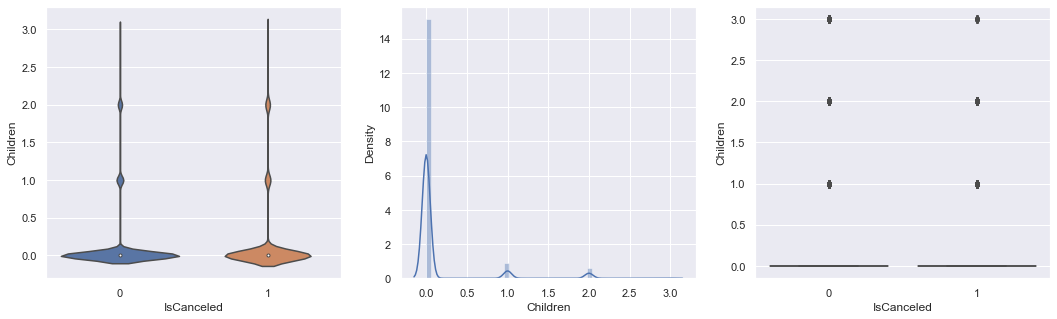

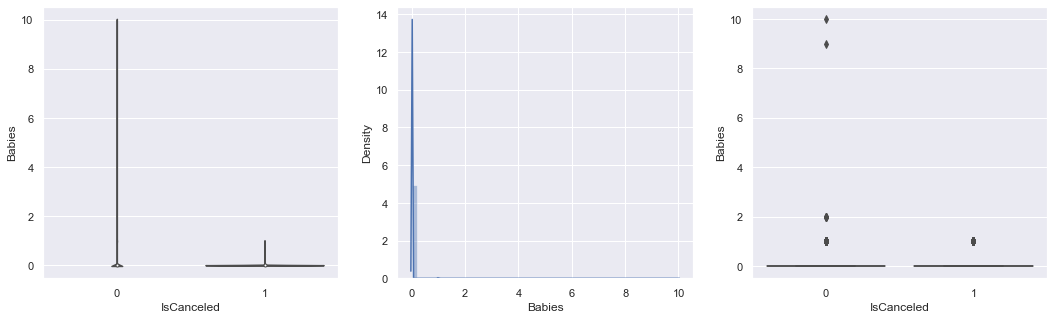

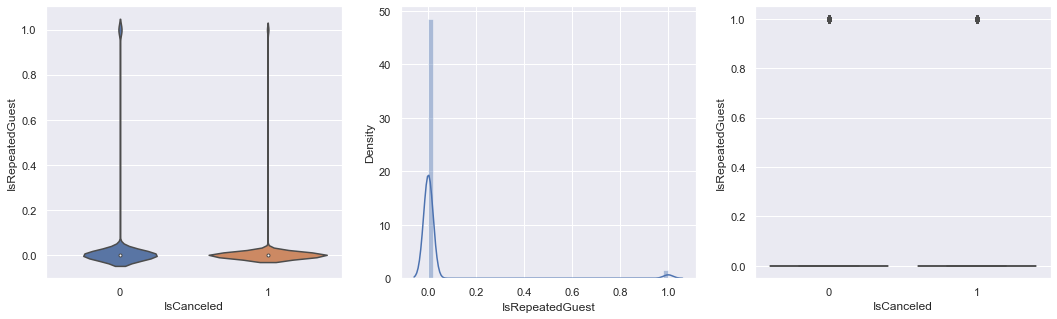

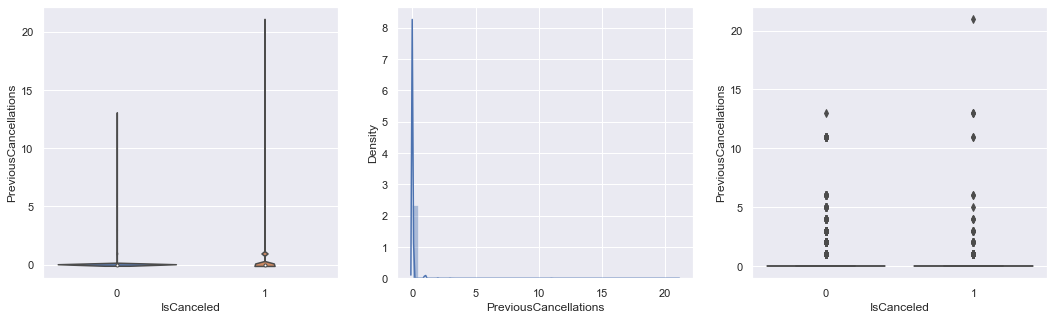

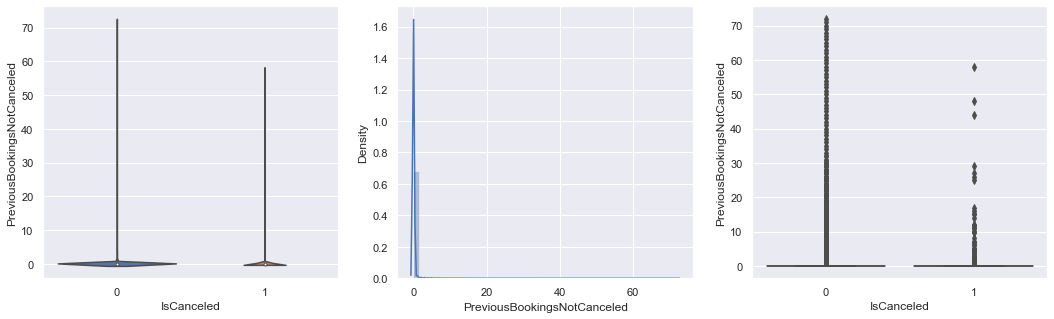

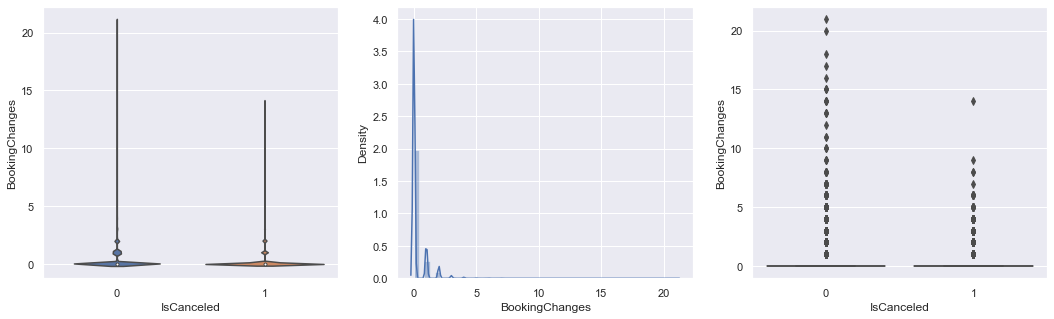

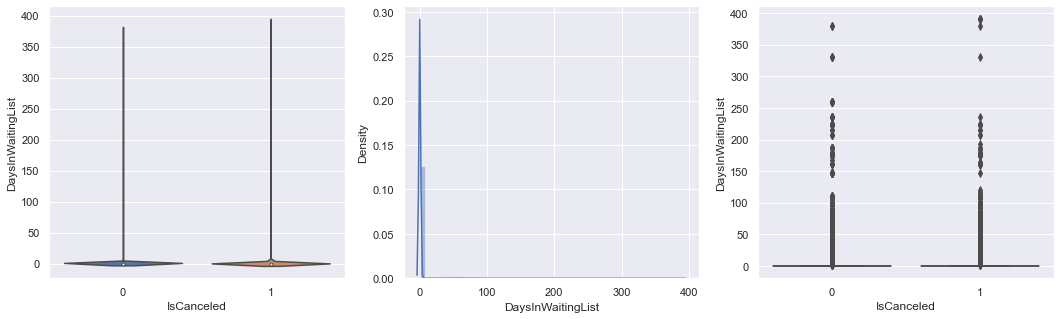

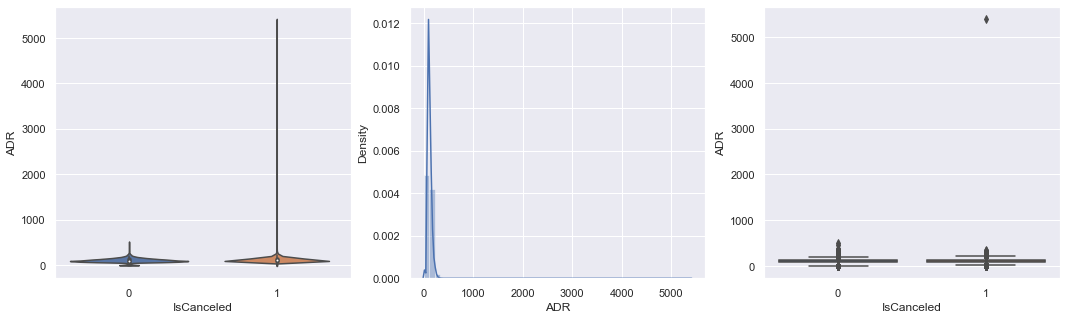

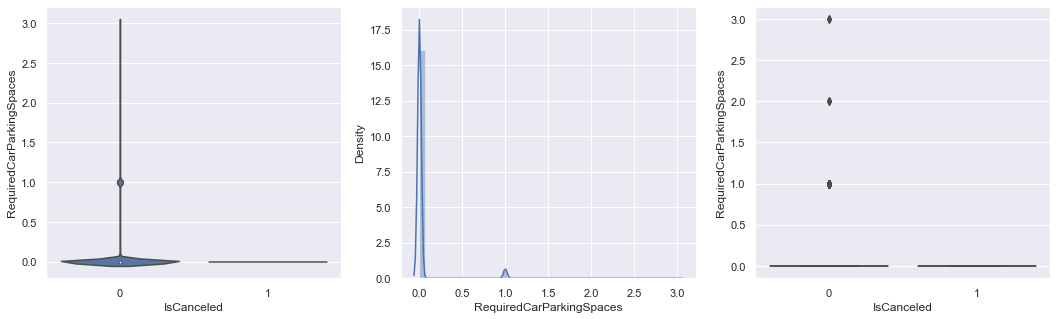

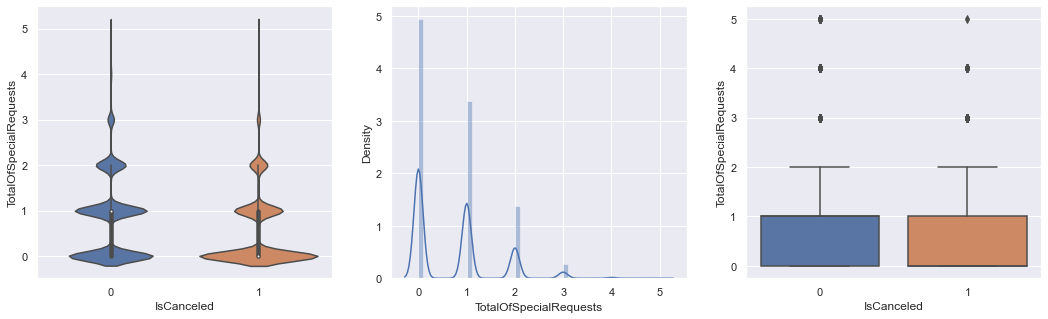

In [310]:
def univariate_target_analysis (data, target):
    for i in data.select_dtypes(exclude=np.object0).columns[1:]:
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))
        sns.violinplot(ax = axes[0], x = data[target], y = data[i])
        sns.distplot(data[i], hist = True, ax = axes[1])
        sns.boxplot(ax = axes[2], x = data[target], y = data[i])
        plt.show()        
univariate_target_analysis(data,'IsCanceled')

#### Data Split - Based on seasonality

In [311]:
data.groupby(['ArrivalDateYear','ArrivalDateMonth'])['ADR'].mean()

ArrivalDateYear  ArrivalDateMonth
2015             August               82.980958
                 December             82.672814
                 July                 66.813013
                 November             73.900213
                 October              95.088493
                 September           106.795730
2016             April               103.867820
                 August              124.245032
                 December             97.855461
                 February             82.531379
                 January              75.774476
                 July                117.441066
                 June                112.211142
                 March                93.957572
                 May                 116.869181
                 November             95.233357
                 October             114.493382
                 September           126.197422
2017             April               129.179115
                 August              142.988201
      

In [4]:
def split(x,y):
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(x,y, test_size = 0.3, random_state = 10, shuffle = True,stratify=y)
    return(X_train,y_train,X_val,y_val)

#### Creation of train and validation datasets

In [5]:
train_high = data.loc[(data['ArrivalDateMonth'].isin(['April','May','June','July','August','September']) )& (data['ArrivalDateYear'].isin([2015,2016])) ]
test_high = data.loc[(data['ArrivalDateMonth'].isin(['April','May','June','July','August','September']) )& (data['ArrivalDateYear']==2017) ]

In [6]:
x_train_high, y_train_high, x_val_high, y_val_high = split(train_high.drop(columns=['IsCanceled']),train_high['IsCanceled'])

In [7]:
train_low = data.loc[(data['ArrivalDateMonth'].isin(['March','January','February','October','November','December']) )& (data['ArrivalDateYear'].isin([2015,2016])) ]
test_low = data.loc[(data['ArrivalDateMonth'].isin(['March','January','February','October','November','December']) )& (data['ArrivalDateYear']==2017) ]

In [8]:
x_train_low, y_train_low,x_val_low, y_val_low = split(train_low.drop(columns=['IsCanceled']),train_low['IsCanceled'])

#### Data Preparation

#### Missing Values

High Train

In [318]:
x_train_high.isnull().sum()

LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
dtype: int

In [9]:
x_train_high['Children'].mode()
x_train_high['Children'].fillna(value= 0,inplace=True)

In [320]:
x_train_high[x_train_high['Children'].isnull() == True]['Children']

Series([], Name: Children, dtype: float64)

In [321]:
x_train_high.isnull().sum()

LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
dtype: int

In [322]:
for i in x_train_high.columns:
    print(f'Columns {i}')
    print(x_train_high[i].value_counts())
    print('-'*125)
    
# MarketSegment, DistributionChannel have NULL - Paper says this is not a MV
# Agent and Company have Undefined

Columns LeadTime
0      771
1      431
3      259
2      244
5      242
      ... 
451      1
314      1
440      1
337      1
420      1
Name: LeadTime, Length: 359, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
Columns ArrivalDateYear
2016    10448
2015     2212
Name: ArrivalDateYear, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
Columns ArrivalDateMonth
September    2982
August       2731
July         2011
April        1697
May          1644
June         1595
Name: ArrivalDateMonth, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
Columns ArrivalDateWeekNumber
38    738
39    718
37    676
36    666
33    660
34    626
35    597
32    586
27    517
28    485
40    471
30    465
29    462
21    443
31    429
16  

Low Train

In [323]:
x_train_low.isnull().sum()

LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        2
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
dtype: int

In [10]:
x_train_low['Country'].mode()
x_train_low['Country'].fillna(value= 'PRT',inplace=True)

In [325]:
for i in x_train_low.columns:
    print(f'Columns {i}')
    print(x_train_low[i].value_counts())
    print('-'*125)

Columns LeadTime
0      738
1      416
2      285
4      259
3      242
      ... 
468      1
341      1
361      1
443      1
342      1
Name: LeadTime, Length: 362, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
Columns ArrivalDateYear
2016    8290
2015    2366
Name: ArrivalDateYear, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
Columns ArrivalDateMonth
October     2948
December    2134
November    2018
March       1661
February    1175
January      720
Name: ArrivalDateMonth, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
Columns ArrivalDateWeekNumber
41    771
44    651
53    638
43    634
42    612
45    512
49    507
46    493
47    491
48    486
50    484
13    424
10    376
52    374
11    347
12    338
9 

#### Outliers 

High Train

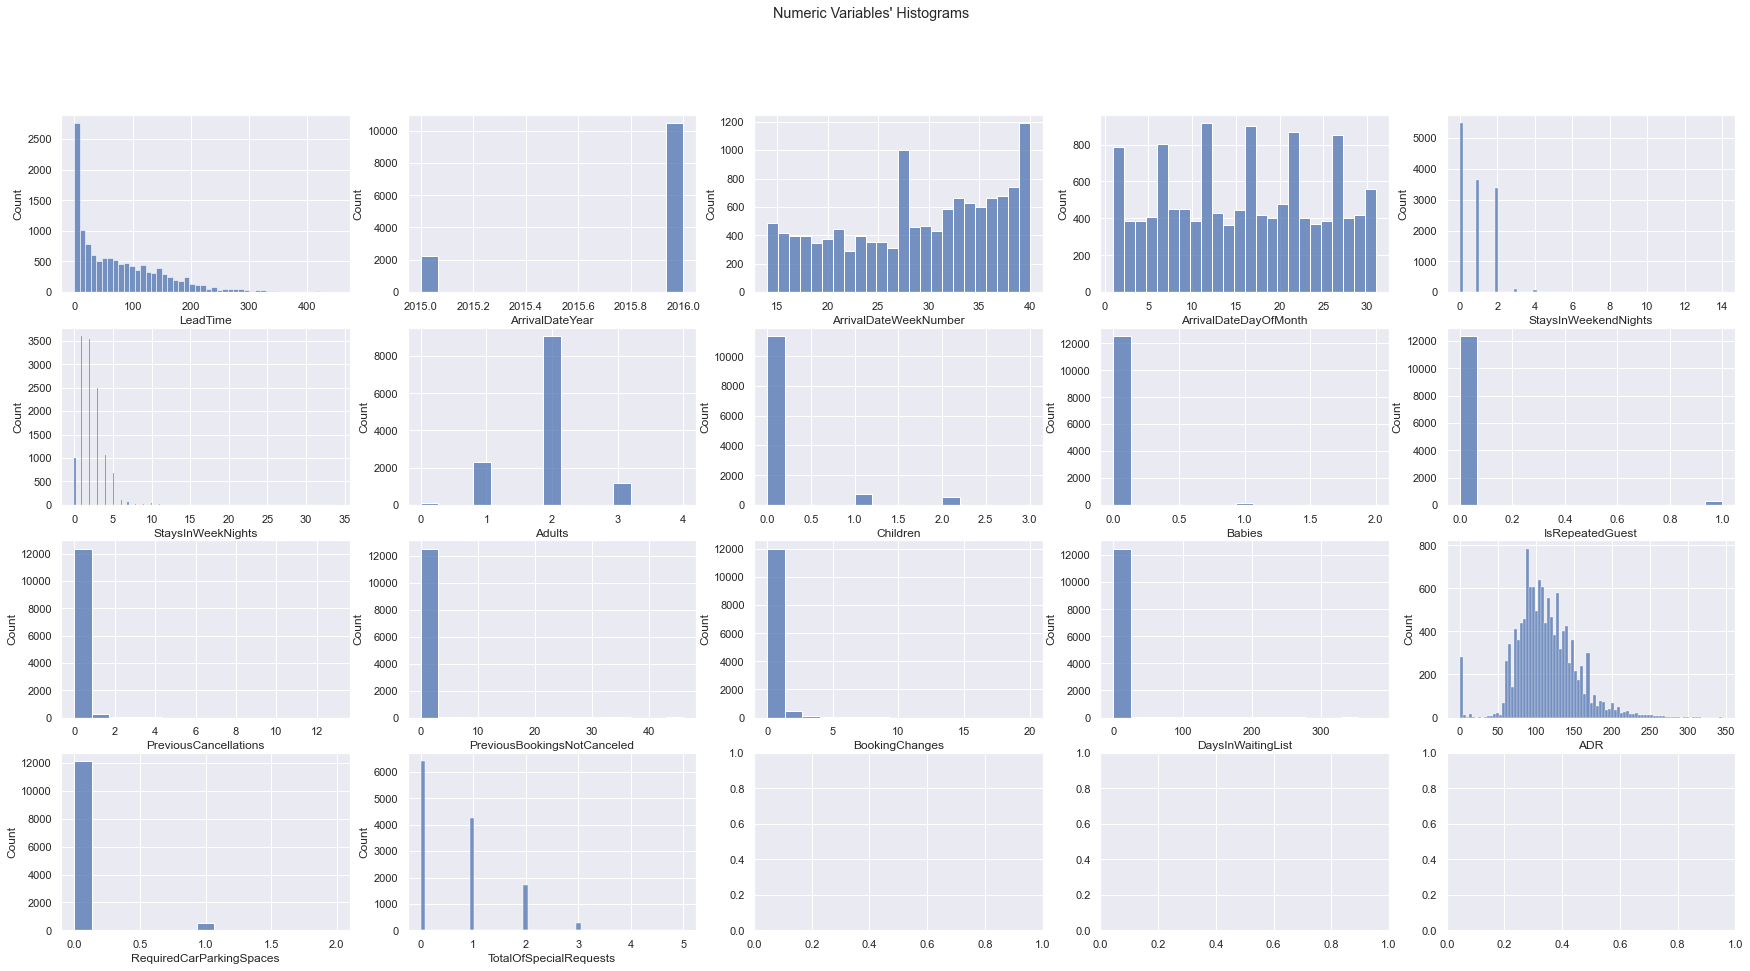

In [326]:
def histogram(data):
    from math import ceil
    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set()
    fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(30, 15))

    
    for ax, feat in zip(axes.flatten(), metric_features): 

        sns.histplot(data[feat], ax = ax)
        #plt.title(feat)

    
    title = "Numeric Variables' Histograms"

    plt.suptitle(title)

    plt.show()

histogram(x_train_high)

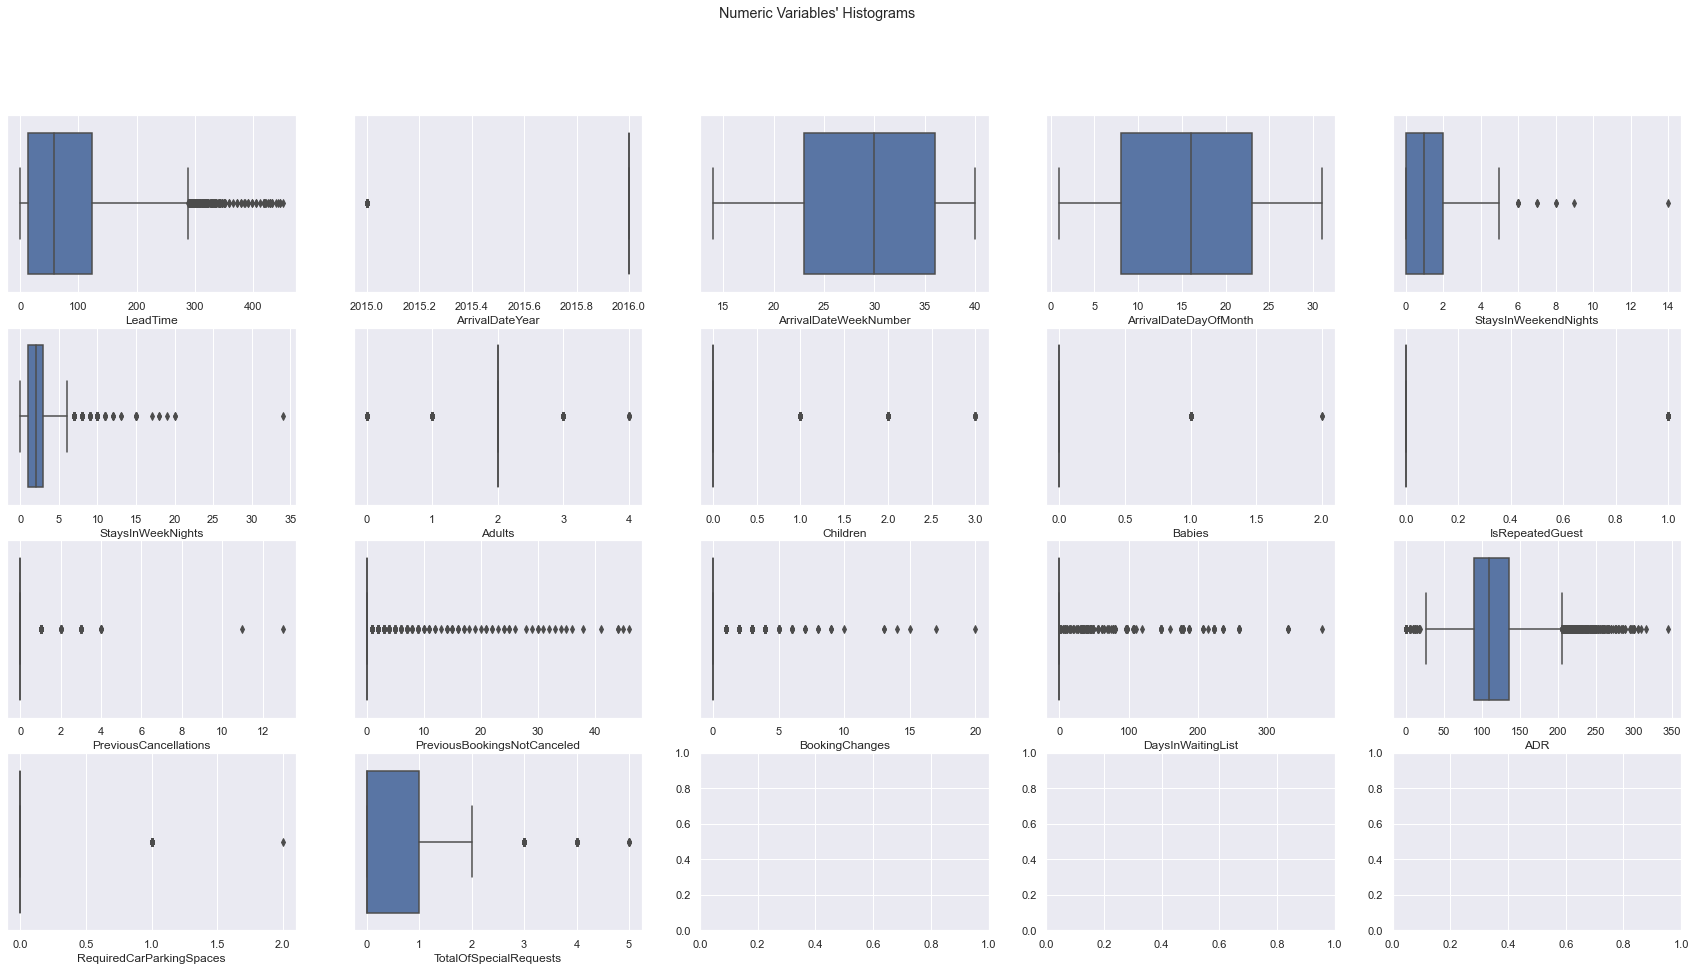

In [327]:
def boxplot (data):
    from math import ceil
    # All Numeric Variables' Histograms in one figure
    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set()
    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(30, 15))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method

        sns.boxplot(data[feat], ax = ax)
        #plt.title(feat)

    # Layout
    # Add a centered title to the figure:
    title = "Numeric Variables' Histograms"

    plt.suptitle(title)

    plt.show()
    
boxplot(x_train_high)

In [11]:
#Manually

filters1 = (
    (x_train_high['ADR']<= 340)
    &
    (x_train_high['StaysInWeekendNights']<=13)
    &
    (x_train_high['StaysInWeekNights']<= 30)
    &
    (x_train_high['PreviousCancellations']<= 10)
)


x_train_high = x_train_high[filters1 == True]

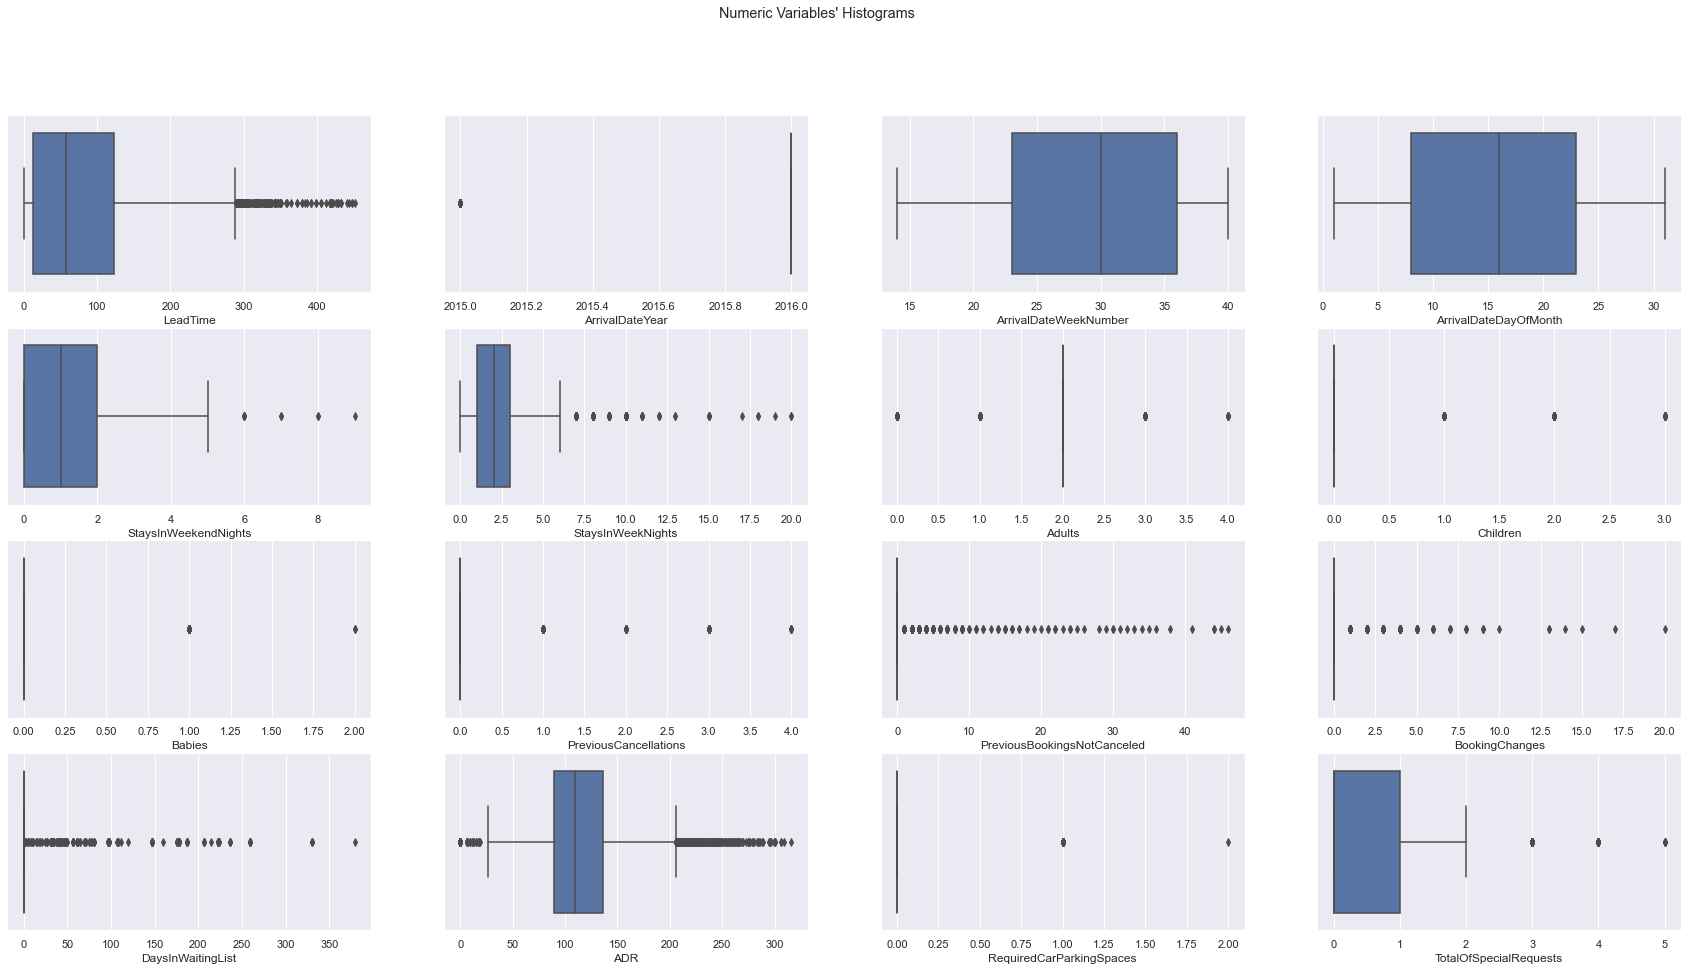

In [14]:
boxplot(x_train_high)

Low Train

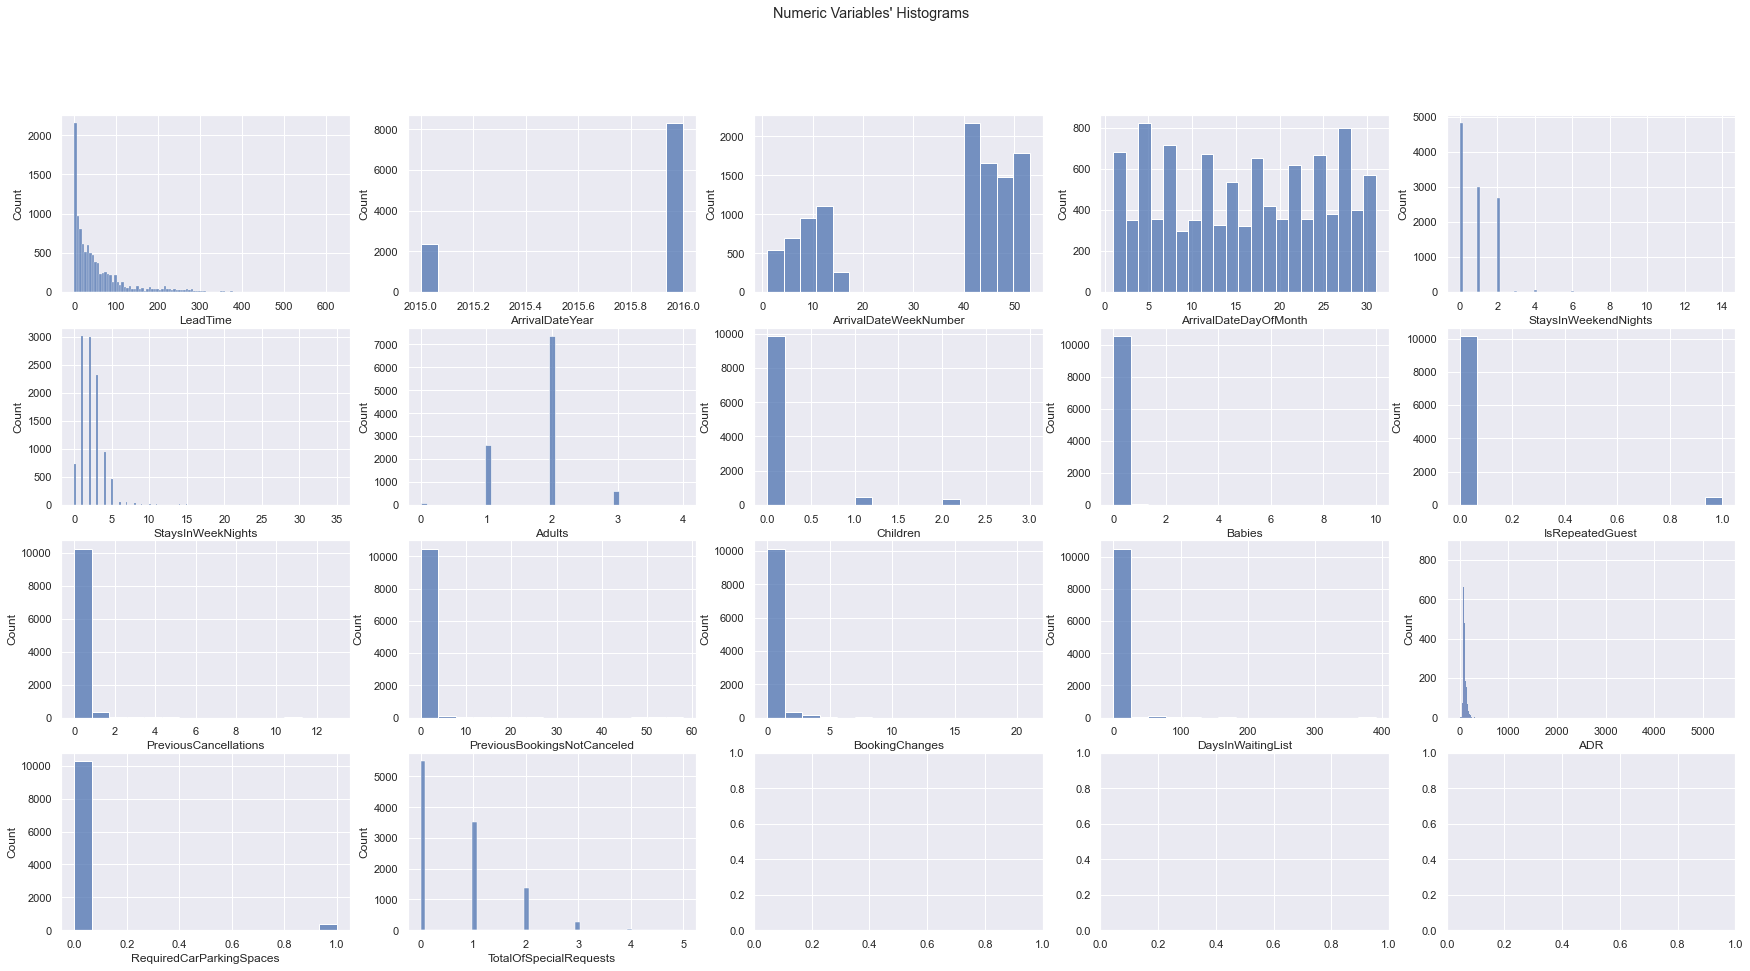

In [331]:
histogram(x_train_low)

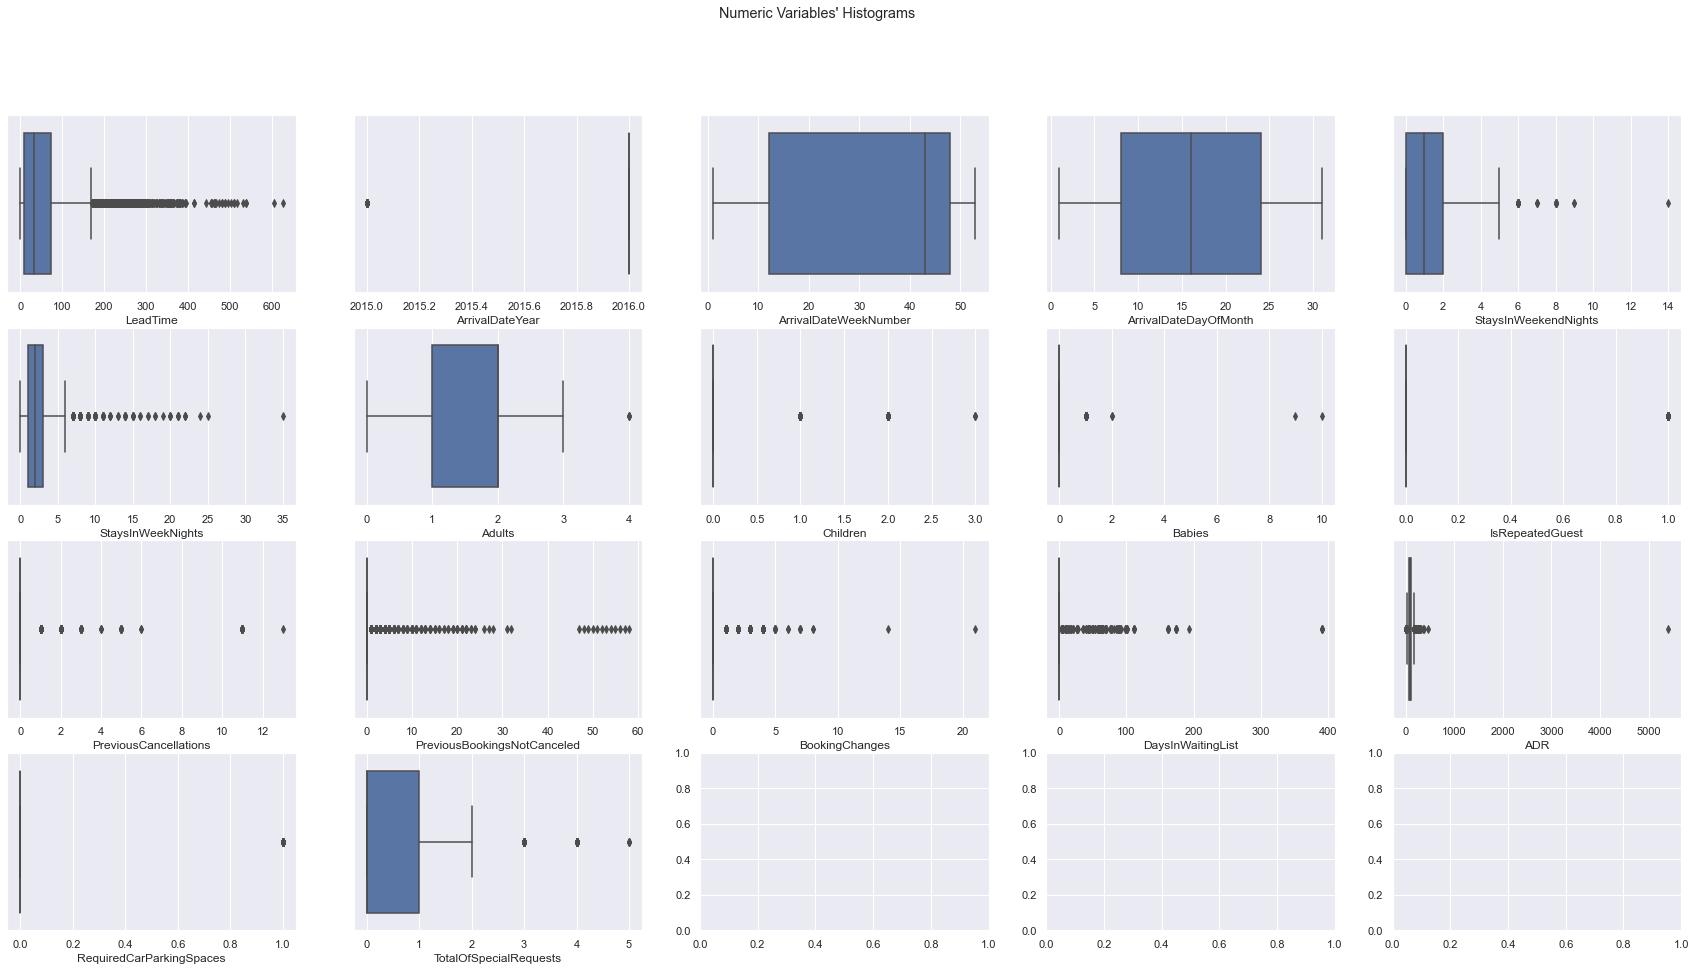

In [332]:
boxplot(x_train_low)

In [12]:
filters2 = (
    (x_train_low['ADR']<= 400)
    &
    (x_train_low['StaysInWeekendNights']<=13)
    &
    (x_train_low['StaysInWeekNights']<= 30)
    &
    (x_train_low['PreviousCancellations']<= 10)
    &
    (x_train_low['Babies'] <= 8)
    &
    (x_train_low['DaysInWaitingList']<= 300)
    &
    (x_train_low['BookingChanges']<= 20)
)

x_train_low = x_train_low[filters2 == True]

In [336]:
x_train_low
#29 eliminated

LeadTime  ArrivalDateYear ArrivalDateMonth  ArrivalDateWeekNumber  \
19911       185             2016         November                     45   
61848         4             2016         November                     47   
5678         89             2015         November                     48   
42036        57             2016          January                      2   
60753       224             2016          October                     44   
...         ...              ...              ...                    ...   
59960        19             2016          October                     43   
8593         33             2016            March                     13   
6733        151             2016          January                      4   
21158        60             2016         December                     50   
61071        23             2016         November                     46   

       ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  \
19911                      4                     1                  2       2   
61848                     19                     0                  1       2   
5678                      23                     1                  2       2   
42036                      6                     2                  9       2   
60753                     29                     2                  2       2   
...                      ...                   ...                ...     ...   
59960                     21                     0                  1       2   
8593                      26                     1                  1       1   
6733                      19                     0                  3       1   
21158                      4                     2                  5       2   
61071                      6                     1                  0       2   

       Children  Babies  ...      DepositType        Agent      Company  \
19911       1.0       0  ...  No Deposit                 9         NULL   
61848       0.0       1  ...  No Deposit              NULL         NULL   
5678        0.0       0  ...  No Deposit                 9         NULL   
42036       0.0       0  ...  No Deposit              NULL         NULL   
60753       0.0       0  ...  No Deposit                 9         NULL   
...         ...     ...  ...              ...          ...          ...   
59960       0.0       0  ...  No Deposit                 9         NULL   
8593        0.0       0  ...  No Deposit                 9         NULL   
6733        0.0       0  ...  No Deposit                19         NULL   
21158       0.0       0  ...  No Deposit              NULL         NULL   
61071       0.0       0  ...  No Deposit                42         NULL   

      DaysInWaitingList     CustomerType     ADR  RequiredCarParkingSpaces  \
19911                 0        Transient  107.10                         0   
61848                 0        Transient   99.00                         1   
5678                  0         Contract   72.25                         0   
42036                 0        Transient   95.00                         0   
60753                 0        Transient  121.13                         0   
...                 ...              ...     ...                       ...   
59960                 0        Transient  140.00                         0   
8593                  0        Transient  121.50                         0   
6733                 63  Transient-Party   71.00                         0   
21158                 0        Transient   85.75                         0   
61071                 0        Transient   92.00                         0   

      TotalOfSpecialRequests ReservationStatus  ReservationStatusDate  
19911                      0          Canceled             2016-08-08  
61848                      2         Check-Out             2016-11-20  
5678                       2          Canceled             2015-10-

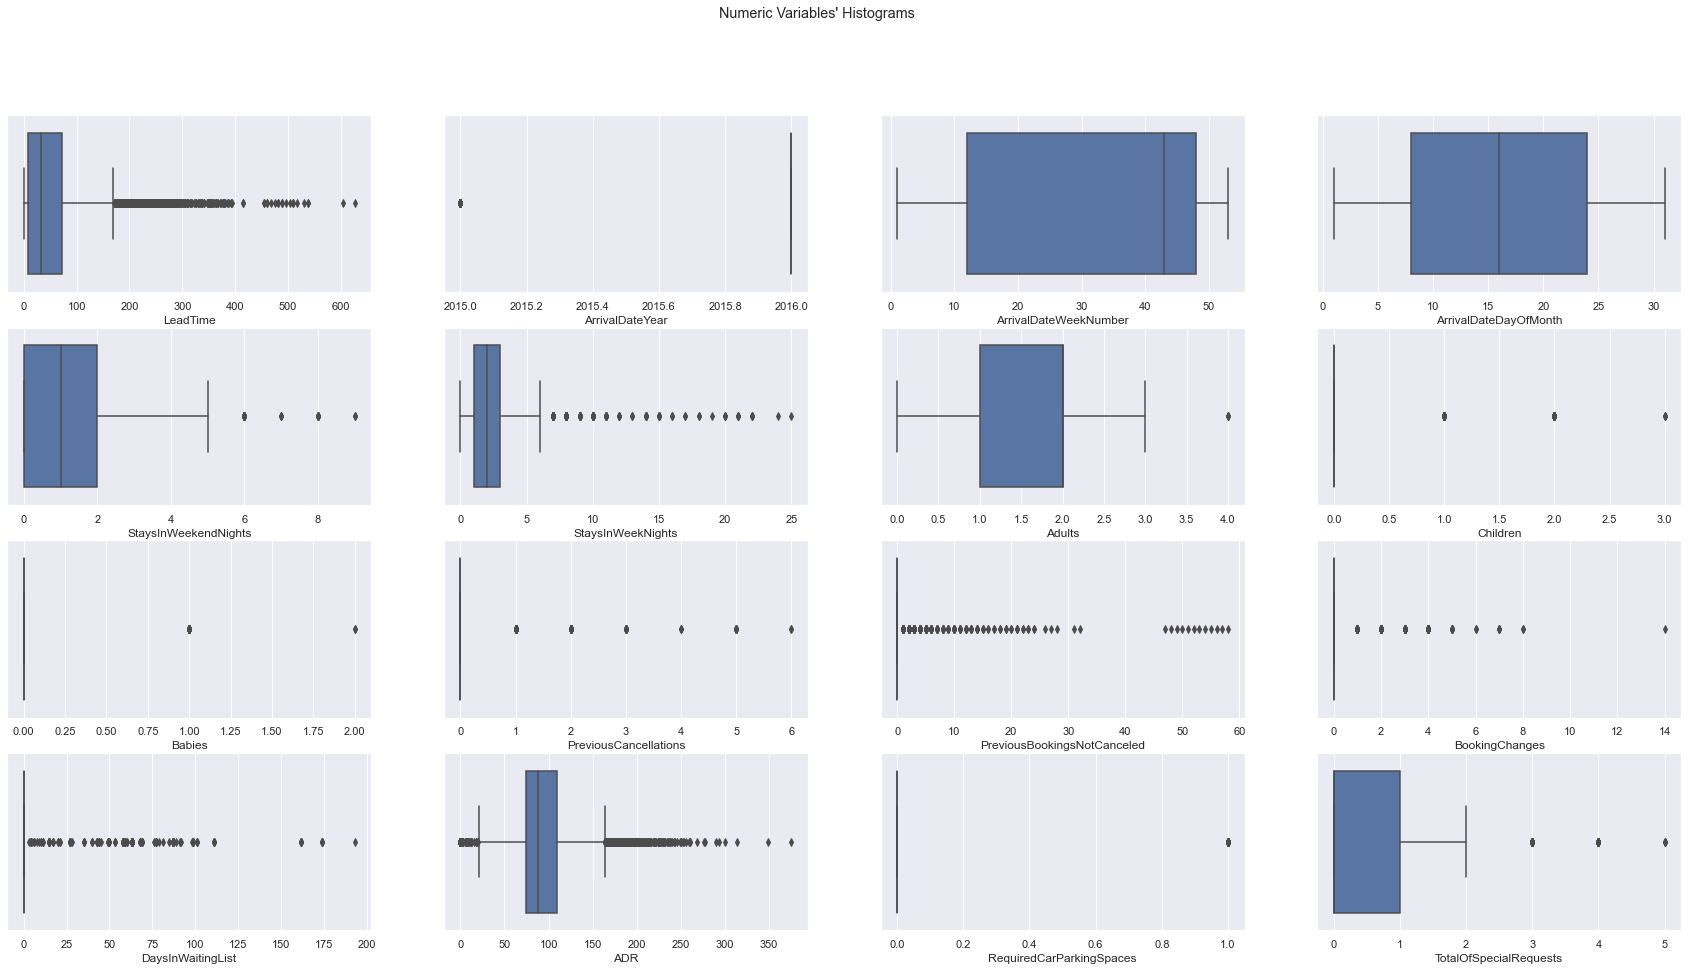

In [16]:
boxplot(x_train_low)

#### Incoherences

In [338]:
data.describe().T

count         mean        std     min     25%  \
IsCanceled                   53428.0     0.300386   0.458430     0.0     0.0   
LeadTime                     53428.0    77.678521  82.113381     0.0    14.0   
ArrivalDateYear              53428.0  2016.253968   0.659292  2015.0  2016.0   
ArrivalDateWeekNumber        53428.0    26.637606  13.586280     1.0    16.0   
ArrivalDateDayOfMonth        53428.0    15.755166   8.801575     1.0     8.0   
StaysInWeekendNights         53428.0     0.872164   0.913756     0.0     0.0   
StaysInWeekNights            53428.0     2.274444   1.618630     0.0     1.0   
Adults                       53428.0     1.876338   0.544292     0.0     2.0   
Children                     53424.0     0.131851   0.442176     0.0     0.0   
Babies                       53428.0     0.007337   0.102665     0.0     0.0   
IsRepeatedGuest              53428.0     0.031968   0.175917     0.0     0.0   
PreviousCancellations        53428.0     0.035768   0.372784     0.0     0.0   
PreviousBookingsNotCanceled  53428.0     0.191491   2.038798     0.0     0.0   
BookingChanges               53428.0     0.246369   0.704063     0.0     0.0   
DaysInWaitingList            53428.0     1.020233  11.901703     0.0     0.0   
ADR                          53428.0   110.985944  48.062518     0.0    84.0   
RequiredCarParkingSpaces     53428.0     0.035618   0.186244     0.0     0.0   
TotalOfSpecialRequests       53428.0     0.710994   0.833540     0.0     0.0   

                                50%     75%     max  
IsCanceled                      0.0     1.0     1.0  
LeadTime                       50.0   118.0   629.0  
ArrivalDateYear              2016.0  2017.0  2017.0  
ArrivalDateWeekNumber          27.0    37.0    53.0  
ArrivalDateDayOfMonth          16.0    23.0    31.0  
StaysInWeekendNights            1.0     2.0    16.0  
StaysInWeekNights               2.0     3.0    41.0  
Adults                          2.0     2.0     4.0  
Children                        0.0     0.0     3.0  
Babies                          0.0     0.0    10.0  
IsRepeatedGuest                 0.0     0.0     1.0  
PreviousCancellations           0.0     0.0    21.0  
PreviousBookingsNotCanceled     0.0     0.0    72.0  
BookingChanges                  0.0     0.0    21.0  
DaysInWaitingList               0.0     0.0   391.0  
ADR                           105.3   134.0  5400.0  
RequiredCarParkingSpaces        0.0     0.0     3.0  
TotalOfSpecialRequests          1.0     1.0     5.0

In [15]:
def incoherences (data1):
    data = data1.copy()
    inco1 = data[((data['Adults'] == 0) & (data['Children'] == 0) & (data['Babies'] == 0))]
    inco2 = data[(data['IsRepeatedGuest'] >= 1) & (data['PreviousBookingsNotCanceled'] == 0) & (data['PreviousCancellations'] == 0)]
    inco3 = data[(data['Adults'] == 0) & (data['Children'] == 0) & (data['Babies'] != 0)]
    incofinal = pd.concat([inco1,inco2,inco3])
    final = data[~data.index.isin(incofinal.index)]
    return final

In [17]:
data[(data['ADR']==0)]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0               0         6             2015             July   
134             1         0             2015             July   
139             0         0             2015             July   
166             0        18             2015             July   
196             0        12             2015             July   
...           ...       ...              ...              ...   
78571           0        78             2017           August   
78702           0         1             2017           August   
78903           0         1             2017           August   
79042           0       518             2017           August   
79064           0         0             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                         27                      1                     0   
134                       29                     15                     0   
139                       29                     15                     2   
166                       29                     18                     1   
196                       29                     18                     2   
...                      ...                    ...                   ...   
78571                     34                     23                     0   
78702                     34                     24                     0   
78903                     35                     27                     0   
79042                     34                     26                     2   
79064                     35                     29                     0   

       StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                      2       1       0.0  ...  No Deposit                 6   
134                    1       2       0.0  ...  No Deposit              NULL   
139                    5       2       0.0  ...  No Deposit              NULL   
166                    1       1       0.0  ...  No Deposit                 1   
196                    2       1       0.0  ...  No Deposit                 1   
...                  ...     ...       ...  ...              ...          ...   
78571                  0       1       0.0  ...  No Deposit                98   
78702                  1       2       1.0  ...  No Deposit              NULL   
78903                  0       2       0.0  ...  No Deposit              NULL   
79042                  1       1       0.0  ...  No Deposit               229   
79064                  1       1       0.0  ...  No Deposit              NULL   

           Company DaysInWaitingList     CustomerType  ADR  \
0             NULL                 0        Transient  0.0   
134           NULL                 0        Transient  0.0   
139           NULL                 0        Transient  0.0   
166           NULL                 0  Transient-Party  0.0   
196           NULL                 0  Transient-Party  0.0   
...            ...               ...              ...  ...   
78571         NULL                 0  Transient-Party  0.0   
78702         NULL                 0        Transient  0.0   
78903         NULL                 0        Transient  0.0   
79042         NULL                 0  Transient-Party  0.0   
79064           72                 0        Transient  0.0   

       RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
0                             0                       0         Check-Out   
134                           0                       0          Canceled   
139                           0                       0         Check-Out   
166                           0                       0         Check-Out   
196                           0                       0         Check-Out   
...                         ...                     ...               ...   
78571                         0             

In [16]:
data[(data['IsRepeatedGuest'] >= 1) & (data['PreviousBookingsNotCanceled'] == 0) & (data['PreviousCancellations'] == 0)]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
36264           0         0             2015             July   
36943           0         0             2015           August   
36944           0         0             2015           August   
37110           0         0             2015        September   
37118           1         0             2015        September   
...           ...       ...              ...              ...   
77235           1         0             2017           August   
77641           0         0             2017           August   
77901           0         0             2017           August   
77969           0         0             2017           August   
79010           0         0             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
36264                     29                     16                     0   
36943                     35                     27                     0   
36944                     35                     27                     0   
37110                     37                      9                     0   
37118                     37                     10                     0   
...                      ...                    ...                   ...   
77235                     31                      2                     0   
77641                     32                      8                     0   
77901                     32                     12                     0   
77969                     33                     14                     0   
79010                     35                     29                     0   

       StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
36264                  0       2       0.0  ...  No Deposit                19   
36943                  1       0       0.0  ...  No Deposit              NULL   
36944                  1       2       2.0  ...  No Deposit              NULL   
37110                  0       1       0.0  ...  No Deposit              NULL   
37118                  1       2       0.0  ...  No Deposit                71   
...                  ...     ...       ...  ...              ...          ...   
77235                  2       1       0.0  ...  No Deposit              NULL   
77641                  0       2       0.0  ...  No Deposit               262   
77901                  1       2       0.0  ...  No Deposit                14   
77969                  0       2       0.0  ...  No Deposit              NULL   
79010                  1       2       3.0  ...  No Deposit               229   

           Company DaysInWaitingList CustomerType    ADR  \
36264         NULL                 0    Transient    0.0   
36943         NULL                 0     Contract    0.0   
36944         NULL                 0    Transient  156.0   
37110           40                 0    Transient    0.0   
37118         NULL                 0        Group  152.0   
...            ...               ...          ...    ...   
77235           40                 0    Transient   65.0   
77641         NULL                 0    Transient    0.0   
77901         NULL                 0    Transient  240.0   
77969         NULL                 0    Transient    0.0   
79010         NULL                 0        Group  270.0   

       RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
36264                         0                       0         Check-Out   
36943                         0                       2         Check-Out   
36944                         0                       2         Check-Out   
37110                         0                       0         Check-Out   
37118                         0                       0           No-Show   
...                         ...                     ...               ...   
77235                         0                       1           No

In [340]:
inco = data[(data['Adults'] == 0) & (data['Children'] == 0) & (data['Babies'] == 0)]
inco

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
332             0       132             2015             July   
862             0         0             2015           August   
960             0         0             2015           August   
996             0         0             2015           August   
2392            1         1             2015        September   
...           ...       ...              ...              ...   
74969           0       107             2017             June   
75031           0         1             2017             June   
76191           0        44             2017             July   
76474           0         2             2017             July   
77027           0       170             2017             July   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
332                       30                     23                     2   
862                       33                      9                     2   
960                       33                     10                     9   
996                       33                     11                     0   
2392                      37                      6                     2   
...                      ...                    ...                   ...   
74969                     26                     27                     0   
75031                     26                     30                     0   
76191                     28                     15                     1   
76474                     28                     15                     2   
77027                     30                     27                     0   

       StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
332                    5       0       0.0  ...  No Deposit                 1   
862                    0       0       0.0  ...  No Deposit                 9   
960                   20       0       0.0  ...  No Deposit              NULL   
996                    4       0       0.0  ...  No Deposit              NULL   
2392                   0       0       0.0  ...  No Deposit                 1   
...                  ...     ...       ...  ...              ...          ...   
74969                  3       0       0.0  ...  No Deposit                 7   
75031                  1       0       0.0  ...  No Deposit              NULL   
76191                  1       0       0.0  ...  No Deposit               425   
76474                  5       0       0.0  ...  No Deposit                 9   
77027                  2       0       0.0  ...  No Deposit                52   

           Company DaysInWaitingList     CustomerType     ADR  \
332           NULL                 0  Transient-Party    0.00   
862           NULL                 0         Contract    0.00   
960             47                 0        Transient    0.00   
996             49                 0  Transient-Party    0.00   
2392          NULL                 0  Transient-Party    0.00   
...            ...               ...              ...     ...   
74969         NULL                 0        Transient  100.80   
75031         NULL                 0        Transient    0.00   
76191         NULL                 0        Transient   73.80   
76474         NULL                 0  Transient-Party   22.86   
77027         NULL                 0        Transient    0.00   

       RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
332                           0                       0         Check-Out   
862                           0                       0         Check-Out   
960                           0                       0         Check-Out   
996                           0                       1         Check-Out   
2392                          0                       0          Canceled   
...                         ...                     ...               ...   
74969   

In [16]:
data_inco = incoherences(data.copy())

x_train_high = x_train_high.loc[x_train_high.index.isin(data_inco.index)]
x_val_high = x_val_high.loc[x_val_high.index.isin(data_inco.index)]

x_train_low = x_train_low.loc[x_train_low.index.isin(data_inco.index)]
x_val_low = x_val_low.loc[x_val_low.index.isin(data_inco.index)]

### Data Pre-Processing

#### Feature engineering

In [17]:
def feat_eng (data1):
    data = data1.copy()
    data['infants'] = data['Children'] + data['Babies']
    

    data['ArrivalDate'] = pd.to_datetime(data['ArrivalDateYear'].astype(str) + '-' + data['ArrivalDateMonth'].astype(str) + '-' + data['ArrivalDateDayOfMonth'].astype(str))
    from datetime import timedelta
    res_date = []
    for i,j in enumerate(data['LeadTime']):

        value = data['ArrivalDate'].iloc[i] - timedelta(days=j)
        res_date.append(value)

    data['ReservationDate'] =res_date

    data['DaysBet'] = pd.to_datetime(data['ReservationStatusDate']) - data['ReservationDate']

    daysbet = data['DaysBet'].astype(str).str.split(' ')
    bet = []
    for i in daysbet:
        bet.append(i[0])

    data['DaysBet'] = bet
    data['DaysBet'] = data['DaysBet'].astype(int)
    data.loc[data['ReservationStatus']=='Check-Out','DaysBet'] = data.loc[data['ReservationStatus']=='Check-Out','LeadTime']
    
    data['GroupSize'] = data['Adults'] + data['Children'] + data['Babies']
    data['TotalDays'] = data['StaysInWeekNights'] + data['StaysInWeekendNights']
    data['TotalValue'] = data['ADR'] * data['TotalDays']
    data.loc[data['GroupSize']>0,'ValuePerson'] = (data['TotalValue']/data['GroupSize'])
    data['ValuePerson'].fillna(value=0,inplace=True)
    
    
    data['Year_Month'] = data['ArrivalDateYear'].astype(str) + '_' + data['ArrivalDateWeekNumber'].astype(str)
    
    

    for i,ii,iii in zip(data.groupby(['Year_Month','DistributionChannel','ReservedRoomType'])['ADR'].mean().index, data.groupby(['Year_Month','DistributionChannel','ReservedRoomType'])['ADR'].quantile(0.75).values,data.groupby(['Year_Month','DistributionChannel','ReservedRoomType'])['LeadTime'].mean().values ):
        adr_temp = data.loc[(data['Year_Month']==i[0]) & (data['DistributionChannel']==i[1]) & (data['ReservedRoomType']==i[2]),'ADR'].values
        lead = data.loc[(data['Year_Month']==i[0]) & (data['DistributionChannel']==i[1]) & (data['ReservedRoomType']==i[2]),'LeadTime'].values
        data.loc[(data['Year_Month']==i[0]) & (data['DistributionChannel']==i[1]) & (data['ReservedRoomType']==i[2]),'ADR_ADJ'] = adr_temp/ii
        data.loc[(data['Year_Month']==i[0]) & (data['DistributionChannel']==i[1]) & (data['ReservedRoomType']==i[2]),'LT_ADJ'] = lead/iii
        
    data['ADR_ADJ'].fillna(value=0,inplace=True)
    data['LT_ADJ'].fillna(value=0,inplace=True)
    data.drop(columns=['ArrivalDateYear','ArrivalDateMonth','ArrivalDateDayOfMonth','ArrivalDateWeekNumber'],inplace=True)
    
    
    return(data)

In [53]:
import datetime
data.reset_index(inplace=True)
data['AMonth'] = pd.Series()
data['AYear'] = pd.Series()
data['Day'] = pd.Series()

for i,j in enumerate(data['ArrivalDateMonth']):
    datetime_object = datetime.datetime.strptime(j, "%B")
    data['AMonth'][i] = datetime_object.month
for i,j in enumerate(data['ArrivalDateYear']):
    yeardt = datetime.datetime.strptime(str(j), "%Y")
    data['AYear'][i] = yeardt.year
for i,j in enumerate(data['ArrivalDateDayOfMonth']):
    daydt = datetime.datetime.strptime(str(j), "%d")
    data['ADay'][i] = daydt.day

In [54]:
data['ArrivalDate'] = pd.to_datetime(data[['Year','Month','Day']])

# arrivaldate - leadtime = reservation date
# quantos dias entre a reservation e o cancelamento/check-out

In [56]:
from datetime import timedelta
res_date = []
for i,j in enumerate(data['LeadTime']):
    
    value = data['ArrivalDate'].iloc[i] - timedelta(days=j)
    res_date.append(value)
    
data['ReservationDate'] =res_date

data['DaysBet'] = pd.to_datetime(data['ReservationStatusDate']) - data['ReservationDate']

daysbet = data['DaysBet'].astype(str).str.split(' ')
bet = []
for i in daysbet:
    bet.append(i[0])

data['DaysBet'] = bet
data['DaysBet'] = data['DaysBet'].astype(int)

In [91]:
#data['Year_week'] = data['ArrivalDateYear'].astype(str) + '_' + data['ArrivalDateWeekNumber'].astype(str)
data['Year_Month'] = data['ArrivalDateYear'].astype(str) + '_' + data['ArrivalDateMonth'].astype(str)

for i,ii,iii in zip(data.groupby('Year_Month')['ADR'].mean().index, data.groupby('Year_Month')['ADR'].mean().values,data.groupby('Year_Month')['LeadTime'].mean().values ):
    adr_temp = data.loc[data['Year_Month']==i,'ADR'].values
    lead = data.loc[data['Year_Month']==i,'LeadTime'].values
    data.loc[data['Year_Month']==i,'ADR_ADJ'] = adr_temp/ii
    data.loc[data['Year_Month']==i,'LT_ADJ'] = lead/iii

In [58]:
data1 = feat_eng(data.copy())

In [18]:
def drop (data1):
    data = data1.copy()
#     data.set_index('index',inplace=True)
#     data.drop(columns=[ 'Day',  'Month', 'Year','Year_Month','ArrivalDate'
#                       ,'ReservationStatus','ReservationStatusDate'],inplace=True)
    return(data)

#### Applying ft engineer

In [19]:
x_train_high = drop(feat_eng(x_train_high.copy()))
x_train_low = drop(feat_eng(x_train_low.copy()))
x_val_high = drop(feat_eng(x_val_high.copy()))
x_val_low = drop(feat_eng(x_val_low.copy()))
test_high = drop(feat_eng(test_high.copy()))
test_low = drop(feat_eng(test_low.copy()))

In [20]:
y_train_high = y_train_high.loc[y_train_high.index.isin(x_train_high.index)].copy()
y_val_high = y_val_high.loc[y_val_high.index.isin(x_val_high.index)].copy()
y_train_low = y_train_low.loc[y_train_low.index.isin(x_train_low.index)].copy()
y_val_low = y_val_low.loc[y_val_low.index.isin(x_val_low.index)].copy()

test_high = data.loc[(data['ArrivalDateMonth'].isin(['April','May','June','July','August','September']) )& (data['ArrivalDateYear']==2017) ].copy()
test_low = data.loc[(data['ArrivalDateMonth'].isin(['March','January','February','October','November','December']) )& (data['ArrivalDateYear']==2017) ].copy()

test_high = drop(feat_eng(test_high.copy()))
test_high['Country'].fillna(value = test_high['Country'].mode(),inplace=True)
test_low = drop(feat_eng(test_low.copy()))

In [21]:
def oneHotEncoder (data):
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
    non_metric_features =list(data.select_dtypes(exclude=np.number).set_index(data.index).columns)
    ohc = OneHotEncoder(sparse=False)
    ohc_feat = ohc.fit_transform(data[non_metric_features])
    names = ohc.get_feature_names()
    
    ohc_cat = pd.DataFrame(data =ohc_feat ,columns = names, index = data.index)
    for i in ohc_cat.columns:
        ohc_cat[i] = ohc_cat.astype(bool)
    
    return(ohc_cat)

In [22]:
x_train_high = pd.concat([x_train_high,oneHotEncoder(x_train_high[['MarketSegment','DistributionChannel','CustomerType','Meal']])],axis=1)
x_train_low = pd.concat([x_train_low,oneHotEncoder(x_train_low[['MarketSegment','DistributionChannel','CustomerType','Meal']])],axis=1)
test_high = pd.concat([test_high,oneHotEncoder(test_high[['MarketSegment','DistributionChannel','CustomerType','Meal']])],axis=1)
test_low = pd.concat([test_low,oneHotEncoder(test_low[['MarketSegment','DistributionChannel','CustomerType','Meal']])],axis=1)

#### Data Standartization

In [23]:
def full_standardize (x_train,x_val,test):
    metric_features = x_train.select_dtypes(include=np.number).columns
    cat_features1 = x_train.select_dtypes(exclude=np.number).columns
    cat_features2 = x_val.select_dtypes(exclude=np.number).columns
    cat_features3 = test.select_dtypes(exclude=np.number).columns
    x = pd.DataFrame(x_train[metric_features])
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(x)
    x_train_scaled = scaler.transform(x) # this will return an array
    # Convert the array to a pandas dataframe
    x_train_scaled = pd.DataFrame(x_train_scaled, columns = x.columns).set_index(x.index)
    x_train_scaled = pd.concat([x_train_scaled, x_train[cat_features1]],axis=1 )
    
    x_val_scaled = pd.DataFrame(scaler.transform(x_val[metric_features]), index = x_val.index,columns=metric_features)
    x_val_scaled = pd.concat([x_val_scaled, x_val[cat_features2]],axis=1 )
    test_scaled = pd.DataFrame(scaler.transform(test[metric_features]), index = test.index,columns=metric_features)
    test_scaled = pd.concat([test_scaled, test[cat_features3]],axis=1 )
    scaled_data = [x_train_scaled,x_val_scaled,test_scaled]
    return(scaled_data)

In [24]:
X_train_high,X_val_high,Test_high = full_standardize(x_train_high,x_val_high,test_high)
X_train_low,X_val_low,Test_low = full_standardize(x_train_low,x_val_low,test_low)


Y_test_high = test_high['IsCanceled'].copy()
Y_test_low = test_low['IsCanceled'].copy()

#### Feature Selection

In [114]:
#this RFE only works with categorical varisbles 
def RFE (x,y, n_best, model):
    from sklearn.feature_selection import RFE
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    X_train, X_validation,y_train, y_validation = train_test_split(x,y,
                                                               train_size = 0.7, 
                                                               shuffle = True, 
                                                               stratify = y,random_state=0)
    threshold = n_best # the number of most relevant features
    
    model = model
    ft = model.fit(X_train,y_train)
        
    print(f'The validation score is {ft.score(X_validation,y_validation)}')
    print(f'The train score is {ft.score(X_train,y_train)}')
    selector = RFE(estimator=model, n_features_to_select=n_best)
    selector_x = selector.fit_transform(X_train,y_train)
    selector_ind = selector.get_support()
    selector.ranking_
    selected_features = pd.Series(selector.support_, index = X_train.columns)
    selected_features = selected_features.sort_values(ascending=False).iloc[:n_best]
    
    return(selected_features)

In [115]:
def lasso_selection (x, y):
    from sklearn.linear_model import Lasso
    reg = Lasso(alpha=0.005,random_state=0)
    reg.fit(x,y)
    coef = pd.Series(reg.coef_, index = x.columns)
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
    return(coef.loc[abs(coef.values)>0.00])

def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

#### Low Season

#### Lasso 

In [126]:
lasso_sub = lasso_selection(X_train_low.select_dtypes(exclude=np.object0).drop(columns=['ArrivalDate','ReservationDate']),y_train_low)

Lasso picked 17 variables and eliminated the other 24 variables


<AxesSubplot:>

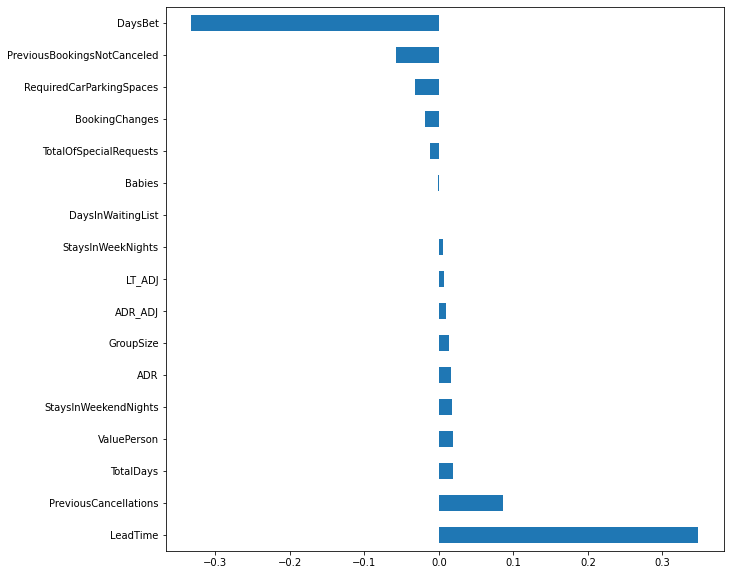

In [122]:
lasso_sub.sort_values(ascending=False).plot.barh(figsize=(10,10))

#### RFE

In [123]:
rfe_low = RFE(X_train_low.select_dtypes(exclude=np.object0).drop(columns=['ArrivalDate','ReservationDate']),y_train_low, 15,RandomForestClassifier(max_depth=4,random_state=10))

The validation score is 0.7922077922077922
The train score is 0.7972293901942143


#### High Season

#### Lasso

In [125]:
lasso_sub_high = lasso_selection(X_train_high.select_dtypes(exclude=np.object0).drop(columns=['ArrivalDate','ReservationDate']),y_train_high)

Lasso picked 14 variables and eliminated the other 29 variables


<AxesSubplot:>

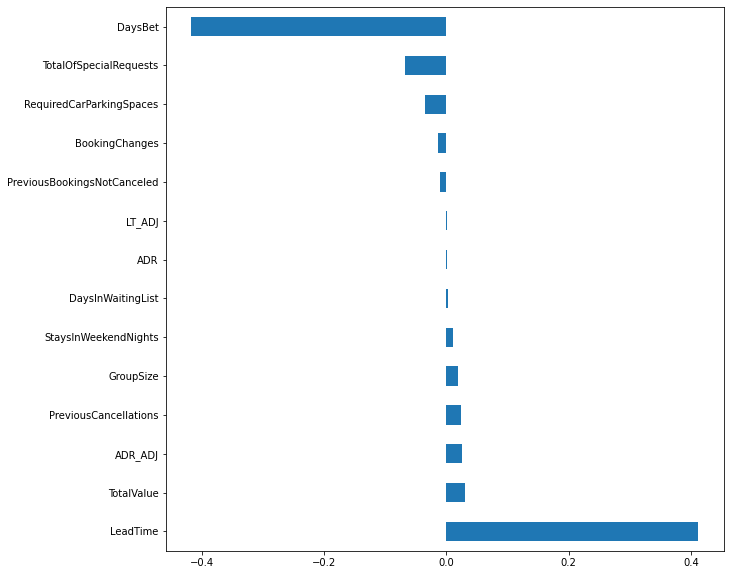

In [127]:
lasso_sub_high.sort_values(ascending=False).plot.barh(figsize=(10,10))

#### RFE

In [128]:
rfe_high = RFE(X_train_high.select_dtypes(exclude=np.object0).drop(columns=['ArrivalDate','ReservationDate']),y_train_high, 15,RandomForestClassifier(max_depth=4,random_state=10))

The validation score is 0.7669312169312169
The train score is 0.7674946126800499


In [132]:
rfe_subset_H = rfe_high.index
rfe_subset_L = rfe_low.index
lasso_subset_H = lasso_sub_high.index
lasso_subset_L = lasso_sub.index

### Correlations

In [219]:
def cor_heat_map (corr):
    plt.figure(figsize = (30, 30))
    sns.heatmap(corr, vmax = 1, vmin=-1, linewidths = 0.1,
               annot = True, annot_kws = {"size": 10}, square = True,cmap='viridis')
    plt.show()

#### Correlated features:
- LeadTime - LT_ADJ 
- DaysBet - LeadTime 
- TotalDays - TotalValue 

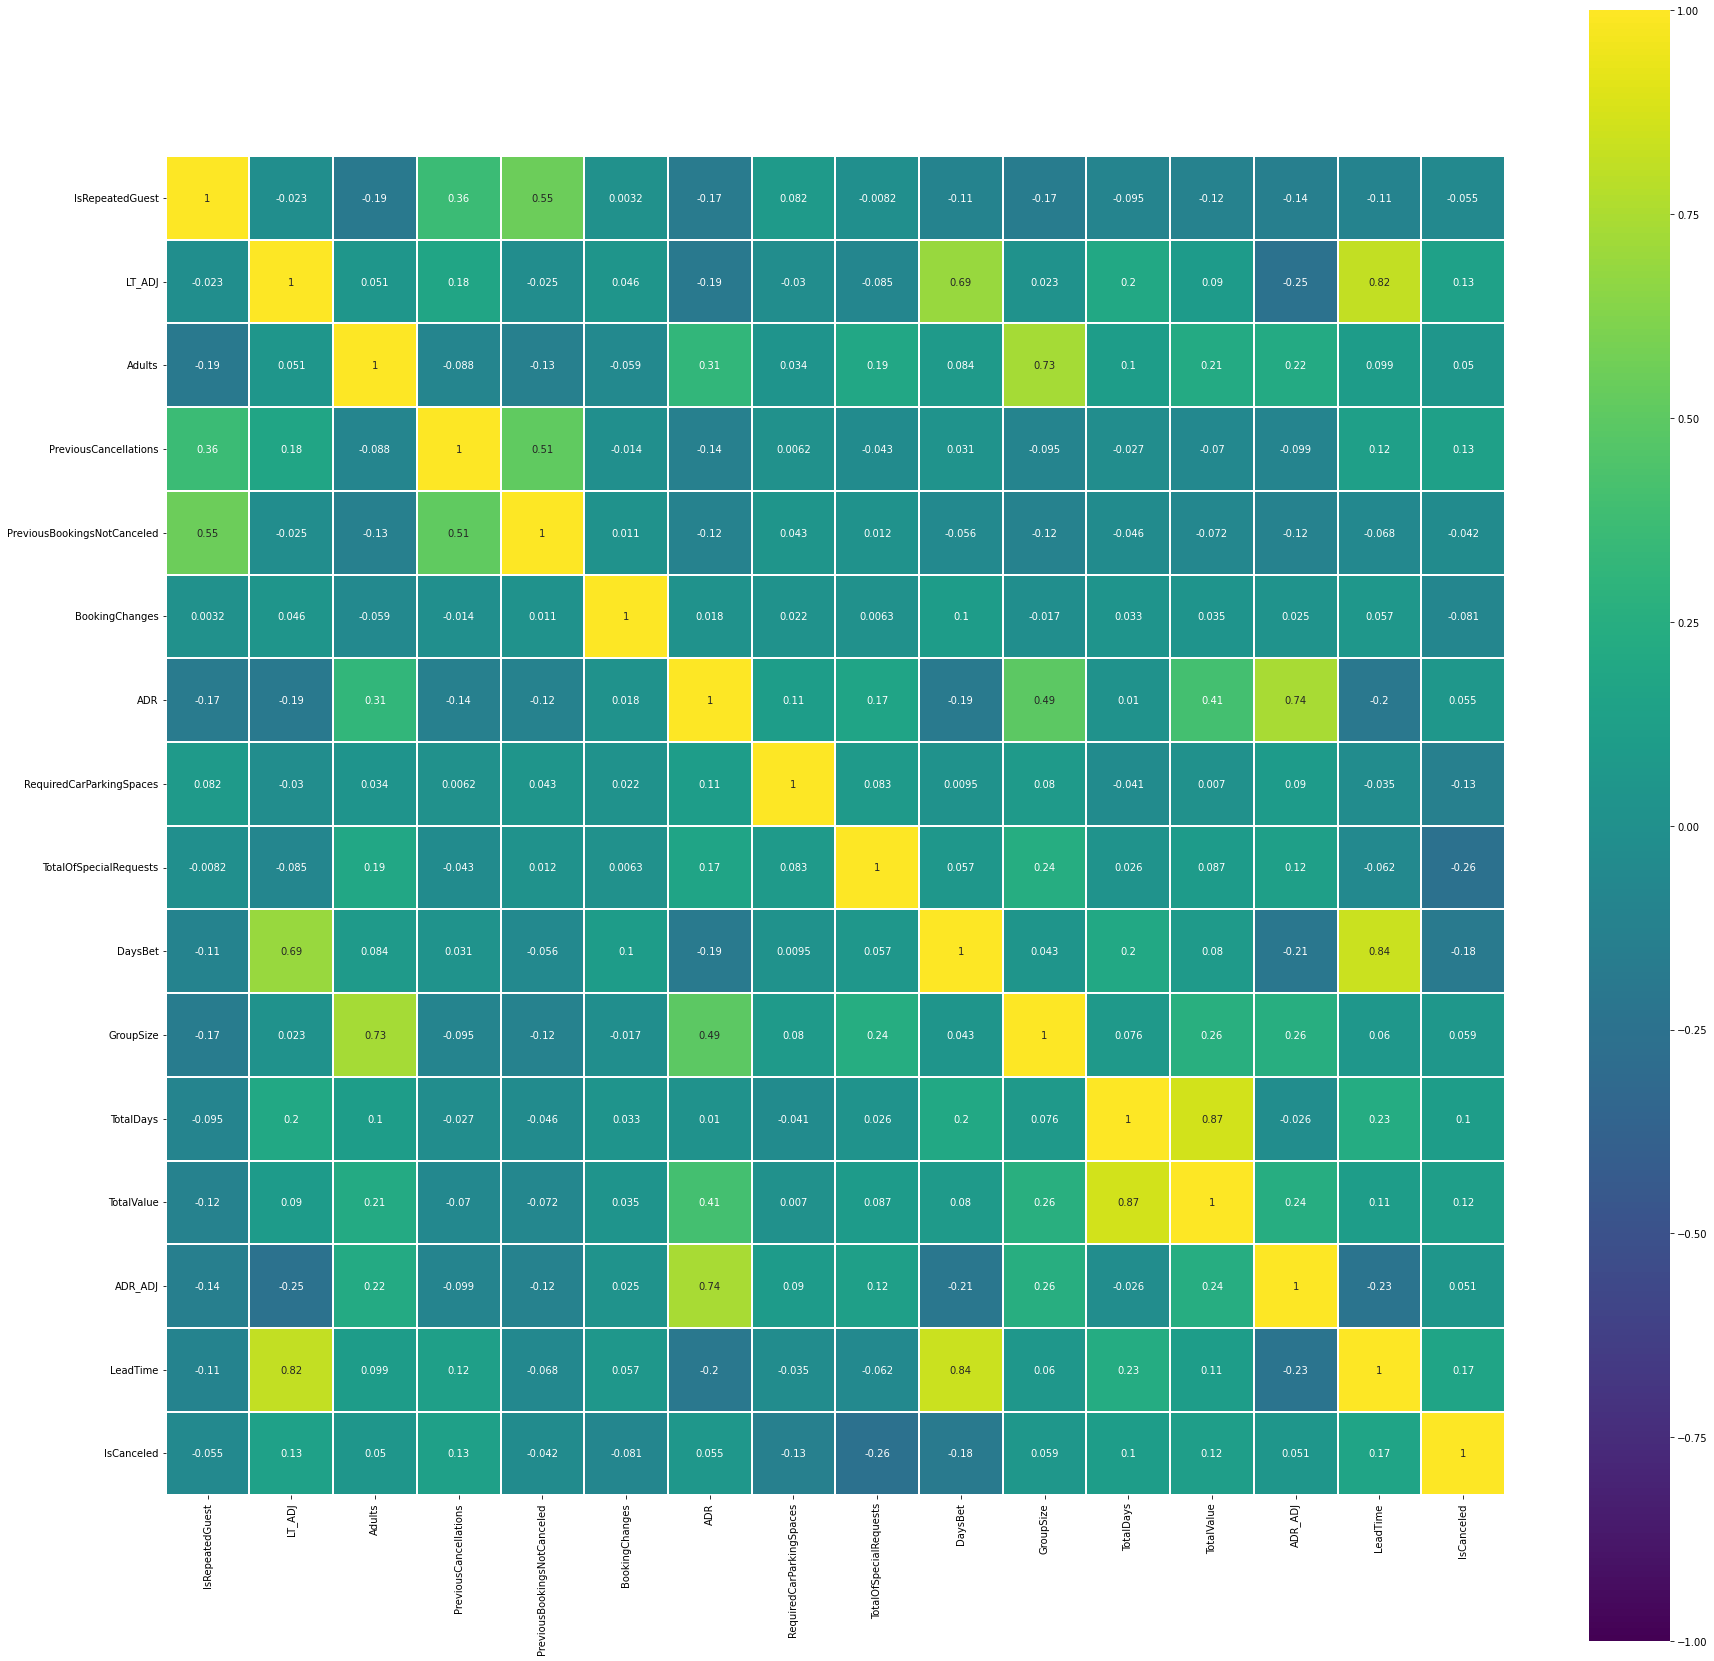

In [136]:
cor_heat_map(pd.concat([X_train_high[rfe_subset_H],y_train_high],axis=1).corr())

#### Correlated features:
- TotalDays - StaysinWeekNights
- StaysinWeekNights - TotalValue 
- TotalValue - TotalDays
- TotalValue - ValuePerson
- DaysBet - LeadTime

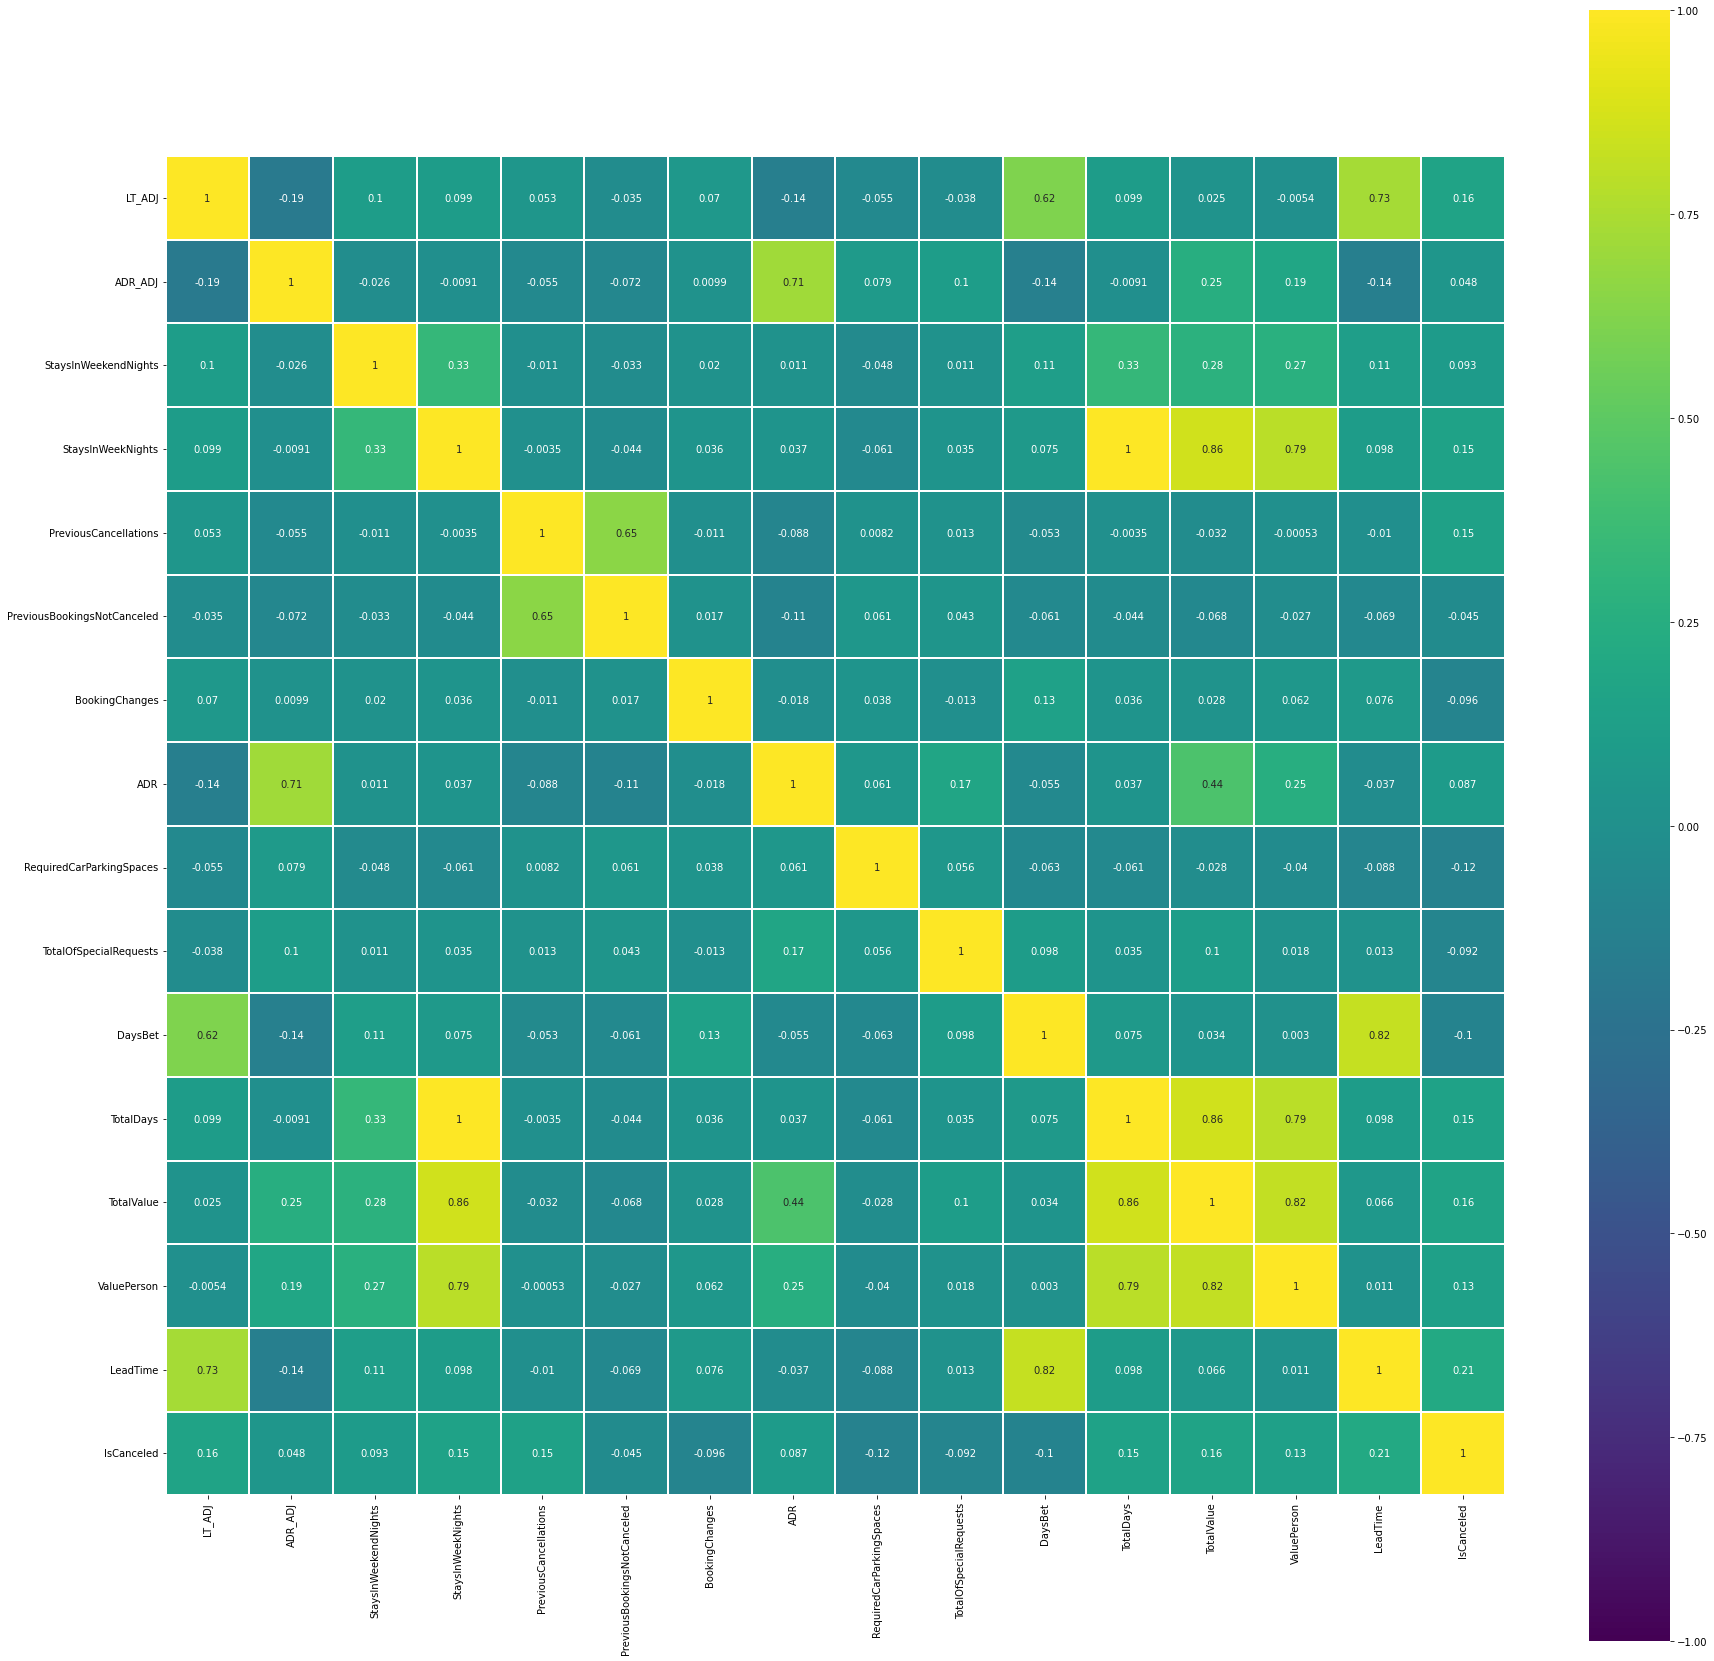

In [137]:
cor_heat_map(pd.concat([X_train_low[rfe_subset_L],y_train_low],axis=1).corr())

#### Create Subsets

In [25]:
subset_high = ['IsRepeatedGuest', 'LT_ADJ', 'Adults', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'DaysBet',
       'GroupSize', 'TotalDays', 'ADR_ADJ']

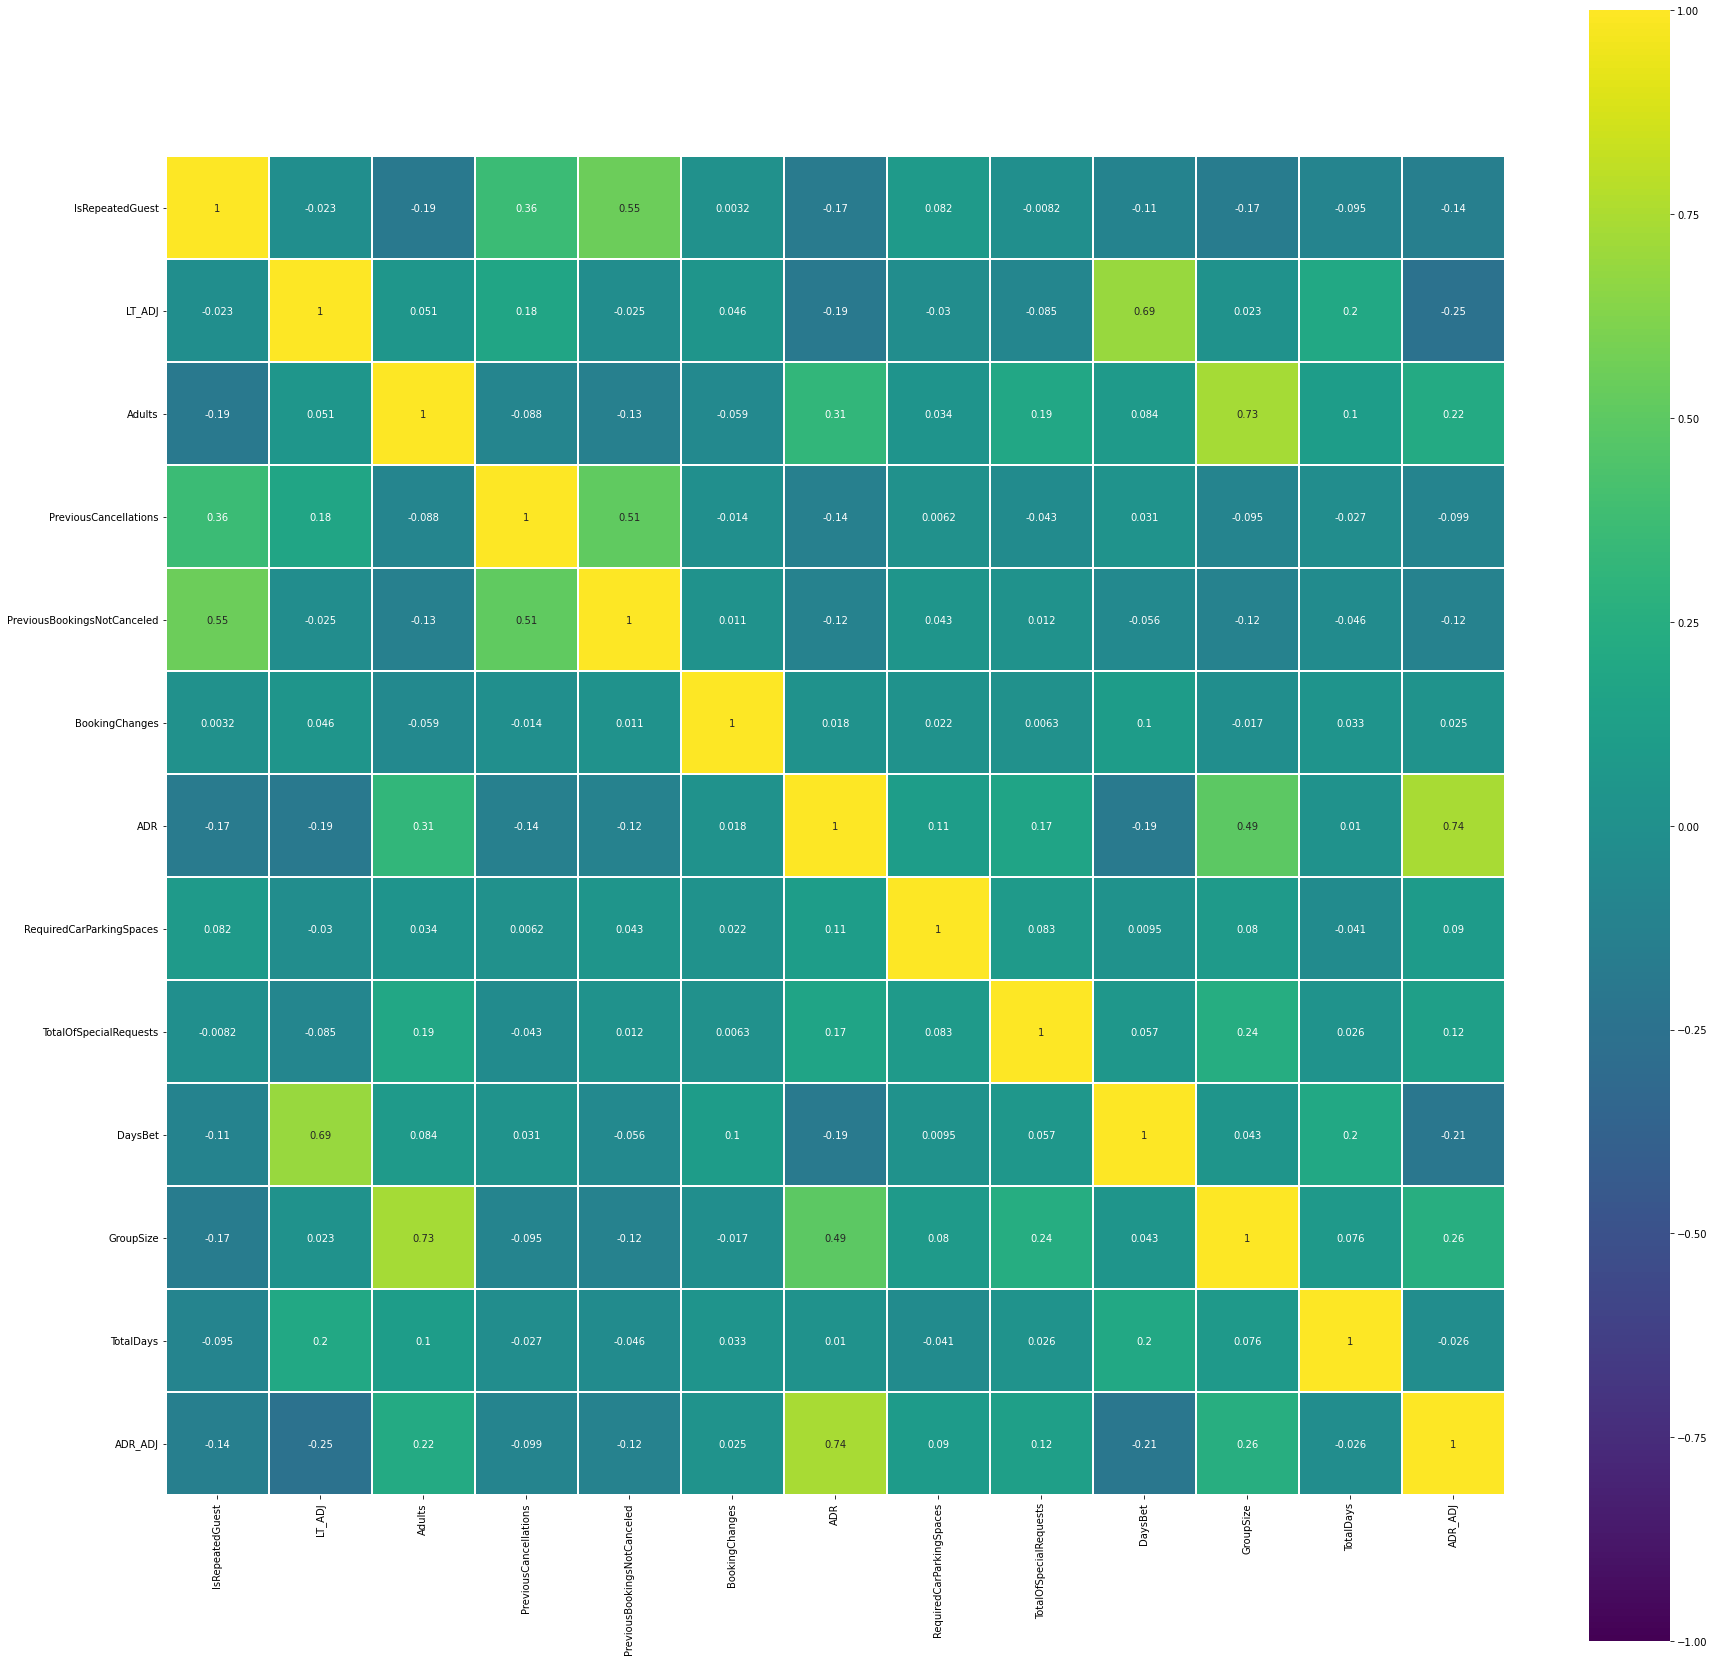

In [140]:
cor_heat_map(X_train_high[subset_high].corr())

In [26]:
subset_low = ['LT_ADJ', 'ADR_ADJ', 'StaysInWeekendNights',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'DaysBet', 'TotalValue']

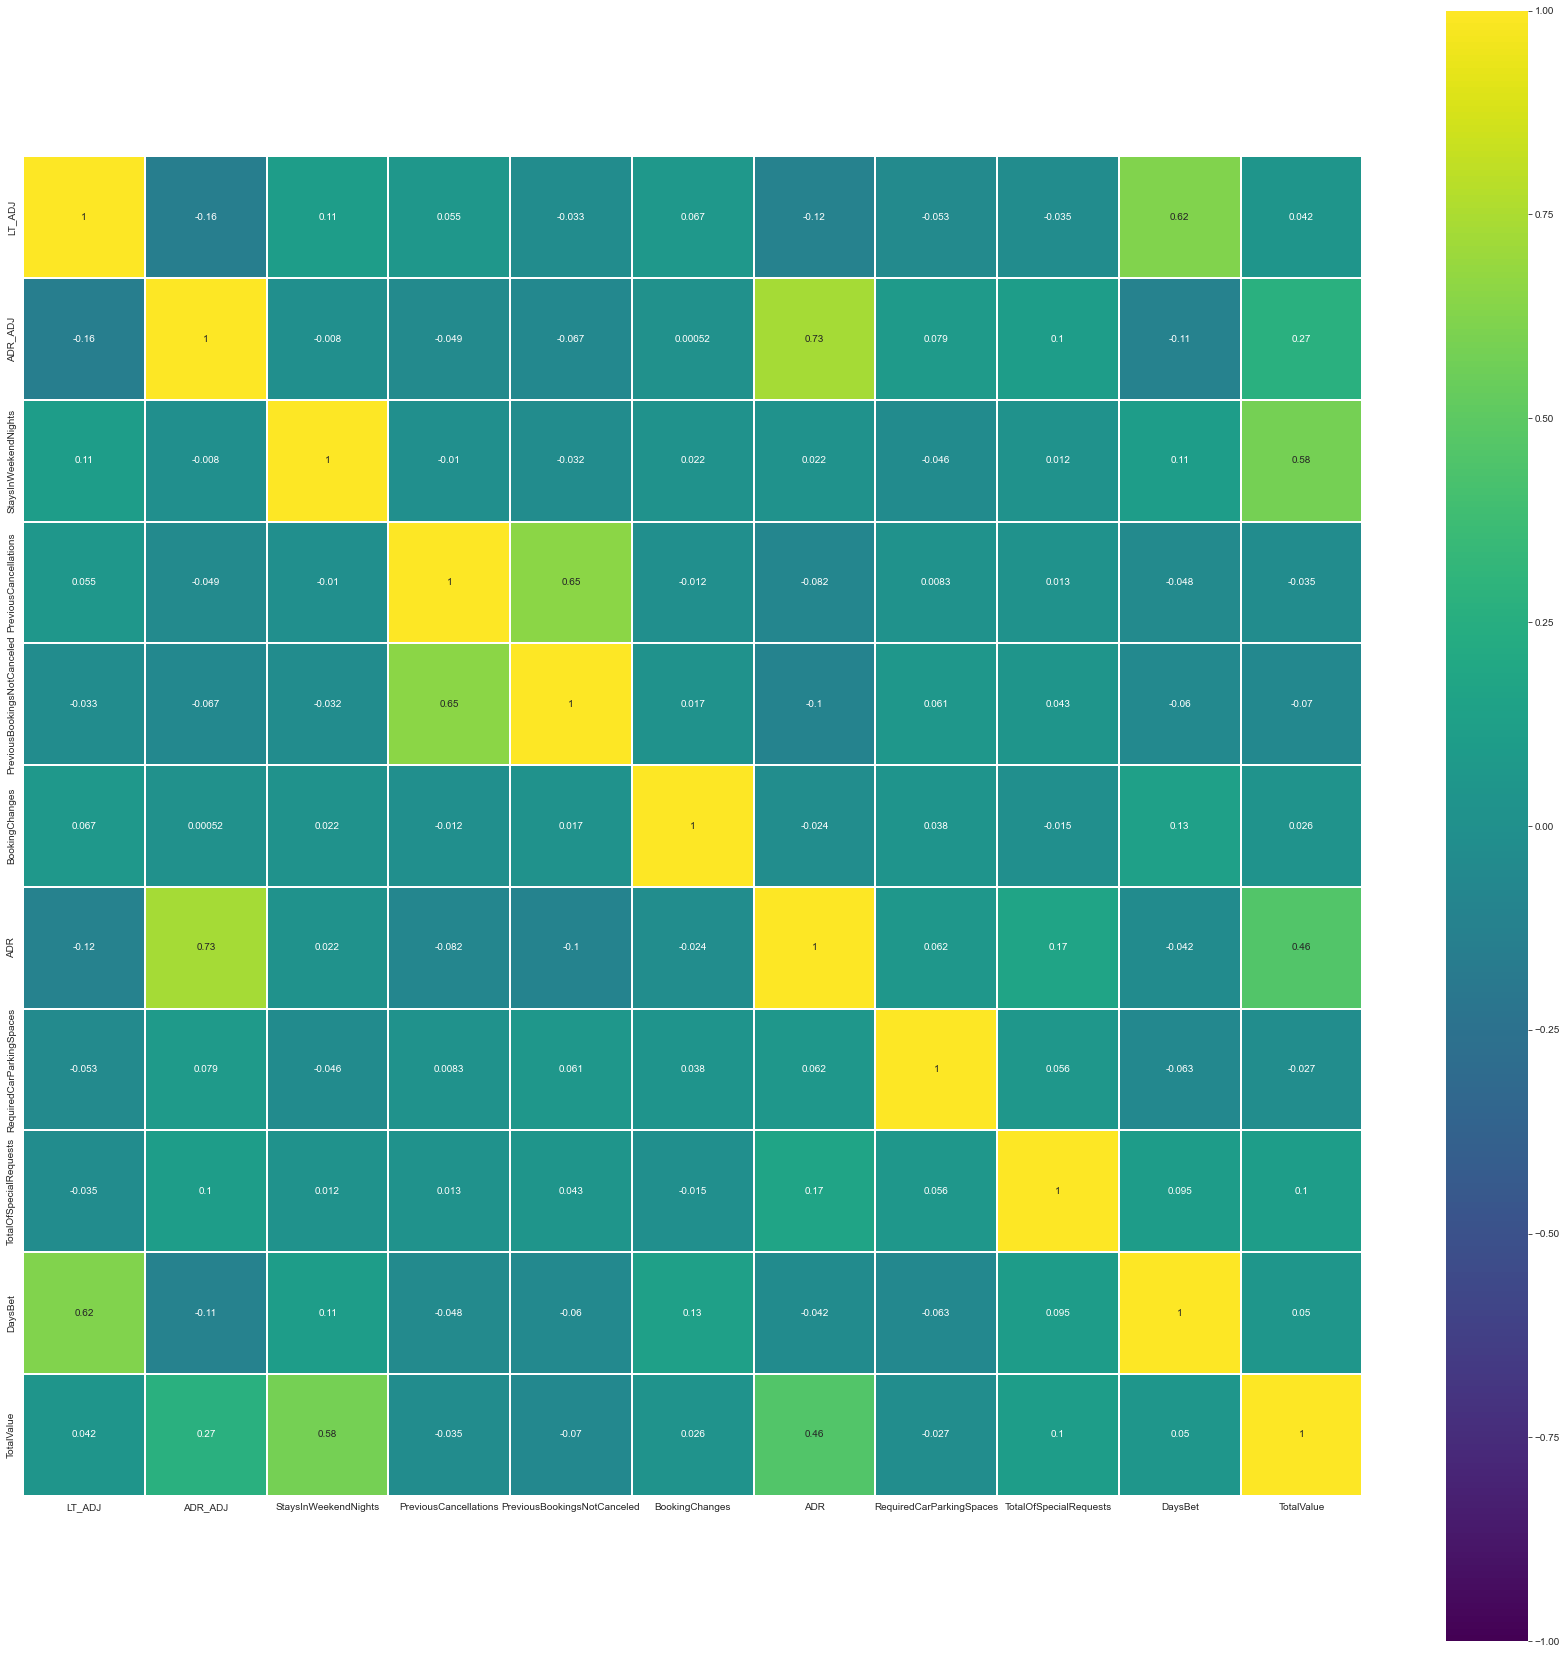

In [220]:
cor_heat_map(X_train_low[subset_low].corr())

### Modelling Stage

### Choosen Metric: Recall because we want to minimize FN

TP = Bem Cancelado (Dono faz dinheiro com overbooking)  
TN = Mantem tudo igual (dono faz dinheiro normalmente)  
FP = Dono faz dinheiro com overbooking mas tem custos de realojamento   
FN = Dono sofre com quarto desocupado (custo do quarto)


#### Modelling Funcions 

In [27]:
def metrics(y_train, pred_train , y_val, pred_val):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    

def Model_test (model, x_train,x_val,y_train,y_val):
    from sklearn.metrics import f1_score
    model = model
    model.fit(x_train,y_train)
    
    model_predTrain = model.predict(x_train)
    model_predval = model.predict(x_val)
    metrics(y_train,model_predTrain,y_val,model_predval)
    print(f'The test F1 score is ')
    print(f1_score(y_train,model_predTrain, average='micro'))
    print(f'The val F! score is ')
    print(f1_score(y_val,model_predval,average='micro'))
    return(model)


def stratKfold (X_train,y_train, model):
    from sklearn.metrics import f1_score, recall_score, precision_score
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(10,shuffle=True, random_state=10)
    avg_accuracy_train = []
    avg_accuracy_test = []
    avg_score_train = []
    avg_score_test = []
    avg_precision_test = []
    avg_precision_train = []
    avg_recall_test = []
    avg_recall_train = []
    scores = pd.DataFrame()
    
    train_accuracy = []
    test_accuracy = []
    train_score = []
    test_score = []
    train_recall = []
    test_recall = []
    train_precision = []
    test_precision = []
    
    for train_index, test_index in skf.split(X_train,y_train):
        x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        algo = model.fit(x_train, Y_train)
        
        accuracy_train = model.score(x_train , Y_train)
        f1_train = f1_score(Y_train,algo.predict(x_train))
        recall_train = recall_score(Y_train,algo.predict(x_train))
        precision_train = precision_score(Y_train,algo.predict(x_train))
        
        accuracy_test = model.score(x_test, Y_test)
        f1_test = f1_score(Y_test,algo.predict(x_test))
        recall_test = recall_score(Y_test,algo.predict(x_test))
        precision_test = precision_score(Y_test,algo.predict(x_test))
        
        train_accuracy.append(accuracy_train)
        train_score.append(f1_train)
        train_recall.append(recall_train)
        train_precision.append(precision_train)
        
        test_accuracy.append(accuracy_test)
        test_score.append(f1_test)
        test_recall.append(recall_test)
        test_precision.append(precision_test)
        
    avg_accuracy_train.append(np.round(np.mean(train_accuracy),3))
    avg_accuracy_test.append(np.round(np.mean(test_accuracy),3))
    avg_score_train.append(np.round(np.mean(train_score),3))
    avg_score_test.append(np.round(np.mean(test_score),3))
    avg_recall_test.append(np.round(np.mean(test_recall),3))
    avg_recall_train.append(np.round(np.mean(train_recall),3))
    avg_precision_test.append(np.round(np.mean(test_precision),3))
    avg_precision_train.append(np.round(np.mean(train_precision),3))
    
    scores['accuracy_train'] = avg_accuracy_train
    scores['f1_train'] = avg_score_train
    scores['recall_train'] = avg_recall_train
    scores['precision_train'] = avg_precision_train
    scores['f1_train_std'] = np.round(np.std(train_score),3)
    scores['accuracy_train_std'] = np.round(np.std(train_accuracy),3)
    
    scores['accuracy_test'] = avg_accuracy_test
    scores['f1_test'] = avg_score_test
    scores['recall_test'] = avg_recall_test
    scores['precision_test'] = avg_precision_test
    scores['f1_test_std'] = np.round(np.std(test_score),3)
    scores['accuracy_test_std'] = np.round(np.std(test_accuracy),3)
    returns = {}
    returns['scores'] = scores
    returns['model'] = model
    
    model_assess = pd.DataFrame(index = returns['scores'].index)
    model_assess['train_score'] = avg_score_train
    model_assess['test_score'] = avg_score_test
    
    plotting = pd.DataFrame()
    plotting['Train_R2'] = train_accuracy
    plotting['Test_R2'] = test_accuracy
    plotting['Train_F1'] = train_score
    plotting['Test_F1'] = test_score
    plt.figure()
    plotting.plot(kind='box', title='boxplot', showmeans=True)
    plt.show()

    
    return(returns)

def stratKfold_compare_model (X_train,y_train,names, model):
    from sklearn.metrics import f1_score, recall_score, precision_score
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(10,shuffle=True,random_state=10)
    
    avg_accuracy_train = []
    avg_accuracy_test = []
    avg_score_train = []
    avg_score_test = []
    avg_precision_test = []
    avg_precision_train = []
    avg_recall_test = []
    avg_recall_train = []
    avg_std_test = []
    avg_std_train = []
    r2_std_train = []
    r2_std_test = []
    
    scores = pd.DataFrame(index = names)
    
    


    for i in model:
        train_score = []
        train_r2 = []
        test_score = []
        test_r2 = []
        for train_index, test_index in skf.split(X_train,y_train):
            x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
            Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
            algo = i.fit(x_train, Y_train)
            
            f1_train = f1_score(Y_train,algo.predict(x_train))
            f1_test = f1_score(Y_test,algo.predict(x_test))
            r2_train = algo.score(x_train , Y_train)
            r2_test = algo.score(x_test , Y_test)
            
            train_score.append(f1_train)
            test_score.append(f1_test)
            train_r2.append(r2_train)
            test_r2.append(r2_test)
         
        avg_accuracy_train.append(np.round(np.mean(train_r2),3))
        avg_accuracy_test.append(np.round(np.mean(test_r2),3))
        avg_score_train.append(np.round(np.mean(train_score),3))
        avg_score_test.append(np.round(np.mean(test_score),3))
        avg_std_train.append(np.round(np.std(train_score),3))
        avg_std_test.append(np.round(np.std(test_score),3))
        r2_std_train.append(np.round(np.std(train_r2),3))
        r2_std_test.append(np.round(np.std(test_r2),3))
    
    
    scores['accuracy_train'] = avg_accuracy_train
    scores['accuracy_test'] = avg_accuracy_test
    scores['f1_train'] = avg_score_train
    scores['f1_test'] = avg_score_test
    scores['f1_train_std'] = avg_std_train
    scores['f1_test_std'] = avg_std_test
    scores['accuracy_train_std'] = r2_std_train
    scores['accuracy_test_std'] = r2_std_test

    returns = {}
    returns['scores'] = scores
    returns['model'] = model
    
    model_assess = pd.DataFrame(index = returns['scores'].index)
    model_assess['train_score'] = avg_score_train
    model_assess['test_score'] = avg_score_test
    return(returns)


def stratKfold_compare_subsets (X_train,y_train,names,subsets, model):
    from sklearn.metrics import f1_score, recall_score, precision_score
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(10,shuffle=True,random_state=10)

    avg_accuracy_train = []
    avg_accuracy_test = []
    avg_score_train = []
    avg_score_test = []
    avg_precision_test = []
    avg_precision_train = []
    avg_recall_test = []
    avg_recall_train = []
    avg_std_test = []
    avg_std_train = []
    r2_std_train = []
    r2_std_test = []
    scores = pd.DataFrame(index = names)
    
    
    for i in subsets:
        train_score = []
        test_score = []
        for train_index, test_index in skf.split(X_train,y_train):
            x_train, x_test = X_train[i].iloc[train_index], X_train[i].iloc[test_index]
            Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
            algo = model.fit(x_train, Y_train)
            f1_train = f1_score(Y_train,algo.predict(x_train))
            f1_test = f1_score(Y_test,algo.predict(x_test))
            r2_train = algo.score(x_train , Y_train)
            r2_test = algo.score(x_test , Y_test)
            
            train_score.append(f1_train)
            test_score.append(f1_test)
            train_r2.append(r2_train)
            test_r2.append(r2_test)
            
            
        avg_accuracy_train.append(np.round(np.mean(train_r2),3))
        avg_accuracy_test.append(np.round(np.mean(test_r2),3))
        avg_score_train.append(np.round(np.mean(train_score),3))
        avg_score_test.append(np.round(np.mean(test_score),3))
        avg_std_train.append(np.round(np.std(train_score),3))
        avg_std_test.append(np.round(np.std(test_score),3))
        r2_std_train.append(np.round(np.std(train_r2),3))
        r2_std_test.append(np.round(np.std(test_r2),3))
    
    scores['accuracy_train'] = avg_accuracy_train
    scores['accuracy_test'] = avg_accuracy_test
    scores['f1_train'] = avg_score_train
    scores['f1_test'] = avg_score_test
    scores['f1_train_std'] = avg_std_train
    scores['f1_test_std'] = avg_std_test
    scores['accuracy_train_std'] = r2_std_train
    scores['accuracy_test_std'] = r2_std_test
    
    

    returns = {}
    returns['scores'] = scores
    returns['model'] = model
    
    model_assess = pd.DataFrame(index = returns['scores'].index)
    model_assess['train_score'] = avg_score_train
    model_assess['test_score'] = avg_score_test
    return(returns)


def cross_val_Stand (x_train,y_train,model, scoring):
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import cross_val_score, StratifiedKFold
    #clf = make_pipeline(StandardScaler(), model)
    clf = make_pipeline(model)
    stk= StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
    cross_val = cross_val_score(clf,x_train, y_train,cv = stk)
    clf.fit(x_train,y_train)
    mean = np.round(cross_val.mean(),3)
    std = np.round(cross_val.std(),3)
    print(f'Validation Score: {mean}')
    print(f'Validation std: {std}')
    return(cross_val,clf)
                                             

def cross_val_Stand_TS (x_train,y_train,model, k,scoring):
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import cross_val_score, TimeSeriesSplit
    clf = make_pipeline(StandardScaler(), model)
    stk= TimeSeriesSplit(n_splits=k)
    cross_val = cross_val_score(clf,x_train, y_train,cv = stk)
    clf.fit(x_train,y_train)
    mean = np.round(cross_val.mean(),3)
    std = np.round(cross_val.std(),3)
    print(f'Validation Score: {mean}')
    print(f'Validation std: {std}')
    return(cross_val,clf)

def multiple_algorithms (x_train, y_train, x_val,y_val, estimators,names):
    results = pd.DataFrame(index=pd.Series(names).astype(str).str[:5])
    scores = []
    recall = []
    precision = []
    models = {}
    ft_importance = pd.DataFrame(index = x_train.columns)
    for i in estimators:
        print(i)
        sk = stratKfold(x_train.loc[:,:],y_train,i)
        scores.append(sk['scores'].loc[:,'f1_test'].mean())
        recall.append(sk['scores'].loc[:,'recall_test'].mean())
        precision.append(sk['scores'].loc[:,'precision_test'].mean())
        
        models[i] = sk['model']
#         ft_importance[f'{i}'] = sk['model'].feature_importances_
        pred_train = sk['model'].predict(x_train.loc[:,])
        pred_val = sk['model'].predict(x_val.loc[:,:])
        #metrics(y_train,pred_train,y_val,pred_val)
        print(sk['scores'].loc[:,'f1_test'].mean())
        print('-'*125)
    results['f1_Validation'] = scores
    results['recall_validation'] = recall
    results['precision_validation'] = precision
    returns = [results, models]
    return(returns)

def roc_curve (models,names,X_train,y_train, X_val, y_val):
    names= names
    from sklearn.metrics import roc_curve
    sns.set_theme(style = 'darkgrid')
    plt.figure(figsize = (10,10))
    for i, names ,in zip(models,names):
        #i.fit(X_train,y_train)
        thresh_dict = {}
        prob_model = i.predict_proba(X_val)
        
        fpr_DT_ent, tpr_DT_ent, thresholds_DT_ent = roc_curve(y_val, prob_model[:,1])
        plt.plot(fpr_DT_ent, tpr_DT_ent, label=f"ROC Curve {names}" , )
        
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.legend()
    plt.show()


def precision_recall_curve (model,names, X_train,y_train,x_val,y_val):
    names=names
    model.fit(X_train,y_train)
    proba = model.predict_proba(x_val)
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_val, proba[:,1])

    # apply f1 score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

    plt.plot(recall, precision, marker='.', label=f'{names}')
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    
    
def fitted_precision_recall_curve (model,names, X_train,y_train,x_val,y_val):
    names=names
    #model.fit(X_train,y_train)
    proba = model.predict_proba(x_val)
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_val, proba[:,1])

    # apply f1 score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

    plt.plot(recall, precision, marker='.', label=f'{names}')
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    
def full_assessment (estimators,names,x_train,y_train,x_val,y_val):
    from sklearn.metrics import f1_score
    names= names
    moddeling = multiple_algorithms(x_train,y_train,x_val,y_val,estimators=estimators,names=names)
    print(pd.DataFrame(moddeling[0].loc[:,'f1_Validation']))
    
    roc_curve(estimators,names,x_train,y_train,x_val,y_val)
    
    for i ,name in zip(estimators,names):
        print(precision_recall_curve(i,name,x_train,y_train,x_val,y_val))
    return(moddeling)

def test_classifiers (X_train,X_test,y_train,y_test, classifier):
    from sklearn.model_selection import cross_val_score
    for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train,)
        training_score = cross_val_score(classifier, X_test, y_test, cv=5)
        print(Model_test(classifier,X_train,X_test,y_train,y_test))
        print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    return()

def stack_ensemble_classifier_2 (X_train,y_train, X_val,y_val,estimators,final_estimator):
    from sklearn.pipeline import make_pipeline
    from sklearn.metrics import f1_score
    estimators = estimators
    clf = StackingClassifier( estimators=estimators, final_estimator=final_estimator, cv=5)
    clf.fit(X_train, y_train)
    print(f1_score(y_val,clf.predict(X_val)))
    return(clf)

def grid_search (model, params,x_train,y_train,x_val,y_val):
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import f1_score
    grid = GridSearchCV(model, param_grid=params,cv=10,scoring='f1_micro',refit=True).fit(x_train,y_train)
    best_est = grid.best_estimator_
    grid_pred = best_est.predict(x_val)
    metrics(y_train ,best_est.predict(x_train),y_val,grid_pred)
    return(grid)


def print_assess (data):
    from IPython.display import display
    scores = pd.DataFrame(index = ['R2','R2_std','F1', 'F1_std'],columns=['Train', 'Test'])
    scores['Train'] = [(np.mean(data['scores']['accuracy_train'])),(data['scores']['accuracy_train_std'].values[0]),
                        (np.mean(data['scores']['f1_train'])), (data['scores']['f1_train_std'].values[0]) ]
    scores['Test'] = [np.mean(data['scores']['accuracy_test']),(data['scores']['accuracy_test_std'].values[0]),
                        np.mean(data['scores']['f1_test'].values[0]), (data['scores']['f1_test_std'].values[0]) ]
    
    display(scores)
    return(scores)



def keras_roc_Curve (x_train,y_train):
    from sklearn.metrics import roc_curve

    thresh_dict = {}
    prob_model = model.predict(x_train)

    fpr_DT_ent, tpr_DT_ent, thresholds_DT_ent = roc_curve(y_train, prob_model)
    plt.plot(fpr_DT_ent, tpr_DT_ent, label=f"ROC Curve ")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()

    
def fit_assess (model , x_train,y_train, x_val, y_val):
    from IPython.display import display
    model = model
    model = stratKfold(x_train,y_train,model)
    print_assess(model)
    R2 = model['model'].score(x_val,y_val)
    from sklearn.model_selection import cross_validate
    #cv = cross_validate(model['model'],x_train, y_train)
    #avg_score = cv['test_score'].mean()
    #print(f'The CV score is : {avg_score}')
    print(f'The R2 of the model is {R2}')
    display(model['scores'])
    return([model['model'],model['scores']])


def fit_assess_2 (model , x_train,y_train, x_val, y_val):
    from IPython.display import display
    model = model
    model = stratKfold(x_train,y_train,model)
    print_assess(model)
    R2 = model['model'].score(x_val,y_val)
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    pred = model['model'].predict(x_val)
    print(f'The test precision is: {precision_score(y_val,pred)}')
    print(f'The test recall is: {recall_score(y_val,pred)}')
    print(f'The test f1 is: {f1_score(y_val,pred)}')
    print(f'The R2 of the model is {R2}')
    display(model['scores'])
    return([model['model'],model['scores']])

def submissions (test, model, subset):
    sample_submission = pd.read_csv('sample_submission.csv')
    #print(test)
    prediction = model.predict(test.loc[:,subset])
    print(prediction.mean())
    sample_submission['Buy'] = prediction
    sample_submission['Buy'] = sample_submission['Buy'].astype(bool)
    sample_submission.set_index('Access_ID', inplace=True)
    return(sample_submission)

def print_ft_importance (data, clf):
    clf.feature_importances_ 
    plot_data = pd.DataFrame(index = data.columns, data = clf.feature_importances_, columns={'Ft_importance'}  )
    plot_query = plot_data.loc[plot_data['Ft_importance']>0.005].copy()
    print(plot_query.index)
    plt.barh(y = plot_query.index , width=plot_query['Ft_importance'] )

#KERASSS
import keras
METRICS = [
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def keras_nn (x_train,y_train,x_val,y_val,epochs, batch_size):
    
    len_ =len(x_train.columns)
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.wrappers.scikit_learn import KerasClassifier

    model = Sequential()
    model.add(Dense(len_, input_dim=len_ , activation='relu')) #define input layer
    model.add(Dense(16, activation='relu')) #define 1st hidden layer with x units
    #model.add(Dense(10, activation='relu')) #define 2nd hidden layer with y units, we can keep adding hdden layers
    
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[METRICS])
    model.fit(x_train,y_train,epochs=epochs,validation_data=(x_val, y_val),batch_size=batch_size)
    metrics(y_train, (model.predict(x_train)>0.5).astype(int), y_val,(model.predict(x_val)>0.5).astype(int))
    
    return(model)

#pred_withThreshold(rf_grid1, x_train_stand_out[subset4],0.32)
def pred_withThreshold (model,data,threshold):
    y_pred = ((model.predict_proba(data)[:,1]) >threshold).astype(bool)
    return(y_pred)

#importing some classifiers for preliminary tests
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import BaseDecisionTree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

#### High Season

#### Random Forest

<Figure size 432x288 with 0 Axes>

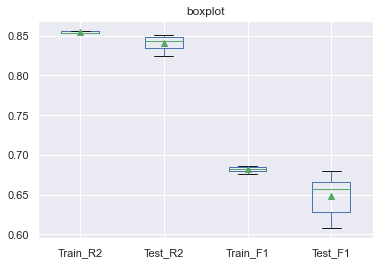

Train   Test
R2      0.854  0.841
R2_std  0.001  0.008
F1      0.682  0.648
F1_std  0.003  0.023

The test precision is: 0.9303120991876871
The test recall is: 0.43765084473049076
The test f1 is: 0.5952674052797156
The R2 of the model is 0.7884464145277758


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.854     0.682          0.55            0.897         0.003   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.001          0.841    0.648        0.518           0.868   

   f1_test_std  accuracy_test_std  
0        0.023              0.008

In [63]:
RFmodel = fit_assess_2(RandomForestClassifier(max_depth=10,min_samples_leaf=15,random_state=10),X_train_high[subset_high],y_train_high, Test_high[subset_high],Y_test_high)

Best Threshold=0.311240, F-Score=0.713


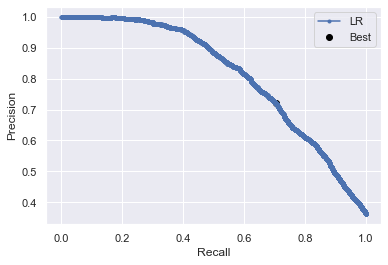

In [64]:
fitted_precision_recall_curve(RFmodel[0],'LR',Test_high[subset_high],Y_test_high, Test_high[subset_high],Y_test_high)

In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(RFmodel[0],Test_high[subset_high],0.3) 
pred_prob = RFmodel[0].predict_proba(Test_high[subset_high])
precision = precision_score(Y_test_high,pred)
recall = recall_score(Y_test_high,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.6990215264187867
Recall : 0.7184231697506034


In [30]:
metrics(y_val_high, RFmodel[0].predict(X_val_high[subset_high]),Y_test_high,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3870
           1       0.84      0.52      0.64      1531

    accuracy                           0.84      5401
   macro avg       0.84      0.74      0.77      5401
weighted avg       0.84      0.84      0.82      5401

[[3724  146]
 [ 741  790]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### LGB Model

<Figure size 432x288 with 0 Axes>

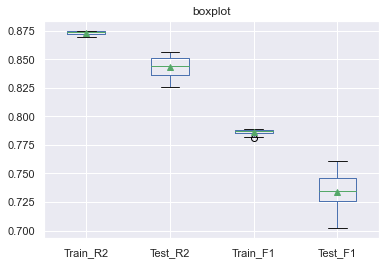

Train   Test
R2      0.873  0.843
R2_std  0.002  0.010
F1      0.786  0.734
F1_std  0.003  0.017

The test precision is: 0.8650231876983159
The test recall is: 0.7127916331456154
The test f1 is: 0.7815635681993605
The R2 of the model is 0.858368485021806


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.873     0.786         0.822            0.753         0.003   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.002          0.843    0.734        0.765           0.706   

   f1_test_std  accuracy_test_std  
0        0.017               0.01

In [84]:
LGBmodel = fit_assess_2(lgb.LGBMClassifier(n_estimators =100,learning_rate=0.2,boosting_type='dart',class_weight='balanced',
                                           max_depth=6,random_state=10),X_train_high[subset_high],y_train_high, Test_high[subset_high],Y_test_high)

Best Threshold=0.491356, F-Score=0.785


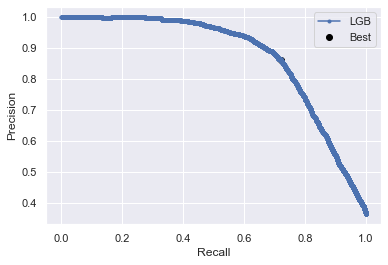

In [85]:
fitted_precision_recall_curve(LGBmodel[0],'LGB',Test_high[subset_high],Y_test_high, Test_high[subset_high],Y_test_high)

In [87]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(LGBmodel[0],Test_high[subset_high],0.5) 
pred_prob = LGBmodel[0].predict_proba(Test_high[subset_high])
precision = precision_score(Y_test_high,pred)
recall = recall_score(Y_test_high,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.8650231876983159
Recall : 0.7127916331456154


In [88]:
metrics(y_val_high,LGBmodel[0].predict(X_val_high[subset_high]),Y_test_high,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3870
           1       0.69      0.75      0.72      1531

    accuracy                           0.83      5401
   macro avg       0.79      0.81      0.80      5401
weighted avg       0.84      0.83      0.83      5401

[[3342  528]
 [ 381 1150]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [89]:
#FN rate (Customers who canceled)
1428 / len(pred)

0.1020948023164367

In [90]:
#FP Rate (risk of overbooking)
553 / len(pred)

0.039536712661757345

#### XGBoost

[15:24:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<Figure size 432x288 with 0 Axes>

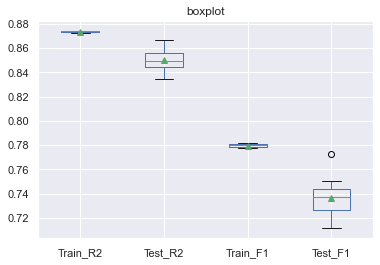

Train   Test
R2      0.874  0.850
R2_std  0.001  0.009
F1      0.779  0.736
F1_std  0.001  0.017

The test precision is: 0.8817708333333333
The test recall is: 0.6810136765888978
The test f1 is: 0.7684975034044484
The R2 of the model is 0.8541502824050904


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.874     0.779         0.788            0.771         0.001   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.001           0.85    0.736         0.74           0.733   

   f1_test_std  accuracy_test_std  
0        0.017              0.009

In [91]:
GBmodel = fit_assess_2(XGBClassifier(n_estimators =500,learning_rate=0.2,booster='gbtree',scale_pos_weight= 2,
                                     min_child_weight=0.2,max_depth=2,random_state=10),
                       X_train_high[subset_high],y_train_high, Test_high[subset_high],Y_test_high)

Best Threshold=0.379789, F-Score=0.785


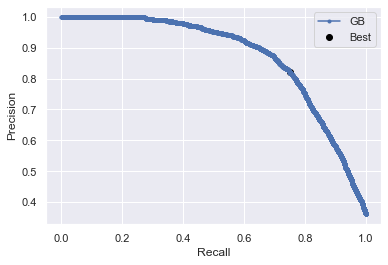

In [92]:
fitted_precision_recall_curve(GBmodel[0],'GB',Test_high[subset_high],Y_test_high, Test_high[subset_high],Y_test_high)

In [98]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(GBmodel[0],Test_high[subset_high],0.37) 
pred_prob = GBmodel[0].predict_proba(Test_high[subset_high])
precision = precision_score(Y_test_high,pred)
recall = recall_score(Y_test_high,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.8141957890167137
Recall : 0.754424778761062


In [99]:
metrics(y_val_high,GBmodel[0].predict(X_val_high[subset_high]),Y_test_high,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3870
           1       0.71      0.72      0.72      1531

    accuracy                           0.84      5401
   macro avg       0.80      0.80      0.80      5401
weighted avg       0.84      0.84      0.84      5401

[[3423  447]
 [ 430 1101]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [248]:
#FN rate (Customers who canceled)
1221/ len(pred)

0.08679488096089226

In [249]:
#FP Rate (risk of overbooking)
856 / len(pred)

0.06420247372560234

#### SVM

<Figure size 432x288 with 0 Axes>

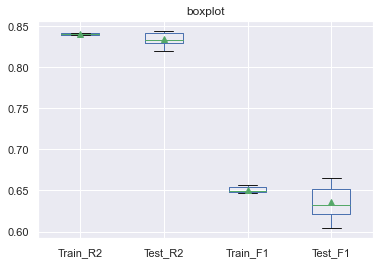

Train   Test
R2      0.840  0.834
R2_std  0.001  0.008
F1      0.651  0.636
F1_std  0.003  0.020

The test precision is: 0.9373996789727127
The test recall is: 0.46983105390185037
The test f1 is: 0.6259378349410504
The R2 of the model is 0.8003860727818689


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0            0.84     0.651         0.525            0.856         0.003   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.001          0.834    0.636        0.511           0.844   

   f1_test_std  accuracy_test_std  
0         0.02              0.008

In [254]:
SVMmodel = fit_assess_2(SVC(probability=True, random_state=10),X_train_high[subset_high],y_train_high, Test_high[subset_high],Y_test_high)

Best Threshold=0.178061, F-Score=0.749


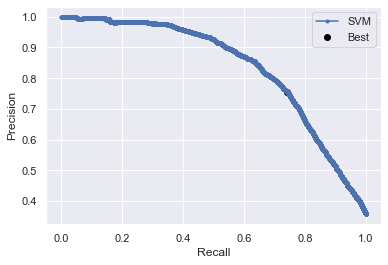

In [255]:
fitted_precision_recall_curve(SVMmodel[0],'SVM',Test_high[subset_high],Y_test_high, Test_high[subset_high],Y_test_high)

In [258]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(SVMmodel[0],Test_high[subset_high],0.17) 
pred_prob = SVMmodel[0].predict_proba(Test_high[subset_high])
precision = precision_score(Y_test_high,pred)
recall = recall_score(Y_test_high,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.7336977743069114
Recall : 0.7558326629123089


In [261]:
metrics(y_val_high,SVMmodel[0].predict(X_val_high[subset_high]),Y_test_high,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3870
           1       0.81      0.50      0.62      1531

    accuracy                           0.83      5401
   macro avg       0.82      0.73      0.75      5401
weighted avg       0.82      0.83      0.81      5401

[[3693  177]
 [ 761  770]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [262]:
#FN rate (Customers who canceled)
1214 / len(pred)

0.08679488096089226

In [263]:
#FP Rate (risk of overbooking)
1364 / len(pred)

0.09751912490169443

#### Sklearn NN

<Figure size 432x288 with 0 Axes>

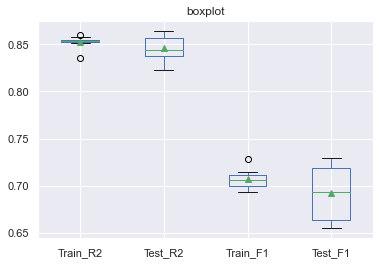

Train   Test
R2      0.852  0.846
R2_std  0.006  0.013
F1      0.707  0.692
F1_std  0.010  0.028

The test precision is: 0.9446290143964563
The test recall is: 0.5146822204344328
The test f1 is: 0.6663194896497853
The R2 of the model is 0.8167584185314936


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.852     0.707         0.628            0.812          0.01   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.006          0.846    0.692        0.614           0.799   

   f1_test_std  accuracy_test_std  
0        0.028              0.013

In [443]:
SNNmodel = fit_assess_2(MLPClassifier(learning_rate_init=0.1,learning_rate='adaptive',random_state=10),X_train_high[subset_high],y_train_high, Test_high[subset_high],Y_test_high)

Best Threshold=0.212973, F-Score=0.770


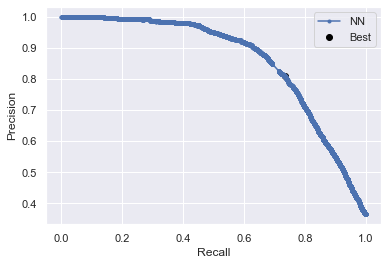

In [444]:
fitted_precision_recall_curve(SNNmodel[0],'NN',Test_high[subset_high],Y_test_high, Test_high[subset_high],Y_test_high)

In [446]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(SNNmodel[0],Test_high[subset_high],0.21) 
pred_prob = SNNmodel[0].predict_proba(Test_high[subset_high])
precision = precision_score(Y_test_high,pred)
recall = recall_score(Y_test_high,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.8043478260869565
Recall : 0.7367256637168141


In [447]:
metrics(y_val_high,SNNmodel[0].predict(X_val_high[subset_high]),Y_test_high,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      3870
           1       0.83      0.55      0.66      1531

    accuracy                           0.84      5401
   macro avg       0.83      0.75      0.78      5401
weighted avg       0.84      0.84      0.83      5401

[[3692  178]
 [ 685  846]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [380]:
#FN rate (Customers who canceled)
1309  / len(pred)

0.0935869021234003

In [100]:
#FP Rate (risk of overbooking)
891 / len(pred)

0.06370200900836491

#### Voting 

In [450]:
est = [('LGB',LGBmodel[0]),('XGB',GBmodel[0]),('NN',SNNmodel[0])]

[20:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<Figure size 432x288 with 0 Axes>

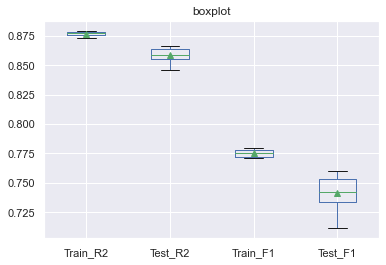

Train   Test
R2      0.877  0.859
R2_std  0.002  0.006
F1      0.775  0.741
F1_std  0.003  0.014

The test precision is: 0.9178397012352772
The test recall is: 0.6425985518905873
The test f1 is: 0.755944635040814
The R2 of the model is 0.8525058983341675


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.877     0.775         0.749            0.804         0.003   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.002          0.859    0.741        0.714           0.771   

   f1_test_std  accuracy_test_std  
0        0.014              0.006

In [451]:
Votemodel = fit_assess_2(VotingClassifier(estimators=est
                                        ,voting='soft'),X_train_high[subset_high],y_train_high, Test_high[subset_high],Y_test_high)

Best Threshold=0.331306, F-Score=0.792


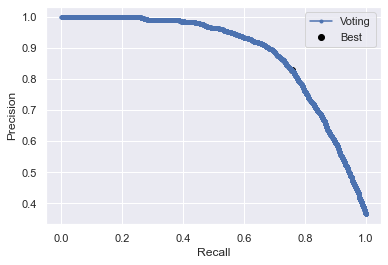

In [452]:
fitted_precision_recall_curve(Votemodel[0],'Voting',Test_high[subset_high],Y_test_high, Test_high[subset_high],Y_test_high)

In [455]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(Votemodel[0],Test_high[subset_high],0.33) 
pred_prob = Votemodel[0].predict_proba(Test_high[subset_high])
precision = precision_score(Y_test_high,pred)
recall = recall_score(Y_test_high,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.8268303375712407
Recall : 0.7586484312148029


In [456]:
metrics(y_val_high,Votemodel[0].predict(X_val_high[subset_high]),Y_test_high,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3870
           1       0.76      0.68      0.72      1531

    accuracy                           0.85      5401
   macro avg       0.82      0.80      0.81      5401
weighted avg       0.85      0.85      0.85      5401

[[3545  325]
 [ 484 1047]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [101]:
#FN rate (Customers who canceled)
1200  / len(pred)

0.08579395152641739

In [102]:
#FP Rate (risk of overbooking)
790 / len(pred)

0.05648101808822478

#### LR

<Figure size 432x288 with 0 Axes>

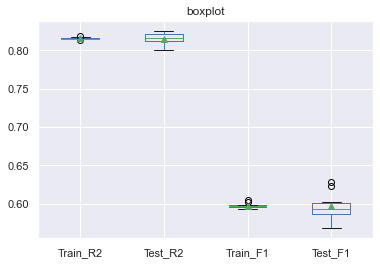

Train   Test
R2      0.815  0.815
R2_std  0.001  0.007
F1      0.598  0.597
F1_std  0.003  0.017

The test precision is: 0.8875739644970414
The test recall is: 0.4223652453740949
The test f1 is: 0.5723630417007358
The R2 of the model is 0.7756488167584186


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.815     0.598         0.483            0.783         0.003   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.001          0.815    0.597        0.482           0.783   

   f1_test_std  accuracy_test_std  
0        0.017              0.007

In [466]:
LRmodel = fit_assess_2(LogisticRegression(random_state=10),X_train_high[subset_high],y_train_high, Test_high[subset_high],Y_test_high)

Best Threshold=0.244366, F-Score=0.685


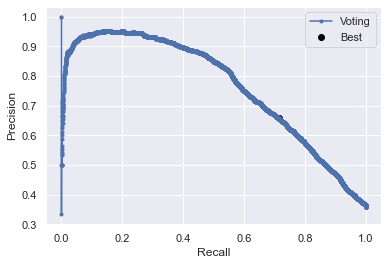

In [467]:
fitted_precision_recall_curve(LRmodel[0],'Voting',Test_high[subset_high],Y_test_high, Test_high[subset_high],Y_test_high)

In [470]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(LRmodel[0],Test_high[subset_high],0.24) 
pred_prob = LRmodel[0].predict_proba(Test_high[subset_high])
precision = precision_score(Y_test_high,pred)
recall = recall_score(Y_test_high,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.6521026761332606
Recall : 0.7204344328238134


In [471]:
metrics(y_val_high,LRmodel[0].predict(X_val_high[subset_high]),Y_test_high,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3870
           1       0.77      0.46      0.58      1531

    accuracy                           0.81      5401
   macro avg       0.79      0.70      0.73      5401
weighted avg       0.80      0.81      0.79      5401

[[3655  215]
 [ 822  709]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [380]:
#FN rate (Customers who canceled)
1309  / len(pred)

0.0935869021234003

In [381]:
#FP Rate (risk of overbooking)
891 / len(pred)

0.06370200900836491

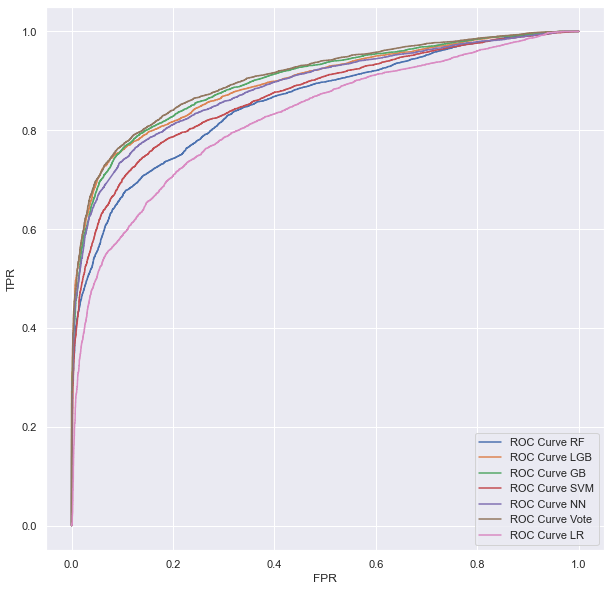

In [472]:
roc_curve([RFmodel[0], LGBmodel[0],GBmodel[0],SVMmodel[0],SNNmodel[0],Votemodel[0],LRmodel[0]],['RF','LGB','GB','SVM','NN','Vote','LR'],X_train_high[subset_high],y_train_high, Test_high[subset_high],Y_test_high)

#### NN Model

In [182]:
from tensorflow import keras
from tensorflow.keras import layers
METRICS = [
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.3,decay_steps=10000,decay_rate=0.9)

optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
def keras_nn (x_train,y_train,x_val,y_val,epochs, batch_size):
    
    len_ =len(x_train.columns)
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.wrappers.scikit_learn import KerasClassifier
    #optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model = Sequential()
    model.add(Dense(len_, input_dim=len_ , activation='relu')) #define input layer
    model.add(Dense(len_*(2/3), activation='relu')) #define 1st hidden layer with x units
    model.add(Dense(2, activation='relu')) #define 2nd hidden layer with y units, we can keep adding hdden layers
    
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])
    model.fit(x_train,y_train,epochs=epochs,validation_data=(x_val, y_val),batch_size=batch_size, class_weight={0:1,1:2})
    metrics(y_train, (model.predict(x_train)>0.5).astype(int), y_val,(model.predict(x_val)>0.5).astype(int))
    
    return(model)


def pred_withThreshold_keras (model,data,threshold):
    y_pred = ((model.predict(data)) >threshold).astype(bool)
    return(y_pred)


def fitted_precision_recall_curve_keras (model,names, X_train,y_train,x_val,y_val):
    names=names
    
    proba = model.predict(x_val)
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_val, proba)

    # apply f1 score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

    plt.plot(recall, precision, marker='.', label=f'{names}')
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

In [437]:
NNmodel = keras_nn(X_train_high[subset_high].drop(columns = ['IsRepeatedGuest']),y_train_high,Test_high[subset_high].drop(columns = ['IsRepeatedGuest']),Y_test_high,100,50)

Epoch 1/100
252/252 [==============================] - 1s 4ms/step - loss: 0.6905 - recall: 0.6449 - val_loss: 0.4688 - val_recall: 0.5292
Epoch 2/100
252/252 [==============================] - 1s 3ms/step - loss: 0.6307 - recall: 0.6844 - val_loss: 0.4450 - val_recall: 0.6903
Epoch 3/100
252/252 [==============================] - 1s 3ms/step - loss: 0.6189 - recall: 0.6905 - val_loss: 0.4114 - val_recall: 0.6130
Epoch 4/100
252/252 [==============================] - 1s 3ms/step - loss: 0.6012 - recall: 0.6995 - val_loss: 0.4137 - val_recall: 0.5813
Epoch 5/100
252/252 [==============================] - 1s 3ms/step - loss: 0.5935 - recall: 0.6998 - val_loss: 0.4020 - val_recall: 0.6229
Epoch 6/100
252/252 [==============================] - 1s 3ms/step - loss: 0.5859 - recall: 0.7051 - val_loss: 0.5208 - val_recall: 0.7977
Epoch 7/100
252/252 [==============================] - 1s 3ms/step - loss: 0.5821 - recall: 0.7043 - val_loss: 0.3935 - val_recall: 0.6392
Epoch 8/100
252/252 [======

Best Threshold=0.321412, F-Score=0.764


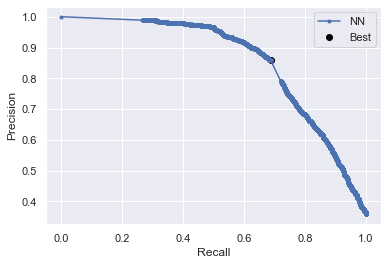

In [438]:
fitted_precision_recall_curve_keras(NNmodel,'NN',Test_high[subset_high].drop(columns = ['IsRepeatedGuest'])
                                    ,Y_test_high, Test_high[subset_high].drop(columns = ['IsRepeatedGuest']),Y_test_high)

In [434]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =(pred_withThreshold_keras(NNmodel,Test_high[subset_high].drop(columns=['IsRepeatedGuest']),0.36) ).astype(int)
#pred_prob = model[0].predict_proba(Test_low[subset_low])
precision = precision_score(Y_test_high,pred)
recall = recall_score(Y_test_high,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.8243086218917035
Recall : 0.7133950120675785


In [435]:
metrics(y_val_high,(NNmodel.predict(X_val_high[subset_high].drop(columns=['IsRepeatedGuest']))>0.5).astype(int),Y_test_high,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3870
           1       0.71      0.71      0.71      1531

    accuracy                           0.84      5401
   macro avg       0.80      0.80      0.80      5401
weighted avg       0.84      0.84      0.84      5401

[[3432  438]
 [ 445 1086]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [371]:
1262  / len(pred)

0.09022663902194895

In [372]:
846 / len(pred)

0.06048473582612426

In [148]:
Y_test_high_rev.groupby(['Classification']).sum()['TotalValue']

Classification
FN     725142.82
FP     707821.90
TN    4613602.14
TP    2772589.44
Name: TotalValue, dtype: float64

In [70]:
Y_test_high_rev[['TotalValue','Pred', 'Fact', 'Classification']].iloc[:

TotalValue  Pred  Fact Classification
25288       198.0     1     1             TP
25289       460.0     1     1             TP
25290       196.0     1     1             TP
25294       234.0     1     1             TP
25296       198.0     1     1             TP
25297       196.0     1     1             TP
25298       196.0     1     1             TP
25299       196.0     1     1             TP
25302       198.0     0     1             FN
25304       198.0     0     1             FN
25306       198.0     1     1             TP
25312       240.0     1     1             TP
25315       500.4     1     1             TP
25316       655.2     1     1             TP
25317       468.0     1     1             TP
25318       511.2     1     1             TP
25319       920.0     1     1             TP
25320      1840.0     1     1             TP
25321      1620.0     1     1             TP
25322      1792.0     1     1             TP

#### Low Season

#### LR

<Figure size 432x288 with 0 Axes>

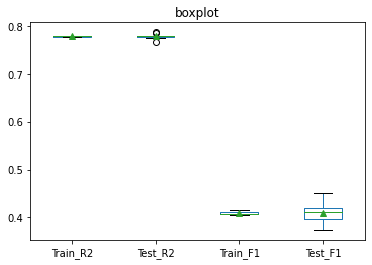

Train   Test
R2      0.778  0.779
R2_std  0.001  0.005
F1      0.408  0.409
F1_std  0.003  0.020

The test precision is: 0.7914529914529914
The test recall is: 0.24799143010176755
The test f1 is: 0.3776508972267537
The R2 of the model is 0.7511415525114156


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.778     0.408         0.283            0.733         0.003   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.001          0.779    0.409        0.284           0.735   

   f1_test_std  accuracy_test_std  
0         0.02              0.005

In [72]:
LRmodel_low = fit_assess_2(LogisticRegression(random_state=10),X_train_low[subset_low],y_train_low, Test_low[subset_low],Y_test_low)

Best Threshold=1.000000, F-Score=nan


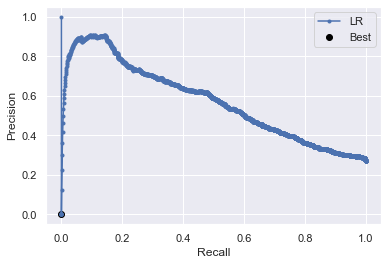

In [45]:
fitted_precision_recall_curve(LRmodel_low[0],'LR',X_val_low[subset_low],y_val_low, X_val_low[subset_low],y_val_low)

Best Threshold=0.263711, F-Score=0.641


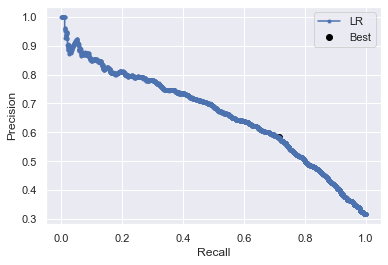

In [46]:
fitted_precision_recall_curve(LRmodel_low[0],'LR',Test_low[subset_low],Y_test_low, Test_low[subset_low],Y_test_low)

In [59]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(LRmodel_low[0],Test_low[subset_low],0.26) 
pred_prob = LRmodel_low[0].predict_proba(Test_low[subset_low])
precision = precision_score(Y_test_low,pred)
recall = recall_score(Y_test_low,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.5728856778580536
Recall : 0.7220139260846278


In [60]:
metrics(y_val_low,LRmodel_low[0].predict(X_val_low[subset_low]),Y_test_low,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.97      0.86      3287
           1       0.73      0.25      0.37      1222

    accuracy                           0.77      4509
   macro avg       0.75      0.61      0.62      4509
weighted avg       0.76      0.77      0.73      4509

[[3174  113]
 [ 915  307]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [61]:
#FN rate (Customers who canceled)
519  / len(pred)

0.08463796477495107

In [51]:
#FP Rate (risk of overbooking)
1005 / len(pred)

0.16389432485322897

#### RF

<Figure size 432x288 with 0 Axes>

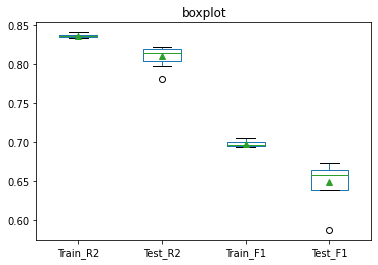

Train   Test
R2      0.836  0.810
R2_std  0.002  0.012
F1      0.698  0.649
F1_std  0.004  0.024

The test precision is: 0.6794462193823216
The test recall is: 0.6834493840385646
The test f1 is: 0.681441922563418
The R2 of the model is 0.8054468362687541


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.836     0.698         0.702            0.693         0.004   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.002           0.81    0.649         0.65           0.648   

   f1_test_std  accuracy_test_std  
0        0.024              0.012

In [74]:
RFmodel_low = fit_assess_2(RandomForestClassifier(max_depth=8,class_weight='balanced',random_state=10),X_train_low[subset_low],y_train_low, Test_low[subset_low],Y_test_low)

Best Threshold=0.507746, F-Score=0.611


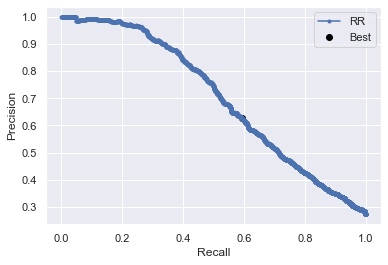

In [77]:
fitted_precision_recall_curve(RFmodel_low[0],'RR',X_val_low[subset_low],y_val_low, X_val_low[subset_low],y_val_low)

Best Threshold=0.497551, F-Score=0.682


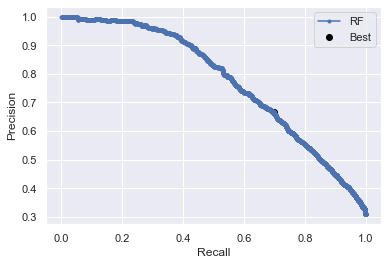

In [78]:
fitted_precision_recall_curve(RFmodel_low[0],'RF',Test_low[subset_low],Y_test_low, Test_low[subset_low],Y_test_low)

In [82]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(RFmodel_low[0],Test_low[subset_low],0.5) 
pred_prob = RFmodel_low[0].predict_proba(Test_low[subset_low])
precision = precision_score(Y_test_low,pred)
recall = recall_score(Y_test_low,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.6794462193823216
Recall : 0.6834493840385646


In [84]:
metrics(y_val_low,RFmodel_low[0].predict(X_val_low[subset_low]),Y_test_low,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3287
           1       0.63      0.62      0.63      1222

    accuracy                           0.80      4509
   macro avg       0.74      0.74      0.74      4509
weighted avg       0.80      0.80      0.80      4509

[[2837  450]
 [ 461  761]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [85]:
#FN rate (Customers who canceled)
591  / len(pred)

0.09637964774951076

In [86]:
#FP Rate (risk of overbooking)
602 / len(pred)

0.09817351598173515

#### LGB

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] ea

<Figure size 432x288 with 0 Axes>

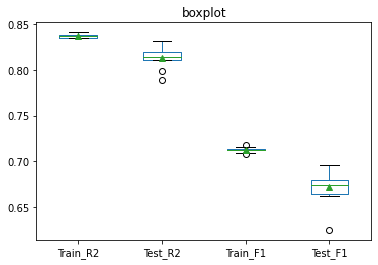

Train   Test
R2      0.837  0.814
R2_std  0.002  0.012
F1      0.713  0.672
F1_std  0.003  0.019

The test precision is: 0.6973026973026973
The test recall is: 0.7477236207820032
The test f1 is: 0.7216334970276557
The R2 of the model is 0.8243639921722113


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.837     0.713         0.748            0.681         0.003   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.002          0.814    0.672        0.705           0.642   

   f1_test_std  accuracy_test_std  
0        0.019              0.012

In [53]:
LGBmodel_low = fit_assess_2(lgb.LGBMClassifier(n_estimators = 200,early_stopping=50,boosting_type='dart',max_depth=4,class_weight='balanced',bagging_fraction=0.6,feature_fraction=0.8,learning_rate=0.2,random_state=10),X_train_low[subset_low],y_train_low, Test_low[subset_low],Y_test_low)

Best Threshold=0.570965, F-Score=0.649


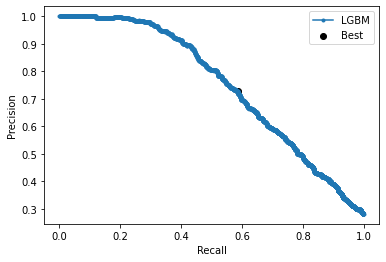

In [54]:
fitted_precision_recall_curve(LGBmodel_low[0],'LGBM',X_val_low[subset_low],y_val_low, X_val_low[subset_low],y_val_low)

Best Threshold=0.530379, F-Score=0.725


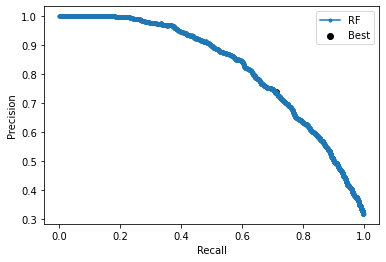

In [55]:
fitted_precision_recall_curve(LGBmodel_low[0],'RF',Test_low[subset_low],Y_test_low, Test_low[subset_low],Y_test_low)

In [56]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(LGBmodel_low[0],Test_low[subset_low],0.5) 
pred_prob = LGBmodel_low[0].predict_proba(Test_low[subset_low])
precision = precision_score(Y_test_low,pred)
recall = recall_score(Y_test_low,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.6973026973026973
Recall : 0.7477236207820032


In [57]:
metrics(y_val_low,LGBmodel_low[0].predict(X_val_low[subset_low]),Y_test_low,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      3287
           1       0.63      0.66      0.64      1222

    accuracy                           0.80      4509
   macro avg       0.75      0.76      0.75      4509
weighted avg       0.81      0.80      0.80      4509

[[2814  473]
 [ 417  805]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [158]:
#FN rate (Customers who canceled)
471  / len(pred)

0.07681017612524461

In [159]:
#FP Rate (risk of overbooking)
606 / len(pred)

0.09882583170254403

#### GB

[14:52:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<Figure size 432x288 with 0 Axes>

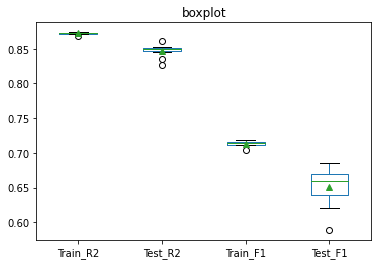

Train   Test
R2      0.872  0.847
R2_std  0.001  0.009
F1      0.713  0.651
F1_std  0.004  0.028

The test precision is: 0.8632478632478633
The test recall is: 0.5409748259239422
The test f1 is: 0.6651300625617386
The R2 of the model is 0.8341487279843445


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.872     0.713         0.588            0.905         0.004   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.001          0.847    0.651         0.53           0.847   

   f1_test_std  accuracy_test_std  
0        0.028              0.009

In [37]:
GBmodel_low = fit_assess_2(XGBClassifier(n_estimators = 200,booster='dart',max_depth=4,learning_rate=0.1,random_state=10),X_train_low[subset_low],y_train_low, Test_low[subset_low],Y_test_low)

Best Threshold=0.303775, F-Score=0.653


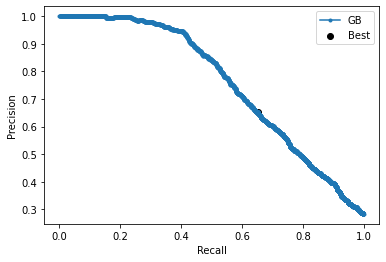

In [38]:
fitted_precision_recall_curve(GBmodel_low[0],'GB',X_val_low[subset_low],y_val_low, X_val_low[subset_low],y_val_low)

Best Threshold=0.321927, F-Score=0.715


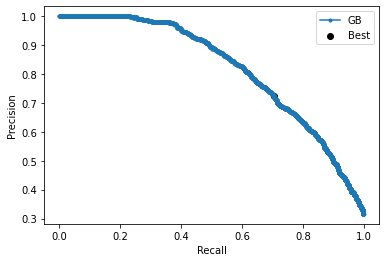

In [39]:
fitted_precision_recall_curve(GBmodel_low[0],'GB',Test_low[subset_low],Y_test_low, Test_low[subset_low],Y_test_low)

In [40]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(GBmodel_low[0],Test_low[subset_low],0.3) 
pred_prob = GBmodel_low[0].predict_proba(Test_low[subset_low])
precision = precision_score(Y_test_low,pred)
recall = recall_score(Y_test_low,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.6932168550873586
Recall : 0.7225495447241564


In [41]:
metrics(y_val_low,GBmodel_low[0].predict(X_val_low[subset_low]),Y_test_low,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      3287
           1       0.84      0.50      0.63      1222

    accuracy                           0.84      4509
   macro avg       0.84      0.73      0.76      4509
weighted avg       0.84      0.84      0.82      4509

[[3170  117]
 [ 609  613]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [42]:
#FN rate (Customers who canceled)
518  / len(pred)

0.08447488584474885

In [43]:
#FP Rate (risk of overbooking)
597 / len(pred)

0.09735812133072407

#### NN

<Figure size 432x288 with 0 Axes>

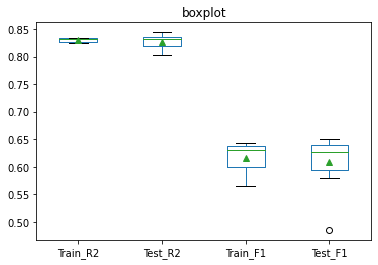

Train   Test
R2      0.830  0.827
R2_std  0.003  0.012
F1      0.616  0.609
F1_std  0.028  0.047

The test precision is: 0.8280155642023346
The test recall is: 0.5698982324584896
The test f1 is: 0.6751269035532995
The R2 of the model is 0.8330071754729289


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0            0.83     0.616         0.507            0.795         0.028   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.003          0.827    0.609        0.505           0.783   

   f1_test_std  accuracy_test_std  
0        0.047              0.012

In [46]:
NNmodel_low = fit_assess_2(MLPClassifier(activation='relu',learning_rate='adaptive', learning_rate_init=0.1,random_state=10),X_train_low[subset_low],y_train_low, Test_low[subset_low],Y_test_low)

Best Threshold=0.386708, F-Score=0.620


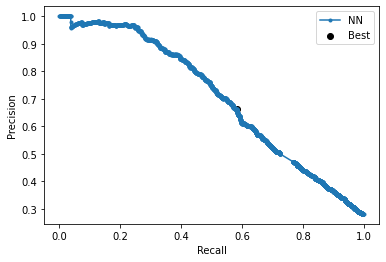

In [47]:
fitted_precision_recall_curve(NNmodel_low[0],'NN',X_val_low[subset_low],y_val_low, X_val_low[subset_low],y_val_low)

Best Threshold=0.300449, F-Score=0.709


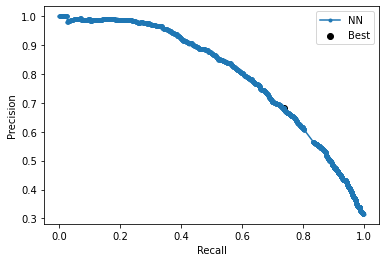

In [48]:
fitted_precision_recall_curve(NNmodel_low[0],'NN',Test_low[subset_low],Y_test_low, Test_low[subset_low],Y_test_low)

In [49]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(NNmodel_low[0],Test_low[subset_low],0.3) 
pred_prob = NNmodel_low[0].predict_proba(Test_low[subset_low])
precision = precision_score(Y_test_low,pred)
recall = recall_score(Y_test_low,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.6816831683168317
Recall : 0.7375468666309588


In [50]:
metrics(y_val_low,NNmodel_low[0].predict(X_val_low[subset_low]),Y_test_low,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3287
           1       0.74      0.51      0.60      1222

    accuracy                           0.82      4509
   macro avg       0.79      0.72      0.74      4509
weighted avg       0.81      0.82      0.81      4509

[[3066  221]
 [ 602  620]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [51]:
#FN rate (Customers who canceled)
490   / len(pred)

0.07990867579908675

In [52]:
#FP Rate (risk of overbooking)
643 / len(pred)

0.10485975212002609

#### Voting 

In [58]:
est = [('LGB',LGBmodel_low[0]),('XGB',GBmodel_low[0]),('NN',NNmodel_low[0])]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping=50 will be ignored. Current value: early_stopping_round=50
[15:02:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping=50 will be ig

<Figure size 432x288 with 0 Axes>

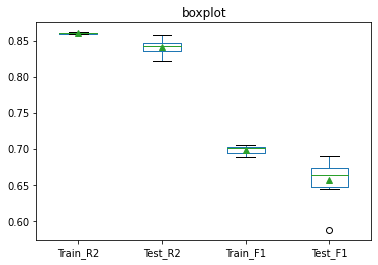

Train   Test
R2      0.861  0.842
R2_std  0.001  0.009
F1      0.699  0.656
F1_std  0.006  0.027

The test precision is: 0.8298816568047337
The test recall is: 0.6009641135511515
The test f1 is: 0.6971109040074557
The R2 of the model is 0.8409980430528375


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.861     0.699         0.599            0.839         0.006   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.001          0.842    0.656        0.562           0.794   

   f1_test_std  accuracy_test_std  
0        0.027              0.009

In [61]:
Votemodel_low = fit_assess_2(VotingClassifier(estimators=est,voting='soft'),X_train_low[subset_low],y_train_low, Test_low[subset_low],Y_test_low)

Best Threshold=0.423719, F-Score=0.650


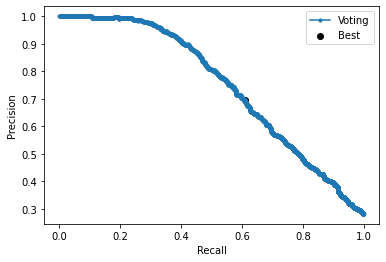

In [65]:
fitted_precision_recall_curve(Votemodel_low[0],'Voting',X_val_low[subset_low],y_val_low, X_val_low[subset_low],y_val_low)

Best Threshold=0.412440, F-Score=0.724


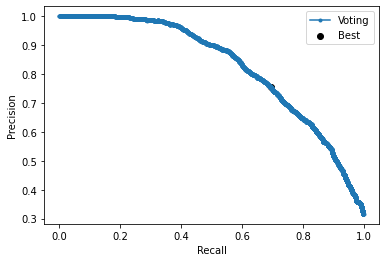

In [66]:
fitted_precision_recall_curve(Votemodel_low[0],'Voting',Test_low[subset_low],Y_test_low, Test_low[subset_low],Y_test_low)

In [67]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(Votemodel_low[0],Test_low[subset_low],0.4) 
pred_prob = Votemodel_low[0].predict_proba(Test_low[subset_low])
precision = precision_score(Y_test_low,pred)
recall = recall_score(Y_test_low,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.7366666666666667
Recall : 0.7102303160149973


In [69]:
metrics(y_val_low,Votemodel_low[0].predict(X_val_low[subset_low]),Y_test_low,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3287
           1       0.77      0.54      0.64      1222

    accuracy                           0.83      4509
   macro avg       0.81      0.74      0.76      4509
weighted avg       0.83      0.83      0.82      4509

[[3090  197]
 [ 558  664]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

__false_negative_rate or miss_out_rate =__ (FN) / (TP+FN)  
TP+FN = total positive

In [70]:
#FN rate (Customers who canceled)
541   / len(pred)

0.08822570123939986

In [71]:
#FP Rate (risk of overbooking)
474 / len(pred)

0.07729941291585127

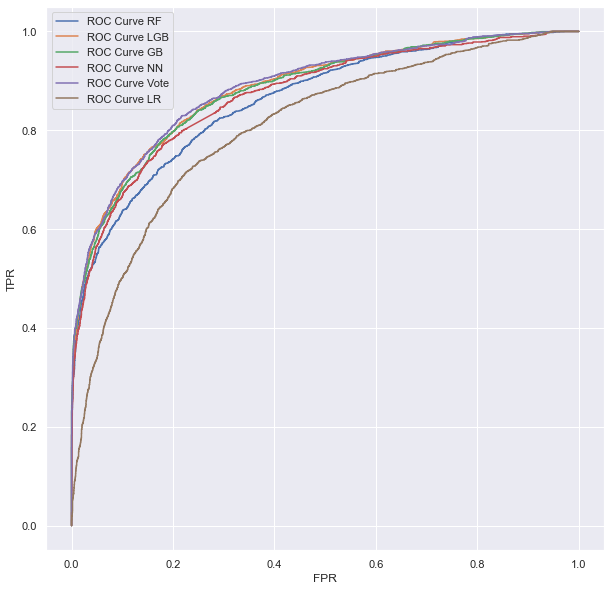

In [76]:
roc_curve([RFmodel_low[0], LGBmodel_low[0],GBmodel_low[0],NNmodel_low[0],Votemodel_low[0],LRmodel_low[0]],['RF','LGB','GB','NN','Vote','LR'],X_train_low[subset_low],y_train_low, Test_low[subset_low],Y_test_low)

### Final Results

In [105]:
ob_rate = [0.0395,0.064,0.063,0.056]
fn_rate = [0.102,0.086,0.093,0.085]
name = ['LGB','XGB','NN','Voting']

high_assess = pd.DataFrame()
high_assess['Model'] = name
high_assess['Cancelation_Rate'] = fn_rate
high_assess['Overbooking_Risk'] = ob_rate
high_assess

Model  Cancelation_Rate  Overbooking_Risk
0     LGB             0.102            0.0395
1     XGB             0.086            0.0640
2      NN             0.093            0.0630
3  Voting             0.085            0.0560

In [109]:
low_assess = pd.DataFrame()
fn_rate = [0.076,0.084,0.088,0.079]
ob_rate = [0.0988,0.097,0.077,0.104]
name = ['LGB','XGB','Voting','NN']
low_assess['Model'] = name
low_assess['Cancelation_Rate'] = fn_rate
low_assess['Overbooking_Risk'] = ob_rate
low_assess

Model  Cancelation_Rate  Overbooking_Risk
0     LGB             0.076            0.0988
1      GB             0.084            0.0970
2  Voting             0.088            0.0770
3      NN             0.079            0.1040

#### High Season final model

[12:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<Figure size 432x288 with 0 Axes>

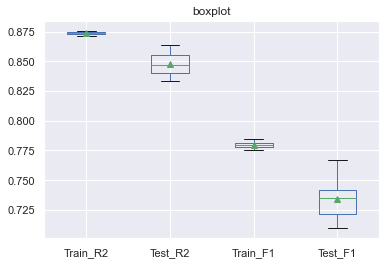

Train   Test
R2      0.874  0.848
R2_std  0.001  0.010
F1      0.780  0.734
F1_std  0.003  0.018

The test precision is: 0.881877444589309
The test recall is: 0.6802091713596138
The test f1 is: 0.768025434313614
The R2 of the model is 0.8539357975262744


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.874      0.78         0.789            0.771         0.003   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.001          0.848    0.734        0.738            0.73   

   f1_test_std  accuracy_test_std  
0        0.018               0.01

In [28]:
GBmodel = fit_assess_2(XGBClassifier(n_estimators =500,learning_rate=0.2,booster='gbtree',scale_pos_weight= 2,
                                     min_child_weight=0.2,max_depth=2,random_state=10),
                       X_train_high[subset_high],y_train_high, Test_high[subset_high],Y_test_high)

In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(GBmodel[0],Test_high[subset_high],0.37) 
pred_prob = GBmodel[0].predict_proba(Test_high[subset_high])
precision = precision_score(Y_test_high,pred)
recall = recall_score(Y_test_high,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

metrics(y_val_high,GBmodel[0].predict(X_val_high[subset_high]),Y_test_high,pred)

Precision : 0.8120805369127517
Recall : 0.754424778761062
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3870
           1       0.71      0.72      0.71      1531

    accuracy                           0.84      5401
   macro avg       0.80      0.80      0.80      5401
weighted avg       0.84      0.84      0.84      5401

[[3413  457]
 [ 431 1100]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------

In [30]:
Y_test_high_rev = test_high.copy()
Y_test_high_rev['Pred'] = pred
Y_test_high_rev['Fact'] = Y_test_high

Y_test_high_rev.loc[(Y_test_high_rev['Pred']== 0) & (Y_test_high_rev['Fact']==1), 'Classification'] = 'FN'
Y_test_high_rev.loc[(Y_test_high_rev['Pred']== 1) & (Y_test_high_rev['Fact']==0),'Classification'] = 'FP'
Y_test_high_rev.loc[(Y_test_high_rev['Pred']== 0) & (Y_test_high_rev['Fact']==0),'Classification'] = 'TN'
Y_test_high_rev.loc[(Y_test_high_rev['Pred']== 1) & (Y_test_high_rev['Fact']==1),'Classification'] = 'TP'

In [31]:
Y_test_high_rev.groupby('Classification').count()

IsCanceled  LeadTime  StaysInWeekendNights  StaysInWeekNights  \
Classification                                                                  
FN                    1221      1221                  1221               1221   
FP                     868       868                   868                868   
TN                    8147      8147                  8147               8147   
TP                    3751      3751                  3751               3751   

                Adults  Children  Babies  Meal  Country  MarketSegment  ...  \
Classification                                                          ...   
FN                1221      1221    1221  1221     1220           1221  ...   
FP                 868       868     868   868      868            868  ...   
TN                8147      8147    8147  8147     8147           8147  ...   
TP                3751      3751    3751  3751     3751           3751  ...   

                x1_TA/TO  x2_Contract  x2_Group  x2_Transient  \
Classification                                                  
FN                  1221         1221      1221          1221   
FP                   868          868       868           868   
TN                  8147         8147      8147          8147   
TP                  3751         3751      3751          3751   

                x2_Transient-Party  x3_BB         x3_HB         x3_SC         \
Classification                                                                 
FN                            1221          1221          1221          1221   
FP                             868           868           868           868   
TN                            8147          8147          8147          8147   
TP                            3751          3751          3751          3751   

                Pred  Fact  
Classification              
FN              1221  1221  
FP               868   868  
TN              8147  8147  
TP              3751  3751  

[4 rows x 58 columns]

#### Low Season final Model

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] early_stopping_round is set=50, early_stopping=50 will be ignored. Current value: early_stopping_round=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] ea

<Figure size 432x288 with 0 Axes>

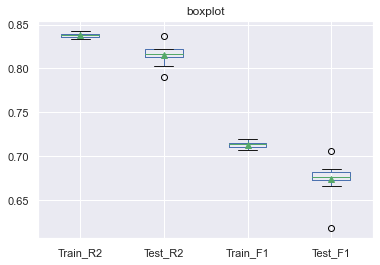

Train   Test
R2      0.838  0.816
R2_std  0.003  0.012
F1      0.713  0.674
F1_std  0.004  0.021

The test precision is: 0.6904055390702275
The test recall is: 0.7477236207820032
The test f1 is: 0.7179223450758551
The R2 of the model is 0.821102413568167


accuracy_train  f1_train  recall_train  precision_train  f1_train_std  \
0           0.838     0.713         0.747            0.683         0.004   

   accuracy_train_std  accuracy_test  f1_test  recall_test  precision_test  \
0               0.003          0.816    0.674        0.705           0.646   

   f1_test_std  accuracy_test_std  
0        0.021              0.012

In [32]:
LGBmodel_low = fit_assess_2(lgb.LGBMClassifier(n_estimators = 200,early_stopping=50,boosting_type='dart',max_depth=4,class_weight='balanced',bagging_fraction=0.6,feature_fraction=0.8,learning_rate=0.2,random_state=10),X_train_low[subset_low],y_train_low, Test_low[subset_low],Y_test_low)

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred =pred_withThreshold(LGBmodel_low[0],Test_low[subset_low],0.5) 
pred_prob = LGBmodel_low[0].predict_proba(Test_low[subset_low])
precision = precision_score(Y_test_low,pred)
recall = recall_score(Y_test_low,pred)
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Precision : 0.6904055390702275
Recall : 0.7477236207820032


In [34]:
metrics(y_val_low,LGBmodel_low[0].predict(X_val_low[subset_low]),Y_test_low,pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      3287
           1       0.63      0.66      0.65      1222

    accuracy                           0.80      4509
   macro avg       0.75      0.76      0.76      4509
weighted avg       0.81      0.80      0.81      4509

[[2813  474]
 [ 410  812]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [35]:
Y_test_low_rev = test_low.copy()
Y_test_low_rev['Pred'] = pred
Y_test_low_rev['Fact'] = Y_test_low

Y_test_low_rev.loc[(Y_test_low_rev['Pred']== 0) & (Y_test_low_rev['Fact']==1), 'Classification'] = 'FN'
Y_test_low_rev.loc[(Y_test_low_rev['Pred']== 1) & (Y_test_low_rev['Fact']==0),'Classification'] = 'FP'
Y_test_low_rev.loc[(Y_test_low_rev['Pred']== 0) & (Y_test_low_rev['Fact']==0),'Classification'] = 'TN'
Y_test_low_rev.loc[(Y_test_low_rev['Pred']== 1) & (Y_test_low_rev['Fact']==1),'Classification'] = 'TP'

In [36]:
Y_test_low_rev.groupby('Classification').count()

IsCanceled  LeadTime  StaysInWeekendNights  StaysInWeekNights  \
Classification                                                                  
FN                     471       471                   471                471   
FP                     626       626                   626                626   
TN                    3639      3639                  3639               3639   
TP                    1396      1396                  1396               1396   

                Adults  Children  Babies  Meal  Country  MarketSegment  ...  \
Classification                                                          ...   
FN                 471       471     471   471      471            471  ...   
FP                 626       626     626   626      626            626  ...   
TN                3639      3639    3639  3639     3639           3639  ...   
TP                1396      1396    1396  1396     1396           1396  ...   

                x2_Contract  x2_Group  x2_Transient  x2_Transient-Party  \
Classification                                                            
FN                      471       471           471                 471   
FP                      626       626           626                 626   
TN                     3639      3639          3639                3639   
TP                     1396      1396          1396                1396   

                x3_BB         x3_FB         x3_HB         x3_SC         Pred  \
Classification                                                                 
FN                       471           471           471           471   471   
FP                       626           626           626           626   626   
TN                      3639          3639          3639          3639  3639   
TP                      1396          1396          1396          1396  1396   

                Fact  
Classification        
FN               471  
FP               626  
TN              3639  
TP              1396  

[4 rows x 59 columns]

In [37]:
Test_rev = pd.concat([Y_test_high_rev.copy(),Y_test_low_rev.copy()])

In [38]:
metrics(Test_rev['Fact'],Test_rev['Pred'],Test_rev['Fact'],Test_rev['Pred'])

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     13280
           1       0.78      0.75      0.76      6839

    accuracy                           0.84     20119
   macro avg       0.82      0.82      0.82     20119
weighted avg       0.84      0.84      0.84     20119

[[11786  1494]
 [ 1692  5147]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [39]:
1692   / len(Test_rev)

0.08409960733634872

In [40]:
1494 / len(Test_rev)

0.07425816392464835

Text(0.5, 1.0, 'High Season Model Feature Importance')

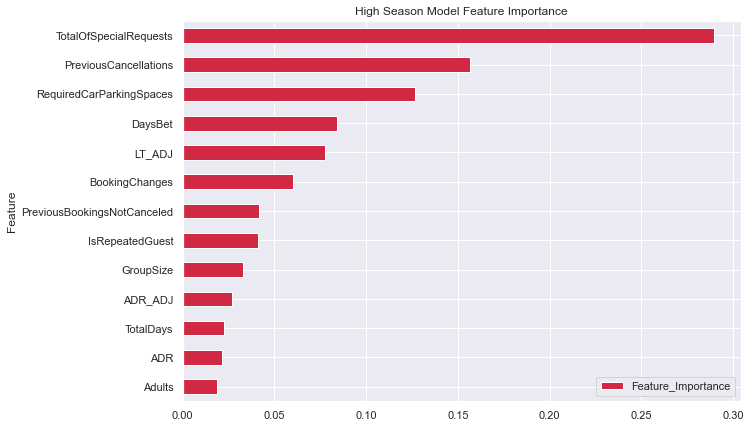

In [41]:
high_importance = GBmodel[0].feature_importances_
h_imp = pd.DataFrame()
h_imp['Feature'] = subset_high
h_imp['Feature_Importance'] = high_importance
h_imp.set_index('Feature').sort_values(ascending=True, by='Feature_Importance').plot.barh(figsize = (10,7),color = ['#d12943ff'])
plt.title('High Season Model Feature Importance')

Text(0.5, 1.0, 'Low Season Model Feature Importance')

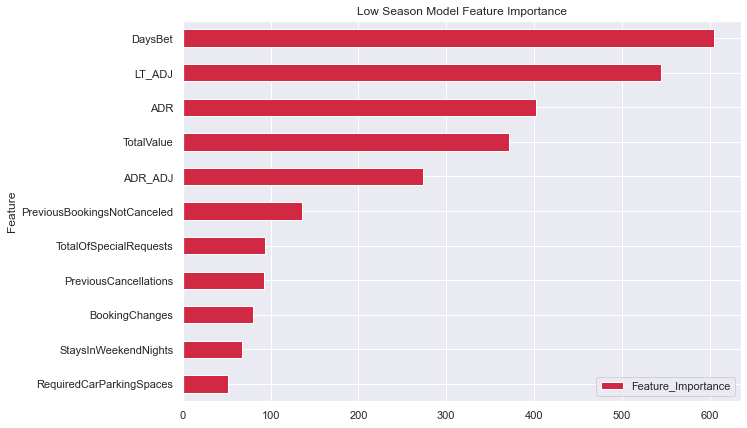

In [42]:
low_importance = LGBmodel_low[0].feature_importances_
l_imp = pd.DataFrame()
l_imp['Feature'] = subset_low
l_imp['Feature_Importance'] = low_importance
l_imp.set_index('Feature').sort_values(ascending=True, by='Feature_Importance').plot.barh(figsize = (10,7),color = ['#d12943ff'])
plt.title('Low Season Model Feature Importance')

In [43]:
Test_rev['Month'] = Test_rev['ArrivalDate'].dt.month

In [45]:
import sort_dataframeby_monthorweek as sd
month_assess= pd.DataFrame()
month_canc = []
month_ob = []
real_can = []
month = [ 'April', 'May', 'June','July', 'August', 'January', 'February', 'March']
for i in Test_rev['Month'].unique():
    value = Test_rev.loc[(Test_rev['Month']==i) & (Test_rev['Classification']=='FN')].count()['IsCanceled']
    total = Test_rev.loc[Test_rev['Month']==i].groupby('Classification').count()['IsCanceled'].sum()
    canc_ = Test_rev.loc[(Test_rev['Month']==i)&(Test_rev['IsCanceled']==1)].count()['IsCanceled']
    non_canc_ = Test_rev.loc[(Test_rev['Month']==i)&(Test_rev['IsCanceled']==0)].count()['IsCanceled']
    
    
    value2 = Test_rev.loc[(Test_rev['Month']==i) & (Test_rev['Classification']=='FP')].count()['IsCanceled']
    real_can.append(canc_/total)
    
    mc = value/total
    mob = value2/total
    
    month_canc.append(mc)
    month_ob.append(mob)
    
month_assess['Month'] = month
month_assess['Cancelation_Rate'] = month_canc
month_assess['Overbooking-Risk'] = month_ob
month_assess['Real_Cancelation_Rate'] = real_can
month_assess = sd.Sort_Dataframeby_Month(month_assess,'Month')
month_assess

Month  Cancelation_Rate  Overbooking-Risk  Real_Cancelation_Rate
0   January          0.075882          0.085882               0.323529
1  February          0.065844          0.126543               0.308128
2     March          0.086013          0.094051               0.288585
3     April          0.064492          0.090364               0.375328
4       May          0.084039          0.075570               0.359283
5      June          0.079779          0.082353               0.334191
6      July          0.105521          0.030398               0.345213
7    August          0.101949          0.031484               0.363943

Text(0.5, 1.0, 'Overbooking vs Cancelation Rate')

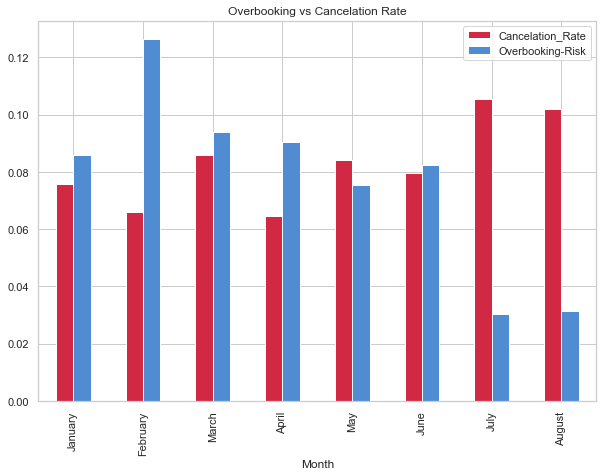

In [46]:
sns.set_style('whitegrid')
month_assess.set_index('Month')[['Cancelation_Rate','Overbooking-Risk']].plot.bar(figsize = (10,7),color = ['#d12943ff','#508cd1ff'])
plt.title('Overbooking vs Cancelation Rate')

Text(0.5, 1.0, 'Cancelation Rate Comparison')

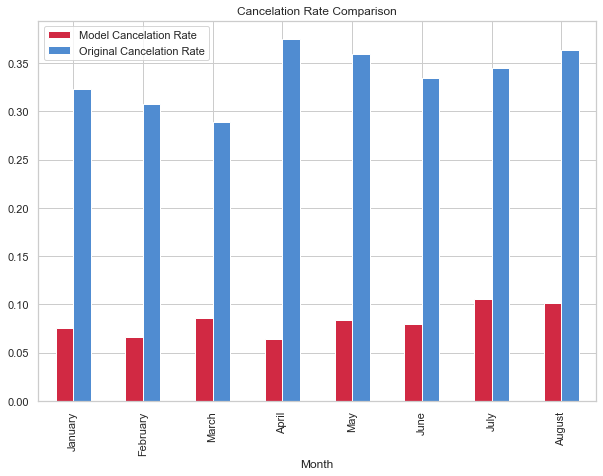

In [47]:
sns.set_style('whitegrid')
month_assess.set_index('Month')[['Cancelation_Rate','Real_Cancelation_Rate']].plot.bar(figsize = (10,7),color = ['#d12943ff','#508cd1ff'])
plt.legend(['Model Cancelation Rate','Original Cancelation Rate'])
plt.title('Cancelation Rate Comparison')

__Duvidas:__  
Como calcular despesa?? (despesa com realojamento, 'despesa' com quarto desocupado)   
Assumir que o profit vem só do TN ou assumir que tambem pode vir atraves de uma função com os TP e FP?  


In [48]:
month_rev= pd.DataFrame()
month_profit = []
model_rev = []
model_exp = []
month_real_profit = []
real_rev = []
real_exp = []
month = [ 'April', 'May', 'June','July', 'August', 'January', 'February', 'March']
for i in Test_rev['Month'].unique():
    tn_profit = Test_rev.loc[(Test_rev['Month']==i) & (Test_rev['Classification']=='TN')].sum()['TotalValue']
    tp_profit  = Test_rev.loc[(Test_rev['Month']==i) & (Test_rev['Classification']=='TP')].sum()['TotalValue']
    fn_expense = Test_rev.loc[(Test_rev['Month']==i) & (Test_rev['Classification']=='FN')].sum()['TotalValue']
    fp_profit = Test_rev.loc[(Test_rev['Month']==i) & (Test_rev['Classification']=='FP')].sum()['TotalValue']
    
    real_revenue = Test_rev.loc[(Test_rev['Month']==i) & (Test_rev['IsCanceled']==0)].sum()['TotalValue']
    real_expense = Test_rev.loc[(Test_rev['Month']==i) & (Test_rev['IsCanceled']==1)].sum()['TotalValue']
    
    
    model_revenue = tn_profit + (0.4*tp_profit) + (0.4*fp_profit)
    model_expense = (fn_expense + 0.2*fp_profit)
    profit = model_revenue - model_expense
    real_profit = real_revenue 
    

    model_rev.append(model_revenue)
    model_exp.append(model_expense)
    month_profit.append(profit)
    real_rev.append(real_revenue)
    month_real_profit.append(real_profit)
    real_exp.append(real_expense)
month_rev= pd.DataFrame()
month_rev['Month'] = month
month_rev['Model_Revenue'] = model_rev
month_rev['Model_Expense'] = model_exp
month_rev['Model_Profit'] = month_profit
month_rev['Real_Revenue'] = real_rev
month_rev['Real_Expense'] = real_exp
month_rev['Real_Profit'] = month_real_profit
month_rev = sd.Sort_Dataframeby_Month(month_rev,'Month')
month_rev

Month  Model_Revenue  Model_Expense  Model_Profit  Real_Revenue  \
0   January     362636.674      48509.110    314127.564     323036.07   
1  February     407189.664      53877.494    353312.170     390648.70   
2     March     525557.036      78302.494    447254.542     498634.21   
3     April     754071.420      89287.158    664784.262     670473.31   
4       May     856479.056     126313.768    730165.288     754899.44   
5      June     787063.340     115093.738    671969.602     716485.17   
6      July     873254.874     135730.662    737524.212     756861.22   
7    August     923781.344     129539.796    794241.548     782570.94   

   Real_Expense  Real_Profit  
0     233540.98    323036.07  
1     226661.62    390648.70  
2     263153.57    498634.21  
3     449382.59    670473.31  
4     507678.46    754899.44  
5     423466.14    716485.17  
6     479651.59    756861.22  
7     540978.42    782570.94

In [49]:
month_rev['Revenue_Growth'] = (month_rev['Model_Revenue'] / (month_rev['Real_Revenue']))-1

Text(0.5, 1.0, 'Revenue Comparison')

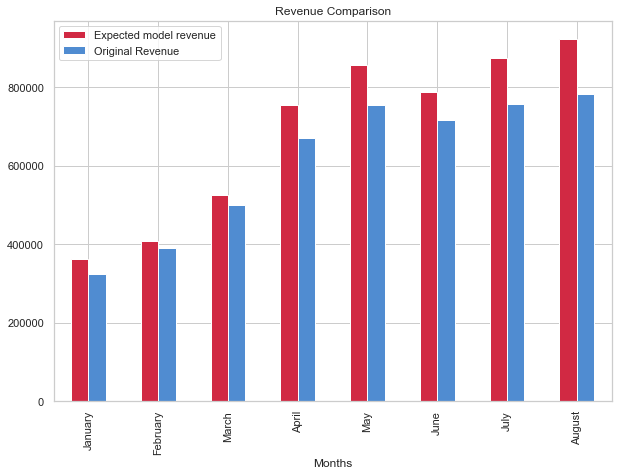

In [50]:
month_rev.set_index('Month')[['Model_Revenue','Real_Revenue']].plot.bar(figsize = (10,7),color = ['#d12943ff','#508cd1ff'])
plt.legend(['Expected model revenue','Original Revenue'])
plt.xlabel('Months')
plt.title('Revenue Comparison')

Text(0.5, 1.0, 'Expected Revenue Growth')

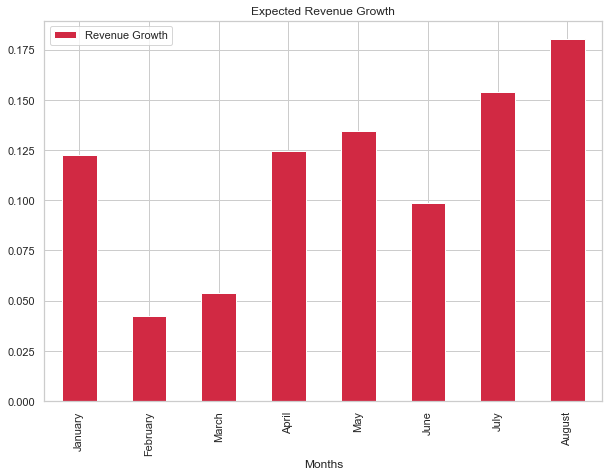

In [51]:
month_rev.set_index('Month')[['Revenue_Growth']].plot.bar(figsize = (10,7),color = ['#d12943ff','#508cd1ff'])
plt.legend(['Revenue Growth'])
plt.xlabel('Months')
plt.title('Expected Revenue Growth')

### Arrival Value percentage for all years

Text(0.5, 0, 'Percentage of customers')

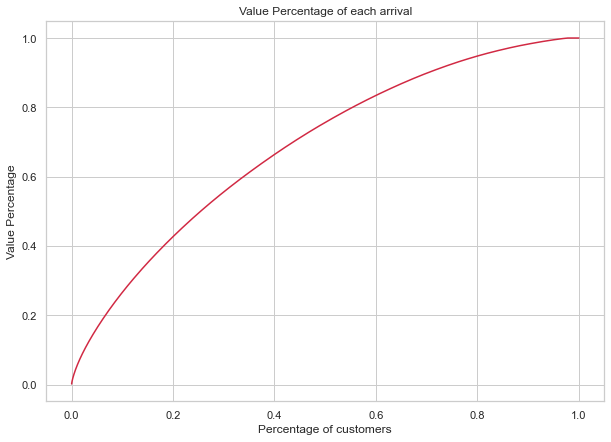

In [113]:
data_exp = feat_eng(data)
value = data_exp.sort_values(ascending=False,by='TotalValue')
value['value_pct'] = value['TotalValue'] / value['TotalValue'].sum()
value['valuepct_cumsum']= value['value_pct'].cumsum()

value['ppl_pct'] = (1 / len(value))
value['pplcumsum_pct'] = value['ppl_pct'].cumsum()

value_plot = value.loc[value['IsCanceled']==0][['valuepct_cumsum','pplcumsum_pct']].copy()
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.lineplot(x=value_plot['pplcumsum_pct'],y=value_plot['valuepct_cumsum'],color ='#d12943ff' )
plt.title('Value Percentage of each arrival')
plt.ylabel('Value Percentage')
plt.xlabel('Percentage of customers')

#### Most valuable arrivals

In [116]:
most_valuable = value.loc[value['pplcumsum_pct']<0.2]

In [158]:
most_val = most_valuable[['ADR','ValuePerson','TotalDays','infants','StaysInWeekNights','StaysInWeekendNights']].mean()
all_ = value.loc[value['pplcumsum_pct']>0.2][['ADR','ValuePerson','TotalDays','infants','StaysInWeekNights','StaysInWeekendNights']].mean()

Text(0.5, 1.0, 'ADR comparison between the 20% most valuable reservation and all the others')

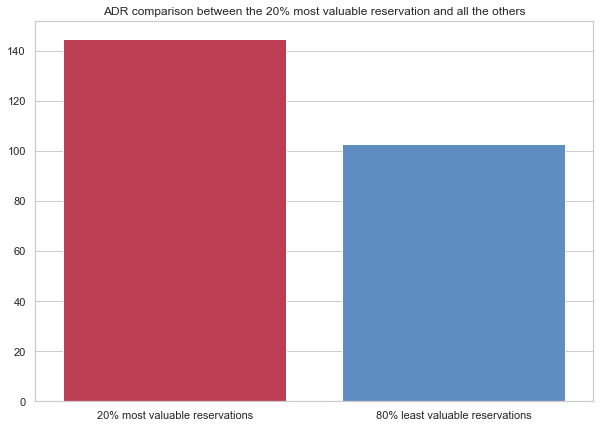

In [162]:
plt.figure(figsize=(10,7))
sns.barplot(x = ['20% most valuable reservations','80% least valuable reservations'], y = [most_val[0],all_[0]],palette=['#d12943ff','#508cd1ff'])
plt.title('ADR comparison between the 20% most valuable reservation and all the others')

Text(0.5, 1.0, 'Average value per person')

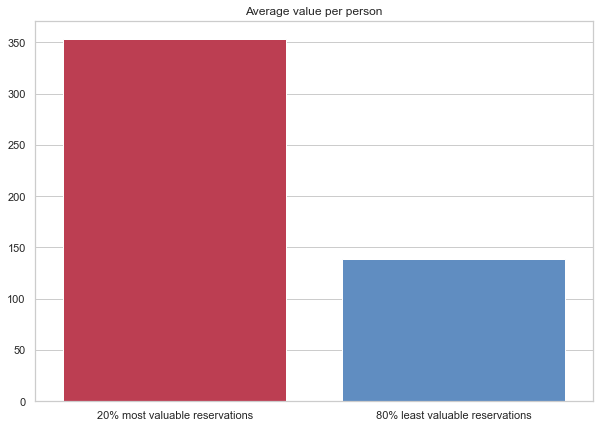

In [166]:
plt.figure(figsize=(10,7))
sns.barplot(x = ['20% most valuable reservations','80% least valuable reservations'], y = [most_val[1],all_[1]],palette=['#d12943ff','#508cd1ff'])
plt.title('Average value per person')

### Leverage Analysis

In [198]:
lev_high = (value.loc[round(value['pplcumsum_pct'],3)<0.2,'value_pct'].cumsum() /value.loc[round(value['pplcumsum_pct'],3)<0.2,'ppl_pct'].cumsum()).iloc[-1]
ppl_high = value.loc[round(value['pplcumsum_pct'],3)<0.2,'ppl_pct'].cumsum().iloc[-1]
value_high = value.loc[round(value['pplcumsum_pct'],3)<0.2,'value_pct'].cumsum().iloc[-1]

In [208]:
lev_mid = (value.loc[(round(value['pplcumsum_pct'],3)>0.2)& (round(value['pplcumsum_pct'],3)<0.5) ,'value_pct'].cumsum() /value.loc[(round(value['pplcumsum_pct'],3)>0.2)& (round(value['pplcumsum_pct'],3)<0.5) ,'ppl_pct'].cumsum()).iloc[-1]
ppl_mid = value.loc[(round(value['pplcumsum_pct'],3)>0.2)& (round(value['pplcumsum_pct'],3)<0.5),'ppl_pct'].cumsum().iloc[-1]
value_mid = value.loc[(round(value['pplcumsum_pct'],3)>0.2)& (round(value['pplcumsum_pct'],3)<0.5),'value_pct'].cumsum().iloc[-1]

In [209]:
lev_low = (value.loc[ (round(value['pplcumsum_pct'],3)>0.5) ,'value_pct'].cumsum() /value.loc[(round(value['pplcumsum_pct'],3)>0.5) ,'ppl_pct'].cumsum()).iloc[-1]
ppl_low = value.loc[ (round(value['pplcumsum_pct'],3)>0.5),'ppl_pct'].cumsum().iloc[-1]
value_low = value.loc[ (round(value['pplcumsum_pct'],3)>0.5),'value_pct'].cumsum().iloc[-1]

In [214]:
lev_analysis = pd.DataFrame(index = ['20%Valuable', '20-50%Valuable','>50%Valuable'])
lev_analysis['Leverage'] = [lev_high,lev_mid,lev_low]
lev_analysis['Population_%'] = [ppl_high,ppl_mid,ppl_low]
lev_analysis['Value_%'] = [value_high,value_mid,value_low]

(array([0, 1, 2]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

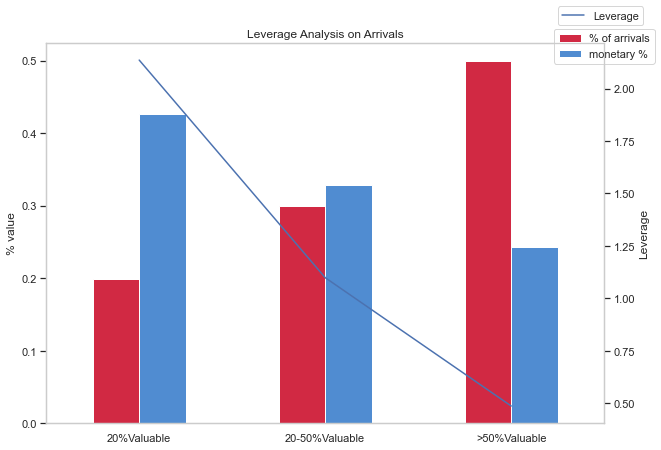

In [267]:
ax1 = lev_analysis[['Population_%','Value_%']].plot.bar(figsize=(10,7), color = ['#d12943ff','#508cd1ff'])

ax2 = lev_analysis['Leverage'].plot.line(secondary_y=True,)
ax2.set_ylabel('Leverage')
plt.title('Leverage Analysis on Arrivals')
ax1.set_ylabel('% value')
plt.grid(False)
ax1.legend(['% of arrivals','monetary %'],bbox_to_anchor=(1.1, 1.05))
ax2.legend(['Leverage'],bbox_to_anchor=(1.08, 1.11))
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, '20%Valuable'),
  Text(1, 0, '20-50%Valuable'),
  Text(2, 0, '>50%Valuable')])

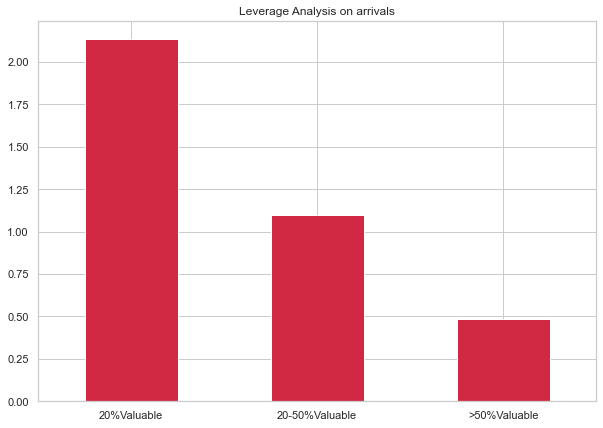

In [225]:
lev_analysis['Leverage'].plot.bar(figsize=(10,7), color = '#d12943ff')
plt.title('Leverage Analysis on arrivals')
plt.xticks(rotation=0)

### Arrival value percentage for the test set

In [81]:
value = Test_rev.sort_values(ascending=False,by='TotalValue')
value['value_pct'] = value['TotalValue'] / value['TotalValue'].sum()
value['valuepct_cumsum']= value['value_pct'].cumsum()

value['ppl_pct'] = (1 / len(value))
value['pplcumsum_pct'] = value['ppl_pct'].cumsum()

value_plot = value.loc[value['IsCanceled']==0][['valuepct_cumsum','pplcumsum_pct','Classification']].copy()

plt.figure(figsize=(10,7))
sns.lineplot(x=value_plot['pplcumsum_pct'],y=value_plot['valuepct_cumsum'])
plt.ylabel('Value Percentage')
plt.xlabel('Percentage of customers')

Text(0.5, 0, 'Percentage of customers')

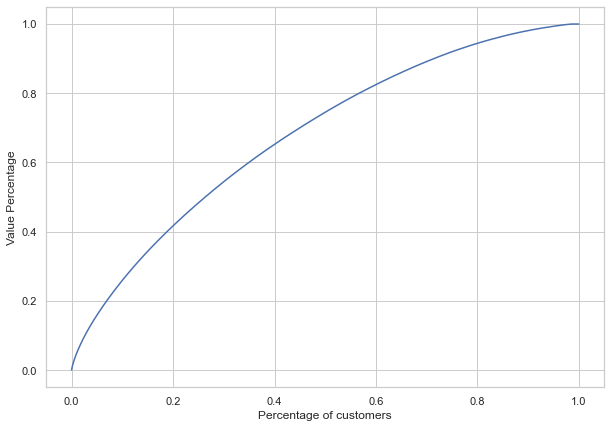

In [97]:
value_plot = value[['valuepct_cumsum','pplcumsum_pct','TotalValue','Classification']].copy()

plt.figure(figsize=(10,7))
sns.lineplot(x=value_plot['pplcumsum_pct'],y=value_plot['valuepct_cumsum'])
plt.ylabel('Value Percentage')
plt.xlabel('Percentage of customers')

In [102]:
canc_rate_20 = len(value_plot.loc[(value_plot['pplcumsum_pct']<0.2) & (value_plot['Classification']=='FN')]) / len(value_plot.loc[(value_plot['pplcumsum_pct']<0.2)])

canc_rate_80 = len(value_plot.loc[(value_plot['pplcumsum_pct']>0.2) & (value_plot['Classification']=='FN')]) / len(value_plot.loc[(value_plot['pplcumsum_pct']>0.2)])
                                                                                                                   

In [104]:
canc_rate_80

0.08592196819085487

In [103]:
canc_rate_20

0.07680835197613721